
# **Market Segmentation for Online Healthcare Provider**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = pd.read_csv('india-districts-census-2011.csv')
data.head()

District code         State name District name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Male_Literate  Female_Literate    SC  ...  \
0    439654         282823           156831  1048  ...   
1    335649         207741           127908   368  ...   
2     93770          62834            30936   488  ...   
3     86236          56301            29935    18  ...   
4    261724         163333            98391   556  ...   

   Power_Parity_Rs_90000_150000  Power_Parity_Rs_45000_150000  \
0                            94                           588   
1                           126                           562   
2                            46                           122   
3                            27                           114   
4                            78                           346   

   Power_Parity_Rs_150000_240000  Power_Parity_Rs_240000_330000  \
0                             71                            101   
1                             72                             89   
2                             15                             22   
3                             12                             18   
4                             35                             50   

   Power_Parity_Rs_150000_330000  Power_Parity_Rs_330000_425000  \
0                            172                             74   
1                            161                             96   
2                             37                             20   
3                             30                             19   
4                             85                             59   

   Power_Parity_Rs_425000_545000  Power_Parity_Rs_330000_545000  \
0                             10                             84   
1                             28                            124   
2                             14                             34   
3                              3                             22   
4                              8                             67   

   Power_Parity_Above_Rs_545000  Total_Power_Parity  
0                            15                1119  
1                            18                1066  
2                            17                 242  
3                             7                 214  
4                            12                 629  

[5 rows x 118 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [ ]:
data.describe()

District code    Population          Male        Female      Literate  \
count     640.000000  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean      320.500000  1.891961e+06  9.738598e+05  9.181011e+05  1.193186e+06   
std       184.896367  1.544380e+06  8.007785e+05  7.449864e+05  1.068583e+06   
min         1.000000  8.004000e+03  4.414000e+03  3.590000e+03  4.436000e+03   
25%       160.750000  8.178610e+05  4.171682e+05  4.017458e+05  4.825982e+05   
50%       320.500000  1.557367e+06  7.986815e+05  7.589200e+05  9.573465e+05   
75%       480.250000  2.583551e+06  1.338604e+06  1.264277e+06  1.602260e+06   
max       640.000000  1.106015e+07  5.865078e+06  5.195070e+06  8.227161e+06   

       Male_Literate  Female_Literate            SC       Male_SC  \
count   6.400000e+02     6.400000e+02  6.400000e+02  6.400000e+02   
mean    6.793182e+05     5.138675e+05  3.146537e+05  1.617739e+05   
std     5.924144e+05     4.801816e+05  3.129818e+05  1.611216e+05   
min     2.614000e+03     1.822000e+03  0.000000e+00  0.000000e+00   
25%     2.764365e+05     2.008920e+05  8.320850e+04  4.230700e+04   
50%     5.483525e+05     4.038590e+05  2.460160e+05  1.255485e+05   
75%     9.188582e+05     6.641550e+05  4.477078e+05  2.284602e+05   
max     4.591396e+06     3.635765e+06  2.464032e+06  1.266504e+06   

          Female_SC  ...  Power_Parity_Rs_90000_150000  \
count  6.400000e+02  ...                    640.000000   
mean   1.528798e+05  ...                    786.046875   
std    1.520336e+05  ...                   1038.854733   
min    0.000000e+00  ...                      0.000000   
25%    4.267175e+04  ...                    236.750000   
50%    1.178550e+05  ...                    518.000000   
75%    2.140502e+05  ...                    941.250000   
max    1.197528e+06  ...                  10334.000000   

       Power_Parity_Rs_45000_150000  Power_Parity_Rs_150000_240000  \
count                    640.000000                     640.000000   
mean                    1696.456250                     294.000000   
std                     1720.535151                     638.345281   
min                        0.000000                       0.000000   
25%                      589.000000                      59.000000   
50%                     1220.500000                     149.000000   
75%                     2233.250000                     296.500000   
max                    13819.000000                   10835.000000   

       Power_Parity_Rs_240000_330000  Power_Parity_Rs_150000_330000  \
count                     640.000000                     640.000000   
mean                      215.300000                     509.300000   
std                       362.684243                     968.538748   
min                         0.000000                       0.000000   
25%                        24.750000                      95.000000   
50%                       118.500000                     278.000000   
75%                       262.000000                     564.500000   
max                      3595.000000                   14430.000000   

       Power_Parity_Rs_330000_425000  Power_Parity_Rs_425000_545000  \
count                     640.000000                     640.000000   
mean                      194.204688                     261.245313   
std                       424.108001                     587.279450   
min                         0.000000                       0.000000   
25%                        19.000000                      21.000000   
50%                        84.000000                      85.500000   
75%                       213.250000                     293.000000   
max                      5027.000000                    7597.000000   

       Power_Parity_Rs_330000_545000  Power_Parity_Above_Rs_545000  \
count                     640.000000                    640.000000   
mean                      455.450000                    279.631250   
std                 

# **Geographic Segmentation**

In [ ]:
# Create the DataFrame
gs_data = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(gs_data.head())

   District code         State name District name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Male_Literate  Female_Literate    SC  ...  \
0    439654         282823           156831  1048  ...   
1    335649         207741           127908   368  ...   
2     93770          62834            30936   488  ...   
3     86236          56301            29935    18  ...   
4    261724         163333            98391   556  ...   

   Power_Parity_Rs_90000_150000  Power_Parity_Rs_45000_150000  \
0                            94                           588   
1                           126   

In [ ]:
gs_data.drop(['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Male_Workers','Female_Workers','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','LPG_or_PNG_Households','Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Married_couples_1_Households','Married_couples_2_Households','Married_couples_3_Households','Married_couples_3_or_more_Households','Married_couples_4_Households','Married_couples_5__Households','Married_couples_None_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both'
                        ,'Housholds_with_Electric_Lighting'], axis=1, inplace= True)

In [ ]:
gs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   District code                    640 non-null    int64 
 1   State name                       640 non-null    object
 2   District name                    640 non-null    object
 3   Population                       640 non-null    int64 
 4   Male                             640 non-null    int64 
 5   Female                           640 non-null    int64 
 6   Literate                         640 non-null    int64 
 7   Male_Literate                    640 non-null    int64 
 8   Female_Literate                  640 non-null    int64 
 9   Workers                          640 non-null    int64 
 10  Main_Workers                     640 non-null    int64 
 11  Marginal_Workers                 640 non-null    int64 
 12  Non_Workers                      640

In [ ]:



import plotly.express as px

fig = px.histogram(data,
                    x="State name",
                   y="Households_with_Internet",
                   title = "Households with Internet in every state",
                   color_discrete_sequence=['#ff7f0e'])  # Set the color to green
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Define thresholds for population and literacy rate
population_threshold = 1000000  # Example threshold for good population
literacy_threshold = 75       # Example threshold for good literacy rate (%)
internet_threshold=100
# Filter records based on the defined criteria
filtered_records = gs_data[(gs_data['Population'] >= population_threshold) &
                            (gs_data['Households_with_Internet'] >= internet_threshold)]

# Calculate literacy rate in terms of population
filtered_records['Literacy Rate'] = (filtered_records['Literate'] / filtered_records['Population']) * 100

# Filter records based on the literacy threshold
filtered_records = filtered_records[filtered_records['Literacy Rate'] >= literacy_threshold]

# Reset the index of the filtered DataFrame
filtered_records = filtered_records.reset_index(drop=True)

# Display the filtered records
print(filtered_records.head())


   District code        State name District name  Population     Male  \
0             24  HIMACHAL PRADESH        Kangra     1510075   750591   
1             38            PUNJAB    Hoshiarpur     1586625   809057   
2             55        CHANDIGARH    Chandigarh     1055450   580663   
3             93      NCT OF DELHI          East     1709346   907500   
4             96      NCT OF DELHI          West     2543243  1356240   

    Female  Literate  Male_Literate  Female_Literate  Workers  ...  \
0   759484   1152640         606443           546197   675170  ...   
1   777568   1199699         637927           561772   499822  ...   
2   474787    805438         465346           340092   404136  ...   
3   801846   1352998         748382           604616   579692  ...   
4  1187003   1961179        1093933           867246   874320  ...   

   Power_Parity_Rs_45000_150000  Power_Parity_Rs_150000_240000  \
0                          1506                            252   
1       

<ipython-input-5-34ac3258ec78>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Segment the data based on relevant metrics
# Example: Segment based on population and literacy rates
population_segment = pd.cut(gs_data['Population'], bins=3, labels=['Low', 'Medium', 'High'])
literacy_segment = pd.cut(gs_data['Literate'], bins=3, labels=['Low', 'Medium', 'High'])

# Combine segments into a new DataFrame
segmented_data = pd.DataFrame({
    'District': gs_data['District name'],
    'State': gs_data['State name'],
    'Population Segment': population_segment,
    'Literacy Segment': literacy_segment
})

<ipython-input-16-0b4cab8fe04a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




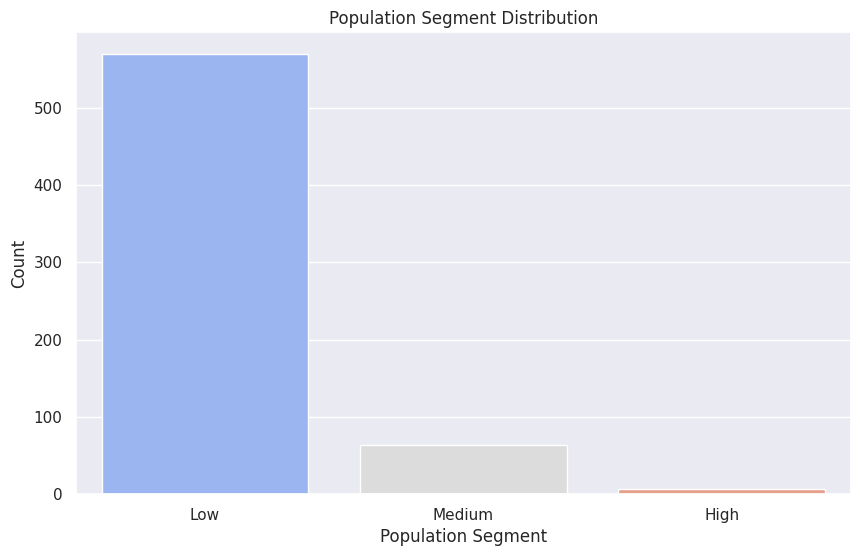

In [ ]:
# Plotting Population Segment
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Population Segment', palette='coolwarm')
plt.title('Population Segment Distribution')
plt.xlabel('Population Segment')
plt.ylabel('Count')
plt.show()

<ipython-input-14-45c79067f74e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




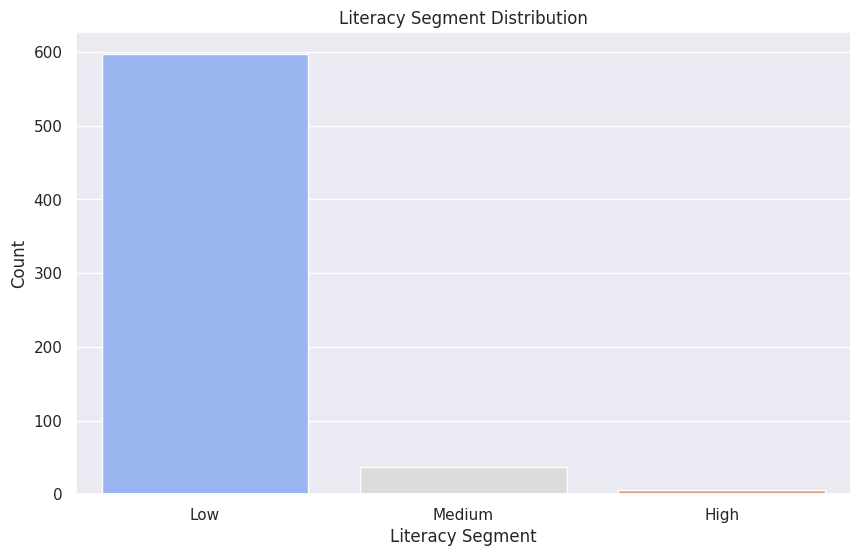

In [ ]:
# Plotting Literacy Segment
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Literacy Segment', palette='coolwarm')
plt.title('Literacy Segment Distribution')
plt.xlabel('Literacy Segment')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = px.histogram(gs_data,
                   x="State name",
                   y = "Population",
                   title='Population Vs States')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px. histogram(data,
                   x = "State name",
                   y = "Literate",
                   title = "Literate Population per State")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
# Example 3: Urban vs. Rural Population (Pie Chart)
urban_rural_data = data[['State name', 'Urban_Households', 'Rural_Households']].groupby('State name').sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(urban_rural_data[['Urban_Households', 'Rural_Households']].sum(), labels=['Urban', 'Rural'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Urban vs. Rural Population Distribution')
plt.show()

In [ ]:
# Example 4: Household Internet and Computer Access (Stacked Bar Chart)
plt.figure(figsize=(12,15))
sns.barplot(x='Households_with_Internet', y='State name', data=data, color='blue', label='Internet')
sns.barplot(x='Households_with_Computer', y='State name', data=data, color='orange', label='Computer')
plt.xlabel('Number of Households')
plt.ylabel('State')
plt.title('Households with Internet and Computer Access by State')
plt.legend()
plt.show()

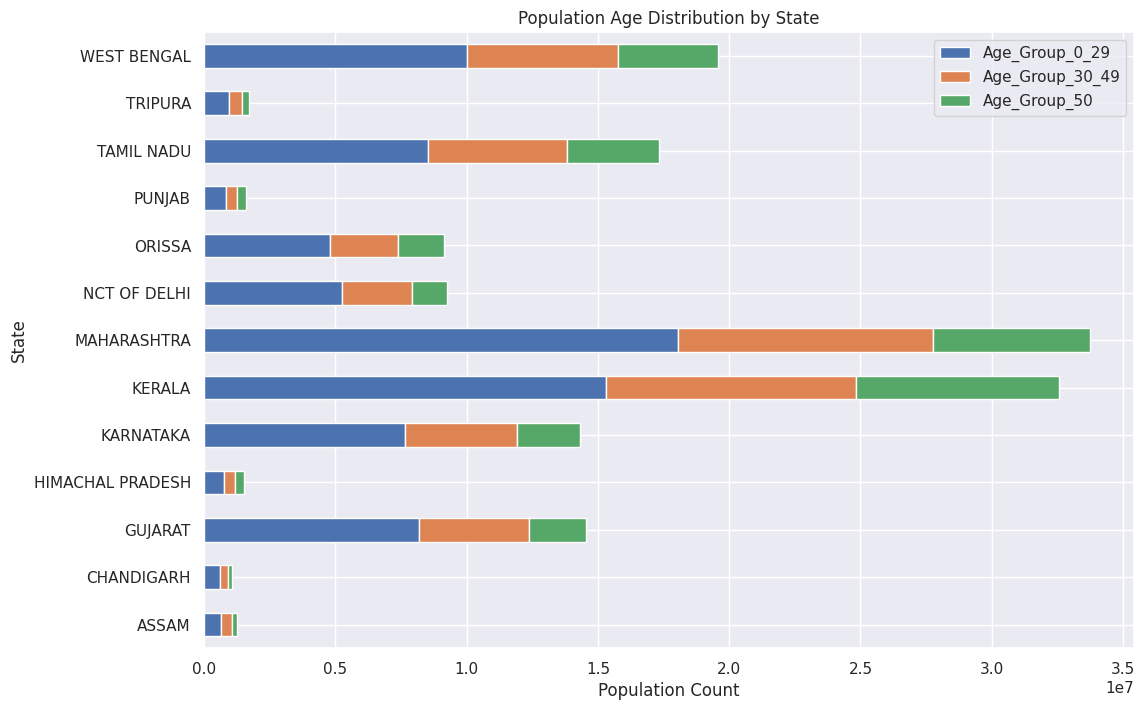

In [ ]:
# Example 5: Population Age Distribution (Age Pyramid)
age_data = filtered_records[['State name', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']].groupby('State name').sum().reset_index()
age_data.set_index('State name', inplace=True)
age_data.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.xlabel('Population Count')
plt.ylabel('State')
plt.title('Population Age Distribution by State')
plt.show()

West Bengal
Tamil Nadu
Maharasthra
Kerala
Karnatka
Gujarat

In [ ]:
filtered_records.head()

District code        State name District name  Population     Male  \
0             24  HIMACHAL PRADESH        Kangra     1510075   750591   
1             38            PUNJAB    Hoshiarpur     1586625   809057   
2             55        CHANDIGARH    Chandigarh     1055450   580663   
3             93      NCT OF DELHI          East     1709346   907500   
4             96      NCT OF DELHI          West     2543243  1356240   

    Female  Literate  Male_Literate  Female_Literate  Workers  ...  \
0   759484   1152640         606443           546197   675170  ...   
1   777568   1199699         637927           561772   499822  ...   
2   474787    805438         465346           340092   404136  ...   
3   801846   1352998         748382           604616   579692  ...   
4  1187003   1961179        1093933           867246   874320  ...   

   Power_Parity_Rs_45000_150000  Power_Parity_Rs_150000_240000  \
0                          1506                            252   
1                          1578                            586   
2                         10783                           4285   
3                          3584                            589   
4                          3584                            589   

   Power_Parity_Rs_240000_330000  Power_Parity_Rs_150000_330000  \
0                            101                            353   
1                            357                            943   
2                           2444                           6729   
3                            582                           1171   
4                            582                           1171   

   Power_Parity_Rs_330000_425000  Power_Parity_Rs_425000_545000  \
0                            127                            206   
1                            360                            529   
2                           3382                           4461   
3                            482                            567   
4                            482                            567   

   Power_Parity_Rs_330000_545000  Power_Parity_Above_Rs_545000  \
0                            333                           369   
1                            889                           730   
2                           7843                          7897   
3                           1049                           769   
4                           1049                           769   

   Total_Power_Parity  Literacy Rate  
0                2878      76.329984  
1                4305      75.613267  
2               34145      76.312284  
3                7151      79.152963  
4                7151      77.113316  

[5 rows x 49 columns]

Demographic and Socio-Economic Characteristics:

Apply cluster analysis to demographic and socio-economic data such as population size, literacy rates, income levels, education levels, and employment patterns. This can help identify clusters of regions with similar demographic profiles, which can be useful for targeting specific customer segments.
Healthcare Infrastructure and Accessibility:

Cluster regions based on healthcare infrastructure, including the availability of hospitals, clinics, and medical facilities, as well as accessibility to healthcare services. This can help identify underserved areas where your home checkup service may be particularly beneficial.
Market Potential and Demand:

Use cluster analysis to segment regions based on market potential and demand for home checkup services. Factors such as population density, urbanization levels, health awareness, and healthcare expenditure can help identify clusters of regions with high demand for preventive healthcare services.
Geographic Proximity and Connectivity:

Cluster regions based on geographic proximity and connectivity to identify clusters of regions that are geographically close to each other. This can help optimize logistics and service delivery by targeting clusters of regions that are more accessible and cost-effective to serve.
Customer Behavior and Preferences:

Analyze customer behavior and preferences using data on past usage patterns, online booking behavior, and customer feedback. Cluster analysis can help identify segments of customers with similar preferences and behavior, enabling targeted marketing and service customization.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = filtered_records[['Population', 'Literate', 'Households_with_Internet']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (you can experiment with different values)
n_clusters = 3

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

# Get cluster labels for each record
cluster_labels = kmeans.labels_

# Add cluster labels to the filtered_records DataFrame
filtered_records['Cluster'] = cluster_labels

# Print the number of records in each cluster
print(filtered_records['Cluster'].value_counts())

# Explore the characteristics of each cluster
for cluster in range(n_clusters):
    cluster_data = filtered_records[filtered_records['Cluster'] == cluster]
    print(f"\nCluster {cluster} Characteristics:")
    print(cluster_data.describe())


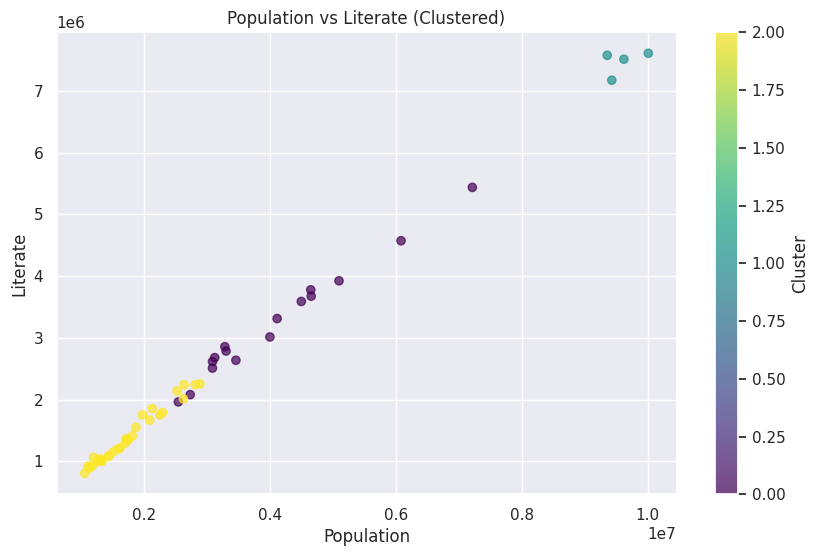

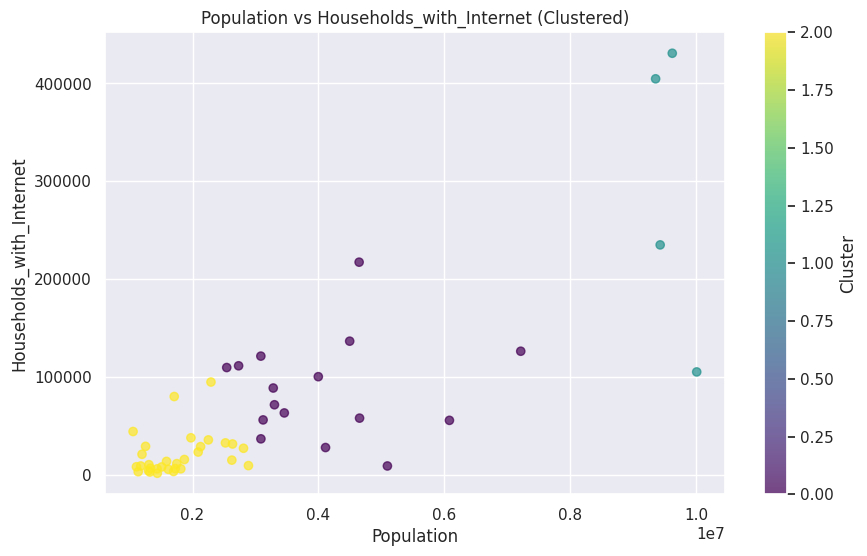

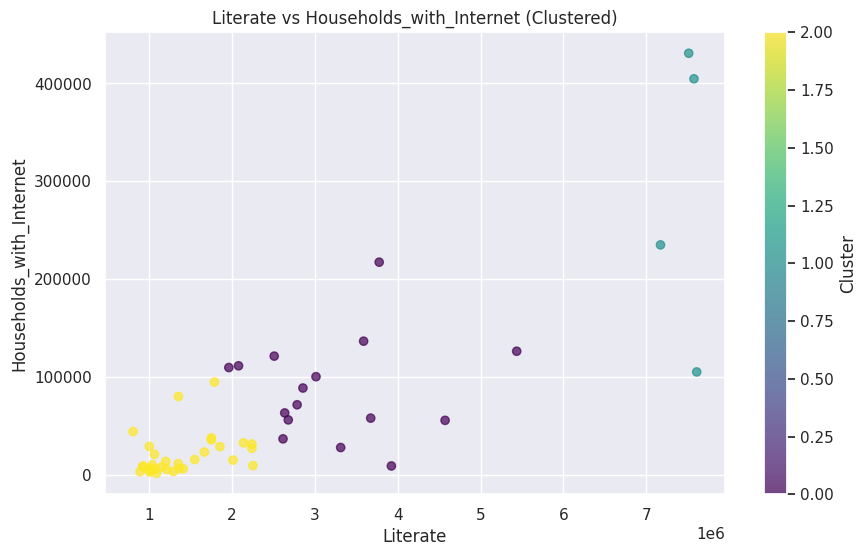

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Population vs Literate
plt.figure(figsize=(10, 6))
plt.scatter(filtered_records['Population'], filtered_records['Literate'], c=filtered_records['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Population')
plt.ylabel('Literate')
plt.title('Population vs Literate (Clustered)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Scatter plot for Population vs Households_with_Internet
plt.figure(figsize=(10, 6))
plt.scatter(filtered_records['Population'], filtered_records['Households_with_Internet'], c=filtered_records['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Population')
plt.ylabel('Households_with_Internet')
plt.title('Population vs Households_with_Internet (Clustered)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Scatter plot for Literate vs Households_with_Internet
plt.figure(figsize=(10, 6))
plt.scatter(filtered_records['Literate'], filtered_records['Households_with_Internet'], c=filtered_records['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Literate')
plt.ylabel('Households_with_Internet')
plt.title('Literate vs Households_with_Internet (Clustered)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Create state-specific DataFrames

west_bengal_data = filtered_records[filtered_records['State name'] == 'West Bengal']
tamil_nadu_data = filtered_records[filtered_records['State name'] == 'Tamil Nadu']
maharashtra_data = filtered_records[filtered_records['State name'] == 'Maharashtra']
kerala_data = filtered_records[filtered_records['State name'] == 'Kerala']
karnataka_data = filtered_records[filtered_records['State name'] == 'Karnataka']
gujarat_data = filtered_records[filtered_records['State name'] == 'Gujarat']

In [ ]:
# Assuming your DataFrame is named filtered_records
kerala_data = filtered_records[filtered_records['State name'] == 'Kerala']
print(kerala_data)


Empty DataFrame
Columns: [District code, State name, District name, Population, Male, Female, Literate, Male_Literate, Female_Literate, Workers, Main_Workers, Marginal_Workers, Non_Workers, Cultivator_Workers, Agricultural_Workers, Household_Workers, Other_Workers, Households_with_Internet, Households_with_Computer, Rural_Households, Urban_Households, Households, Below_Primary_Education, Primary_Education, Middle_Education, Secondary_Education, Higher_Education, Graduate_Education, Other_Education, Literate_Education, Illiterate_Education, Total_Education, Age_Group_0_29, Age_Group_30_49, Age_Group_50, Age not stated, Power_Parity_Less_than_Rs_45000, Power_Parity_Rs_45000_90000, Power_Parity_Rs_90000_150000, Power_Parity_Rs_45000_150000, Power_Parity_Rs_150000_240000, Power_Parity_Rs_240000_330000, Power_Parity_Rs_150000_330000, Power_Parity_Rs_330000_425000, Power_Parity_Rs_425000_545000, Power_Parity_Rs_330000_545000, Power_Parity_Above_Rs_545000, Total_Power_Parity, Literacy Rate]
I

In [ ]:
filtered_records.head()

District code        State name District name  Population     Male  \
0             24  HIMACHAL PRADESH        Kangra     1510075   750591   
1             38            PUNJAB    Hoshiarpur     1586625   809057   
2             55        CHANDIGARH    Chandigarh     1055450   580663   
3             93      NCT OF DELHI          East     1709346   907500   
4             96      NCT OF DELHI          West     2543243  1356240   

    Female  Literate  Male_Literate  Female_Literate  Workers  ...  \
0   759484   1152640         606443           546197   675170  ...   
1   777568   1199699         637927           561772   499822  ...   
2   474787    805438         465346           340092   404136  ...   
3   801846   1352998         748382           604616   579692  ...   
4  1187003   1961179        1093933           867246   874320  ...   

   Power_Parity_Rs_45000_150000  Power_Parity_Rs_150000_240000  \
0                          1506                            252   
1                          1578                            586   
2                         10783                           4285   
3                          3584                            589   
4                          3584                            589   

   Power_Parity_Rs_240000_330000  Power_Parity_Rs_150000_330000  \
0                            101                            353   
1                            357                            943   
2                           2444                           6729   
3                            582                           1171   
4                            582                           1171   

   Power_Parity_Rs_330000_425000  Power_Parity_Rs_425000_545000  \
0                            127                            206   
1                            360                            529   
2                           3382                           4461   
3                            482                            567   
4                            482                            567   

   Power_Parity_Rs_330000_545000  Power_Parity_Above_Rs_545000  \
0                            333                           369   
1                            889                           730   
2                           7843                          7897   
3                           1049                           769   
4                           1049                           769   

   Total_Power_Parity  Literacy Rate  
0                2878      76.329984  
1                4305      75.613267  
2               34145      76.312284  
3                7151      79.152963  
4                7151      77.113316  

[5 rows x 49 columns]

In [ ]:
kerala_data.head()

Empty DataFrame
Columns: [District code, State name, District name, Population, Male, Female, Literate, Male_Literate, Female_Literate, Workers, Main_Workers, Marginal_Workers, Non_Workers, Cultivator_Workers, Agricultural_Workers, Household_Workers, Other_Workers, Households_with_Internet, Households_with_Computer, Rural_Households, Urban_Households, Households, Below_Primary_Education, Primary_Education, Middle_Education, Secondary_Education, Higher_Education, Graduate_Education, Other_Education, Literate_Education, Illiterate_Education, Total_Education, Age_Group_0_29, Age_Group_30_49, Age_Group_50, Age not stated, Power_Parity_Less_than_Rs_45000, Power_Parity_Rs_45000_90000, Power_Parity_Rs_90000_150000, Power_Parity_Rs_45000_150000, Power_Parity_Rs_150000_240000, Power_Parity_Rs_240000_330000, Power_Parity_Rs_150000_330000, Power_Parity_Rs_330000_425000, Power_Parity_Rs_425000_545000, Power_Parity_Rs_330000_545000, Power_Parity_Above_Rs_545000, Total_Power_Parity, Literacy Rate]
Index: []

[0 rows x 49 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



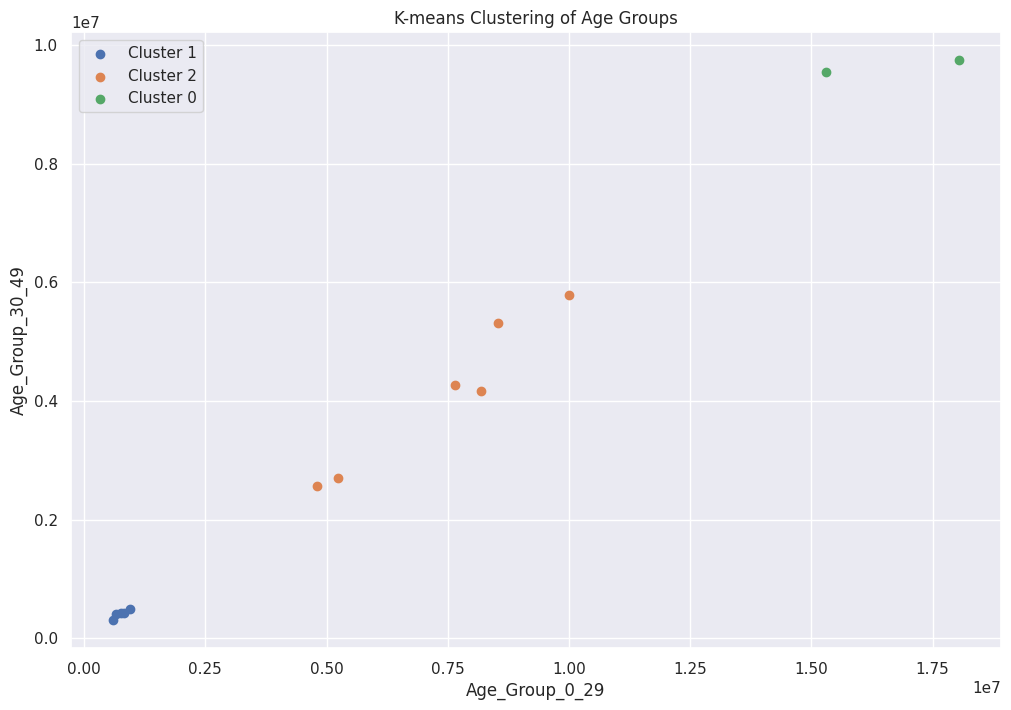

State name
ASSAM               1
CHANDIGARH          1
GUJARAT             2
HIMACHAL PRADESH    1
KARNATAKA           2
KERALA              0
MAHARASHTRA         0
NCT OF DELHI        2
ORISSA              2
PUNJAB              1
TAMIL NADU          2
TRIPURA             1
WEST BENGAL         2
Name: cluster, dtype: int32


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting numerical features for clustering
X = age_data[['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']]

# Normalize the data
# You can use MinMaxScaler or StandardScaler from sklearn.preprocessing for normalization

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the appropriate number of clusters
age_data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(12, 8))
for cluster in age_data['cluster'].unique():
    plt.scatter(X[age_data['cluster'] == cluster]['Age_Group_0_29'],
                X[age_data['cluster'] == cluster]['Age_Group_30_49'],
                label=f'Cluster {cluster}')
plt.xlabel('Age_Group_0_29')
plt.ylabel('Age_Group_30_49')
plt.title('K-means Clustering of Age Groups')
plt.legend()
plt.show()
print(age_data['cluster'])

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 17.8 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


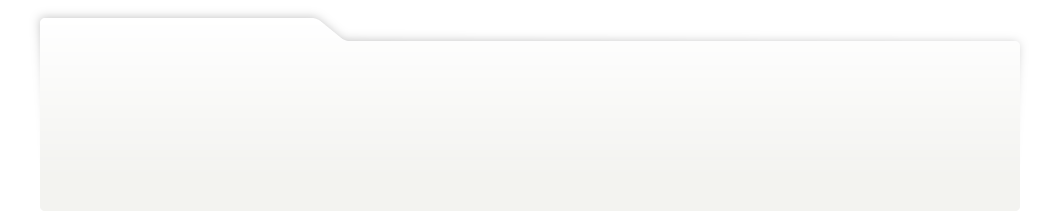
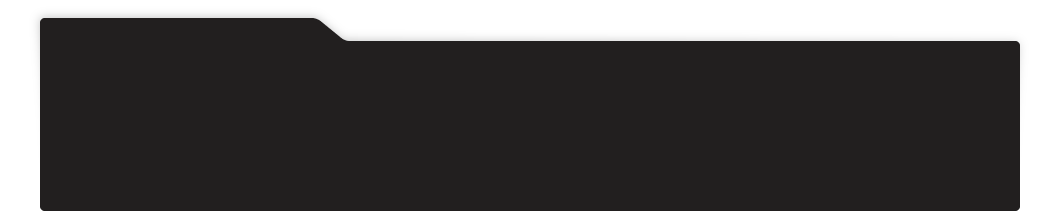
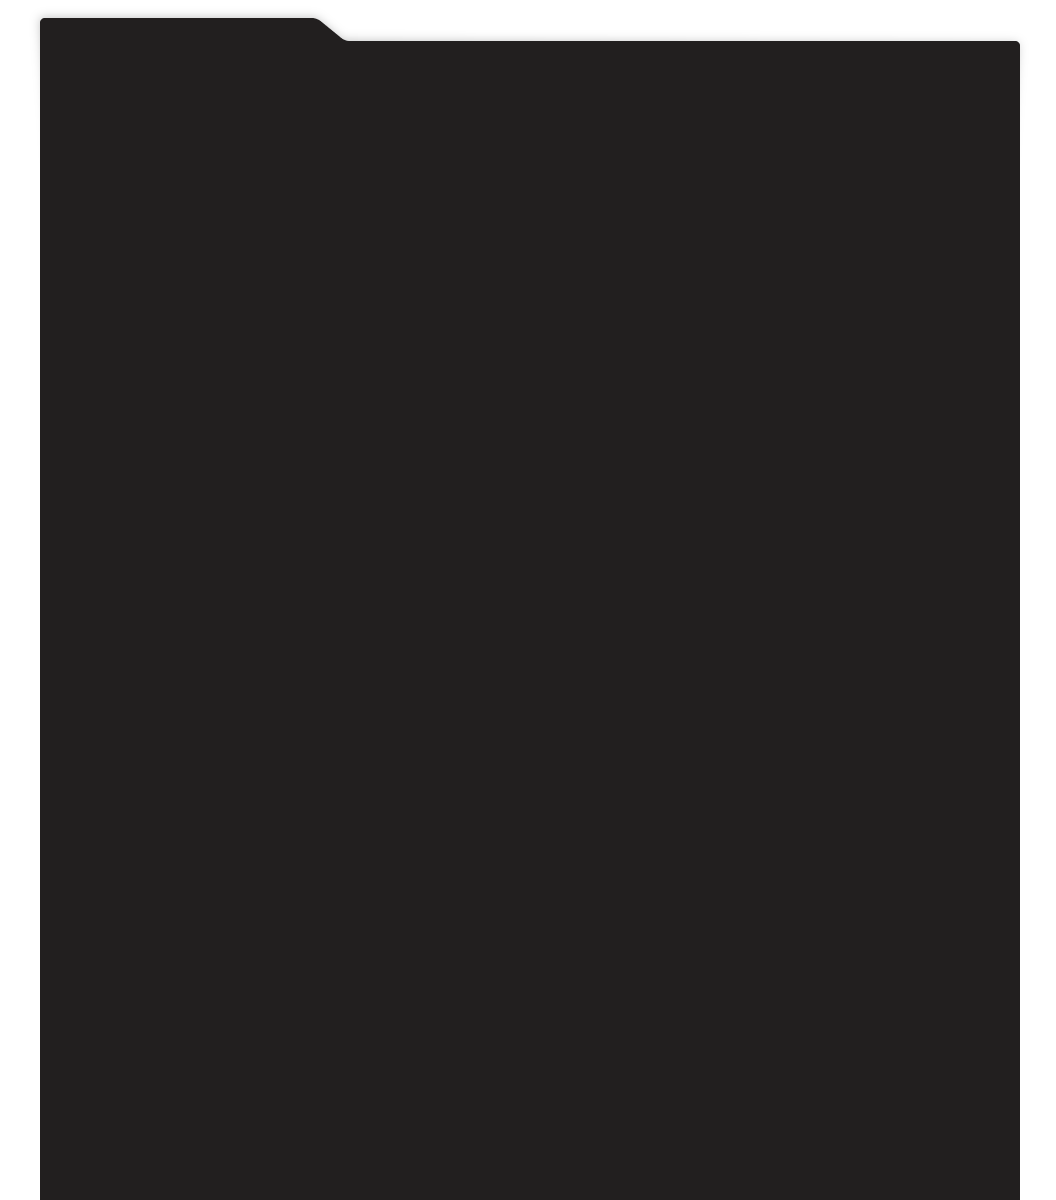
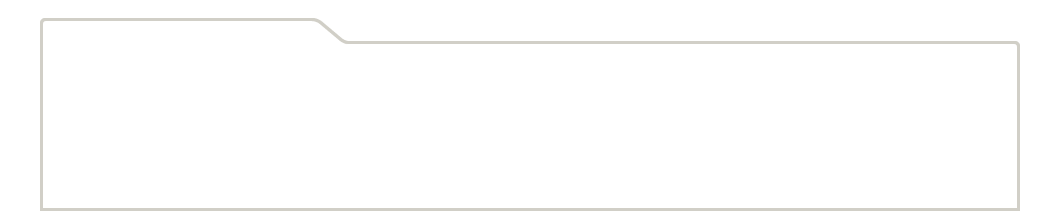
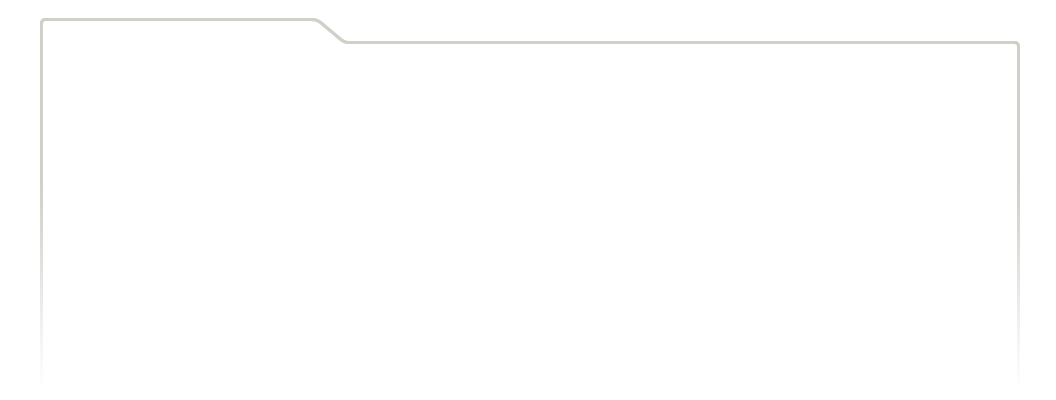
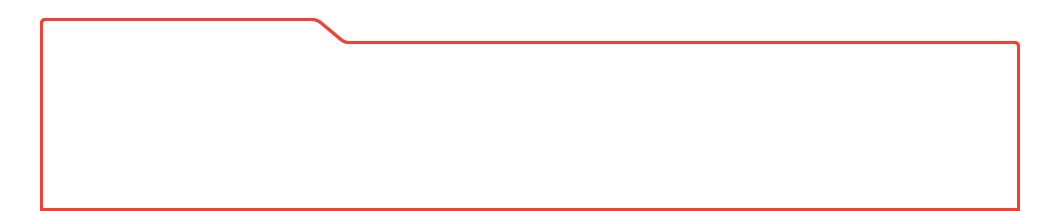
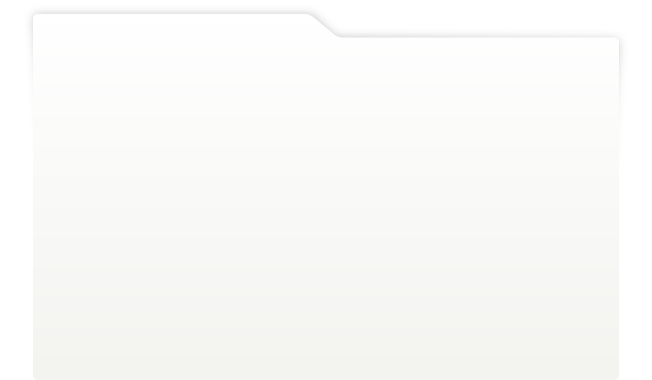
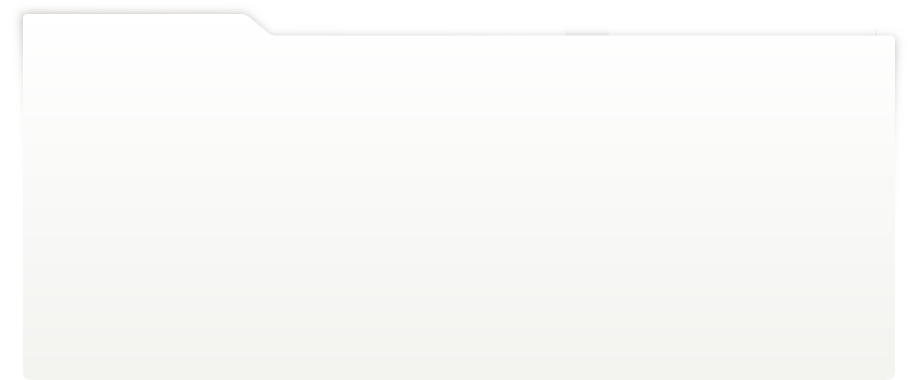
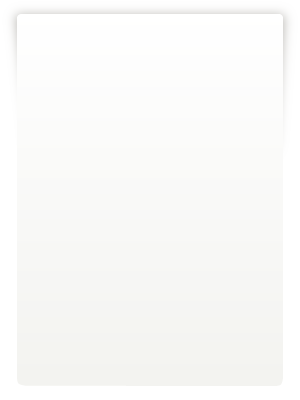
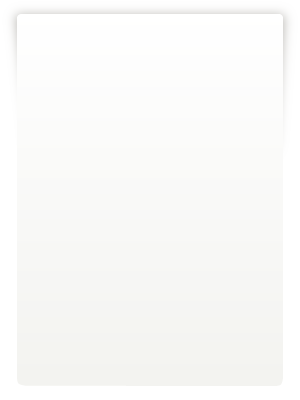
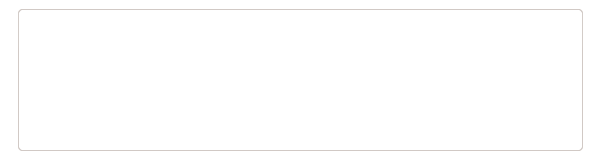
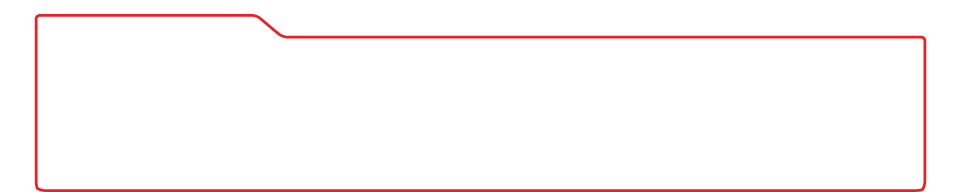
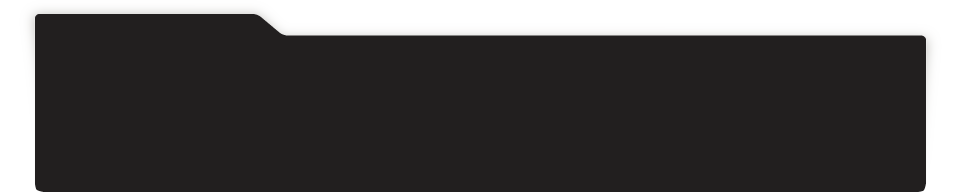
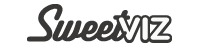
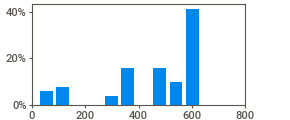
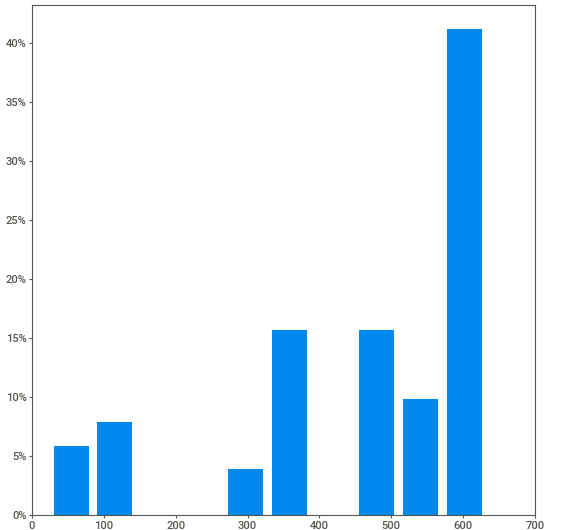
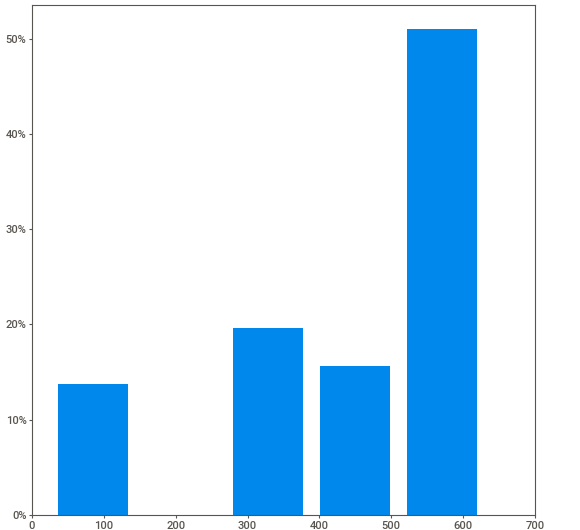
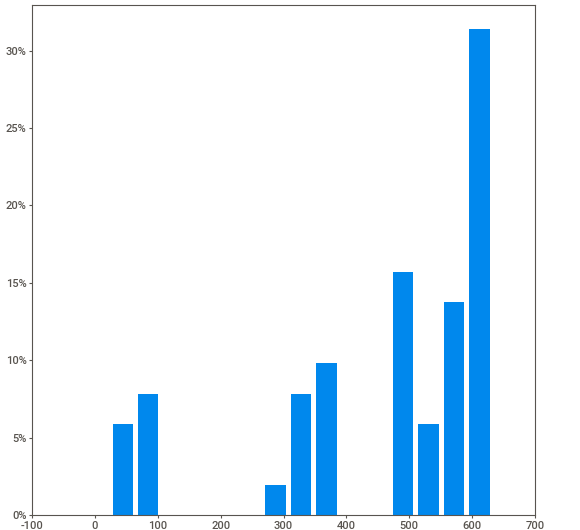
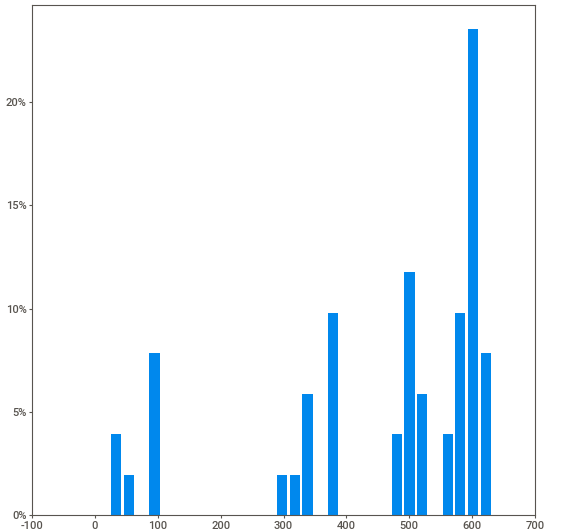
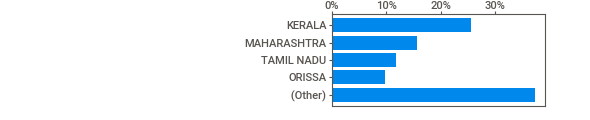
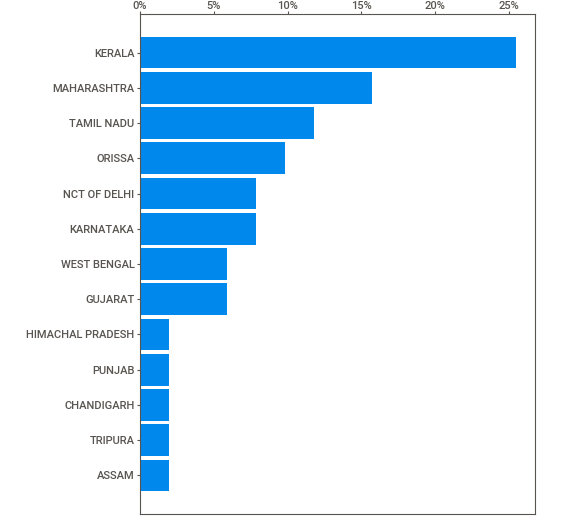
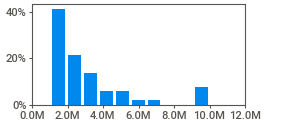
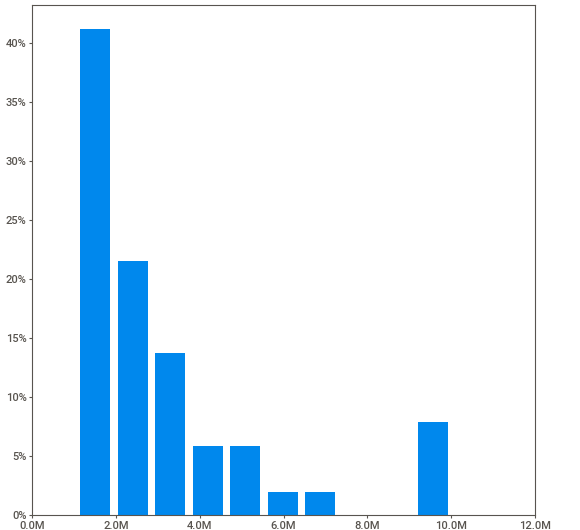
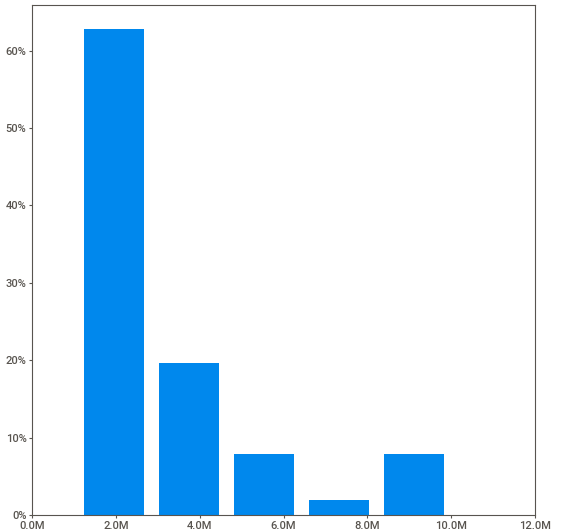
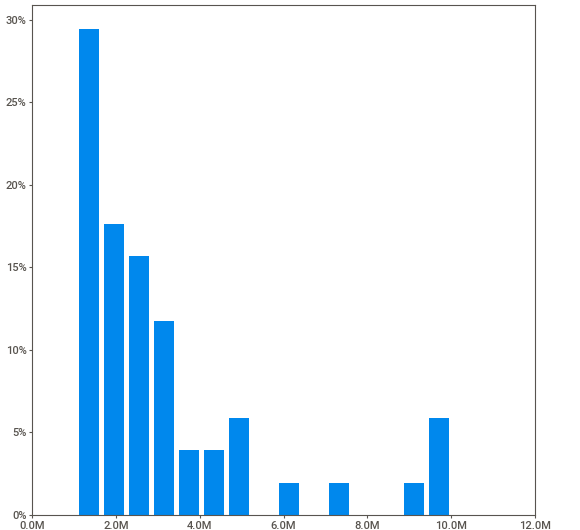
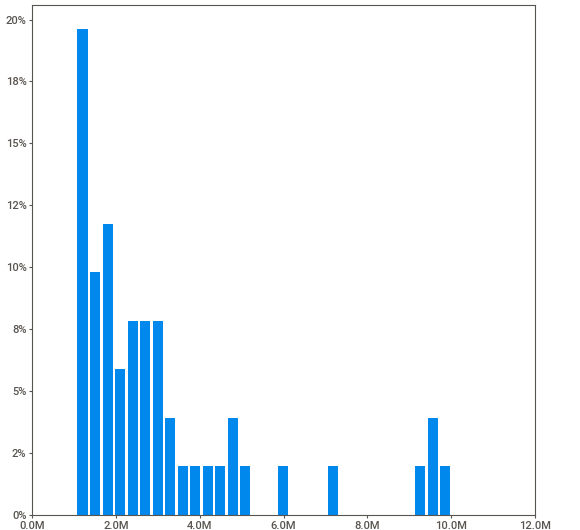
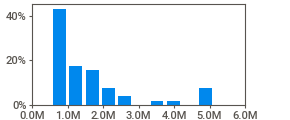
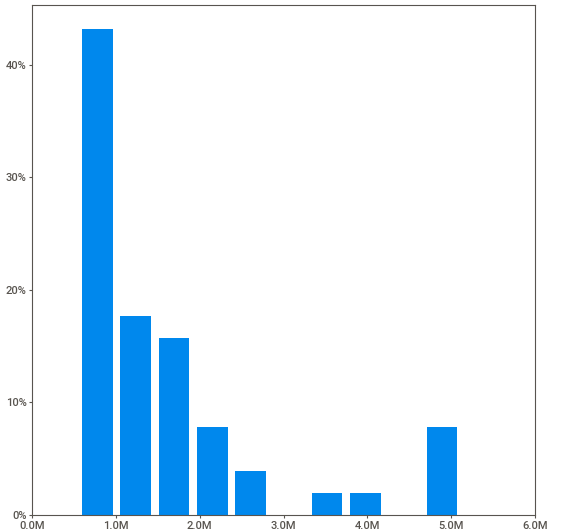
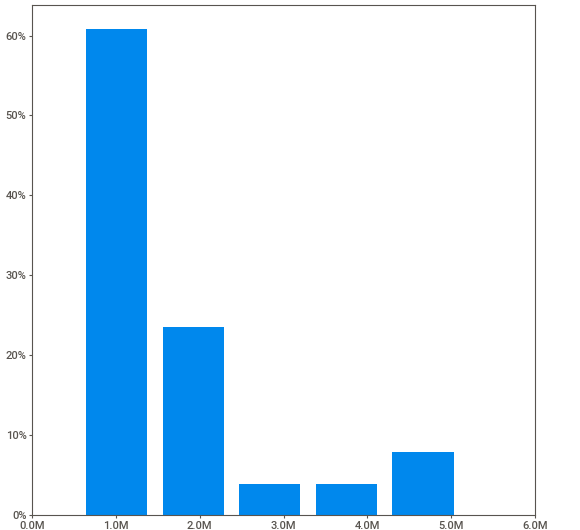
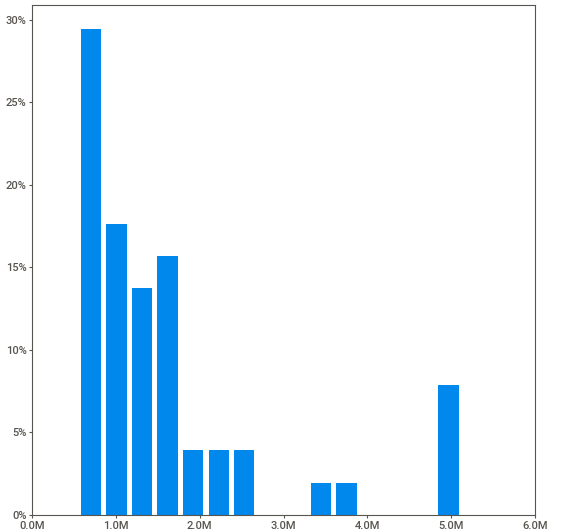
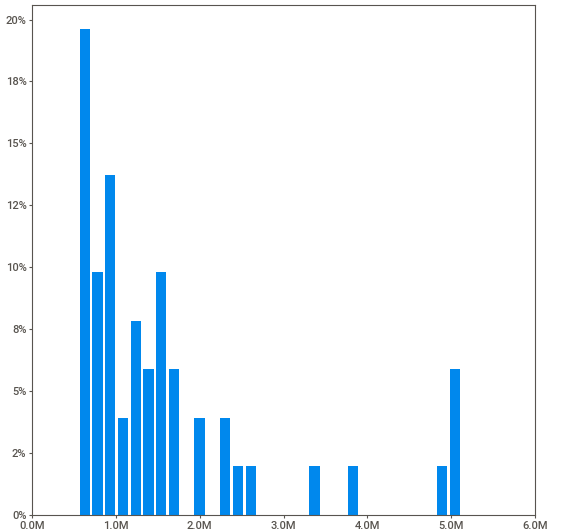
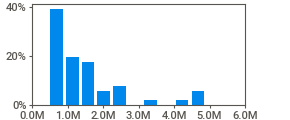
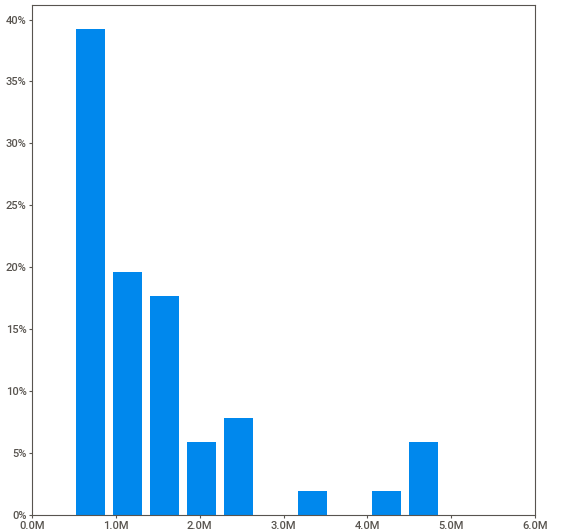
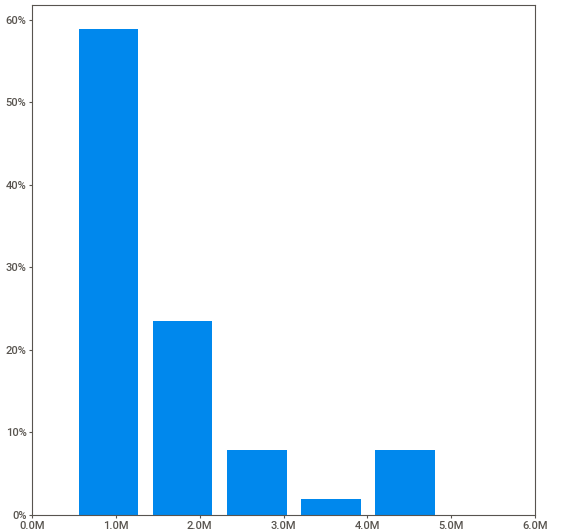
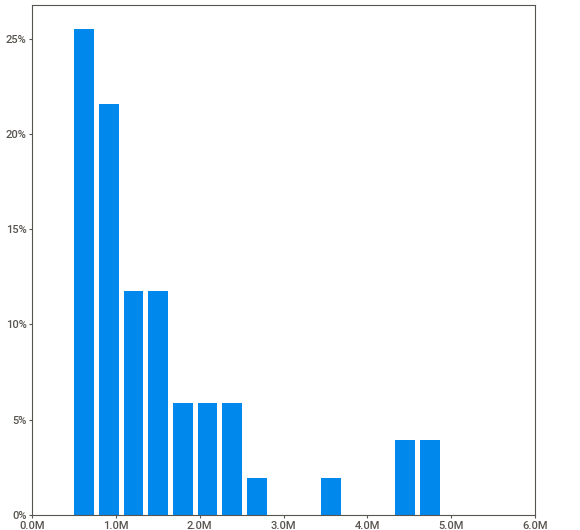
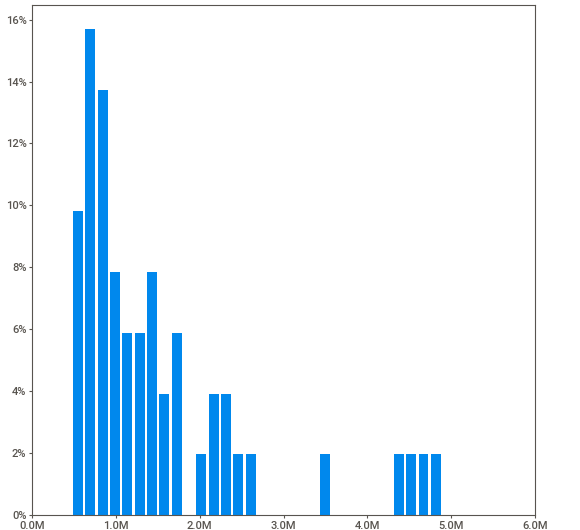
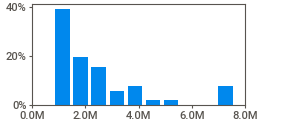
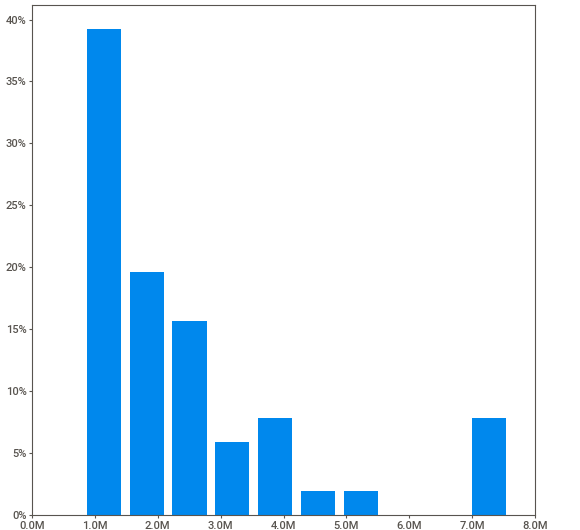
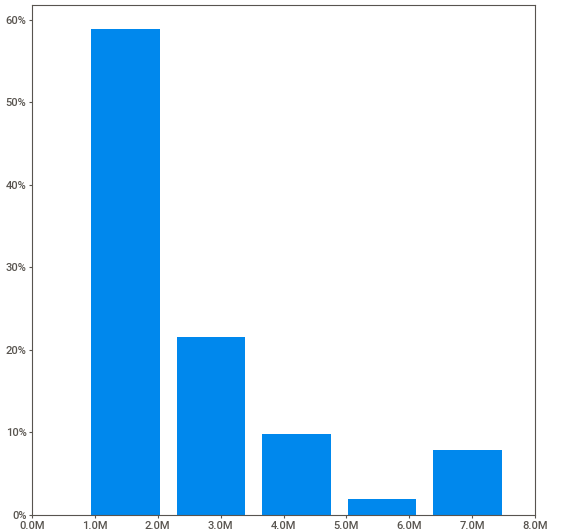
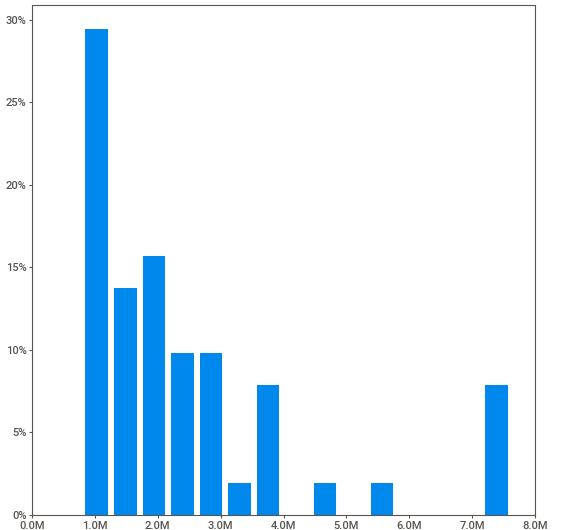
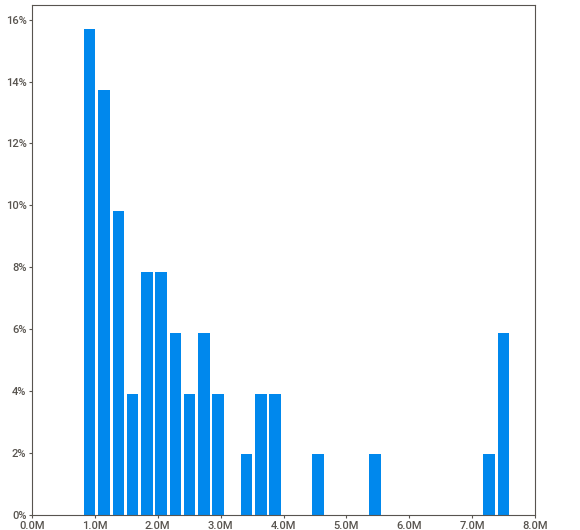
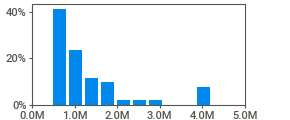
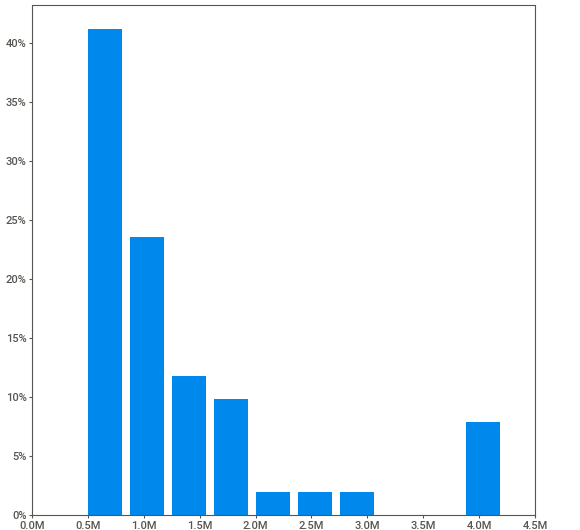
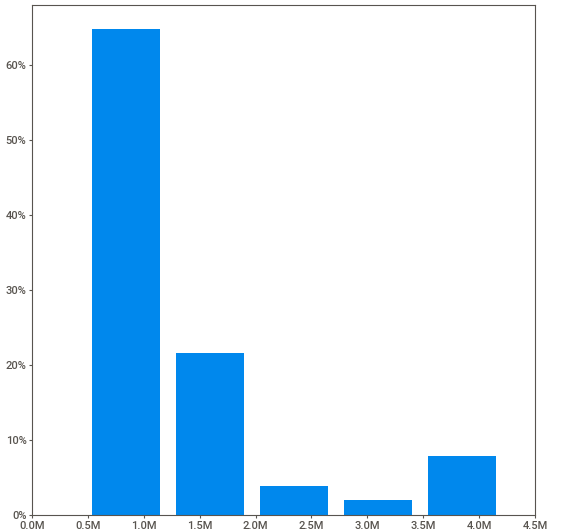
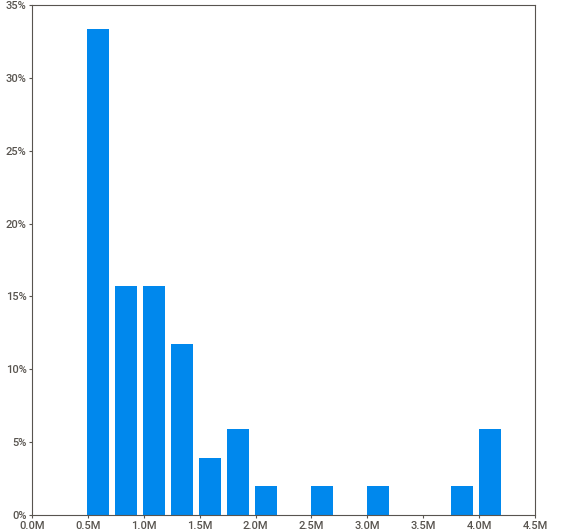
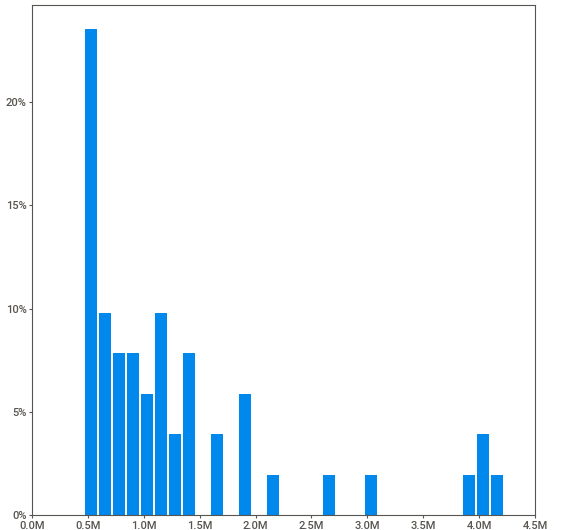
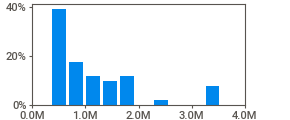
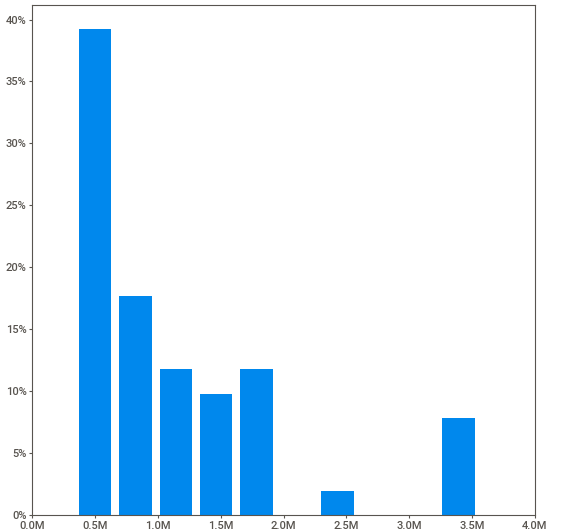
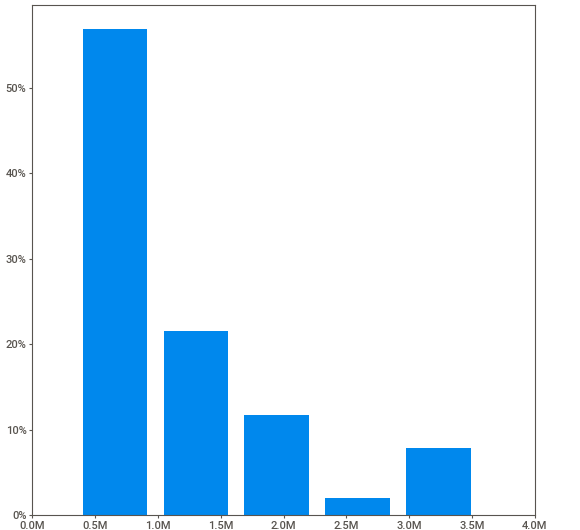
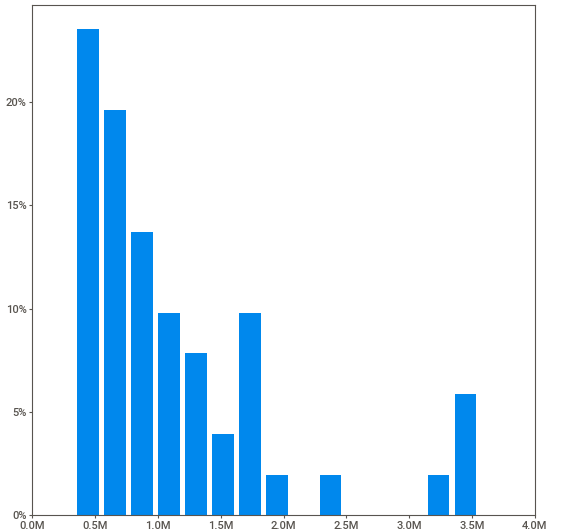
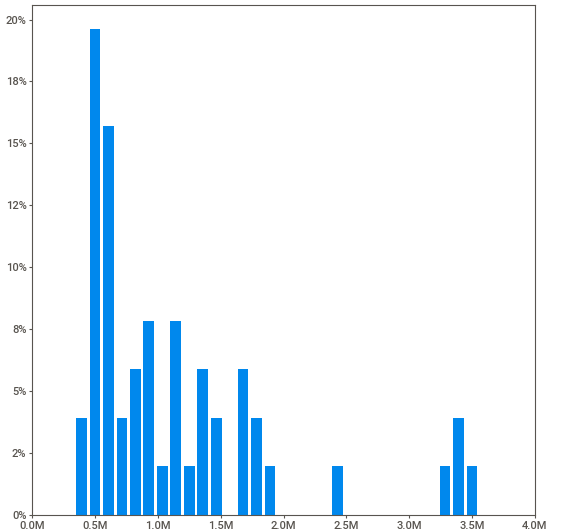
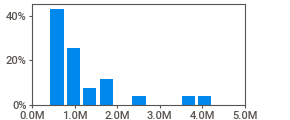
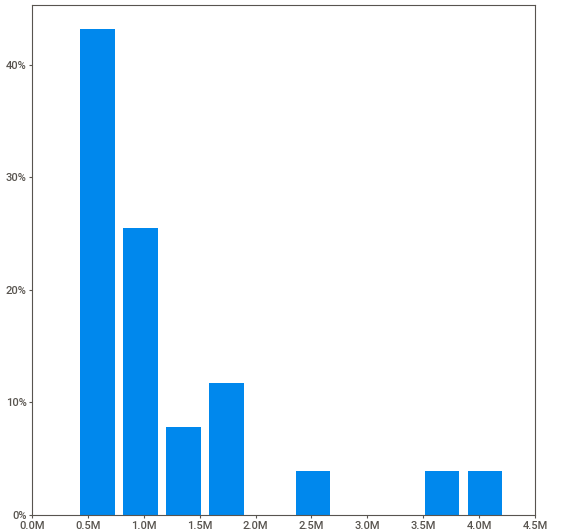
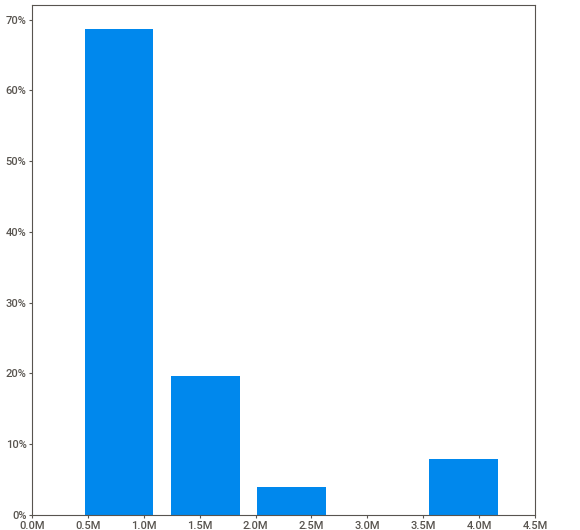
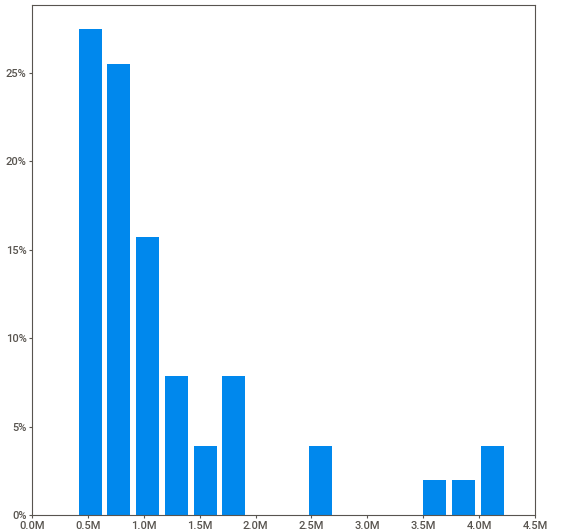
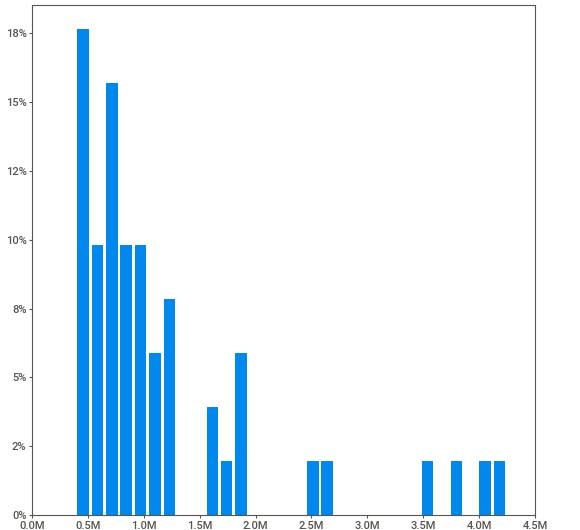
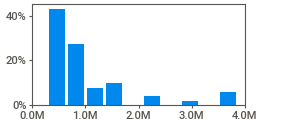
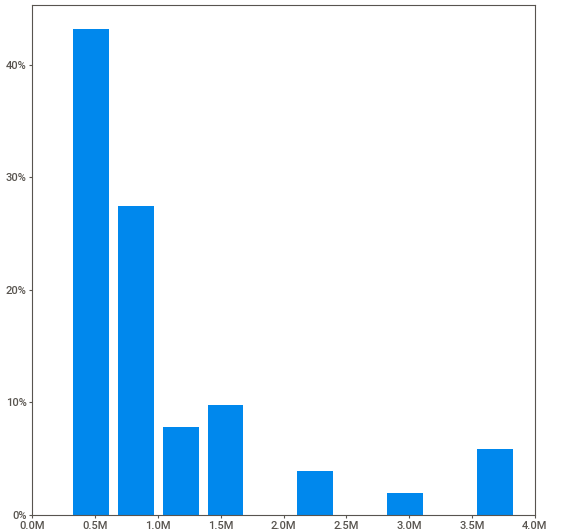
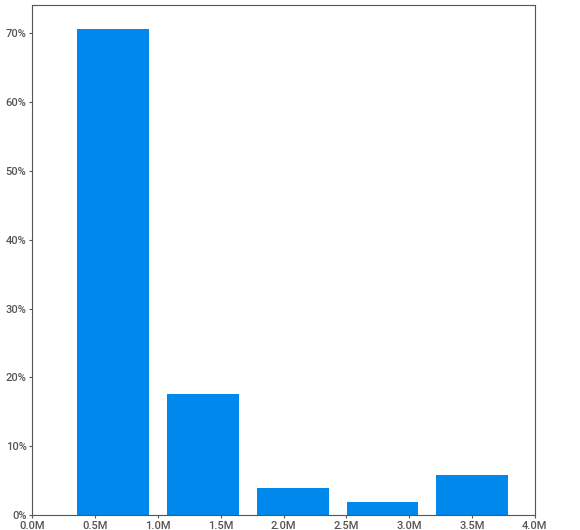
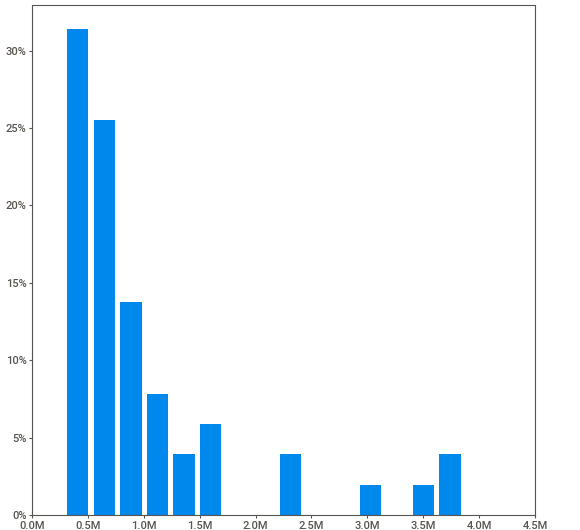
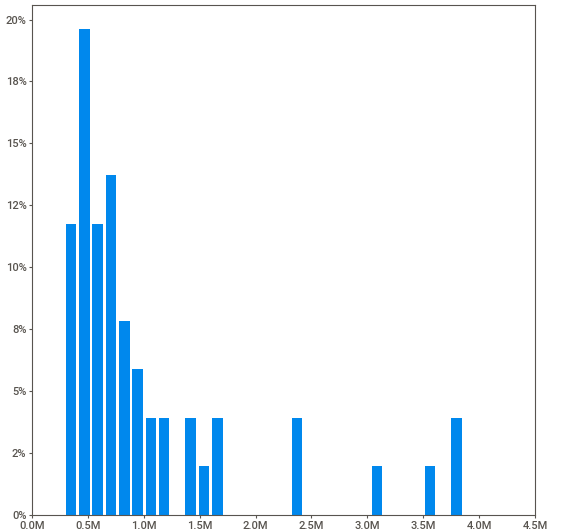
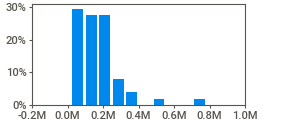
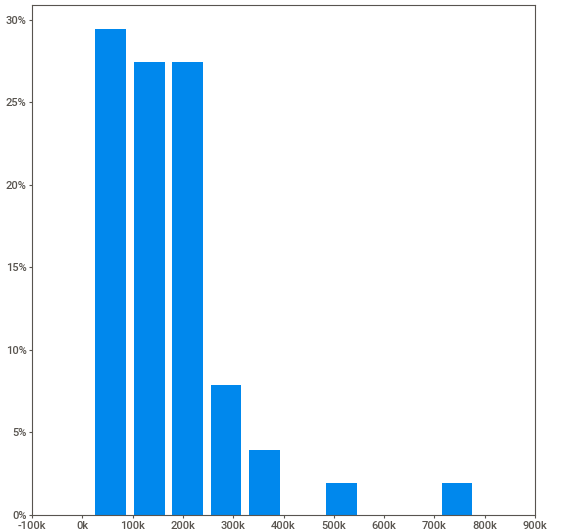
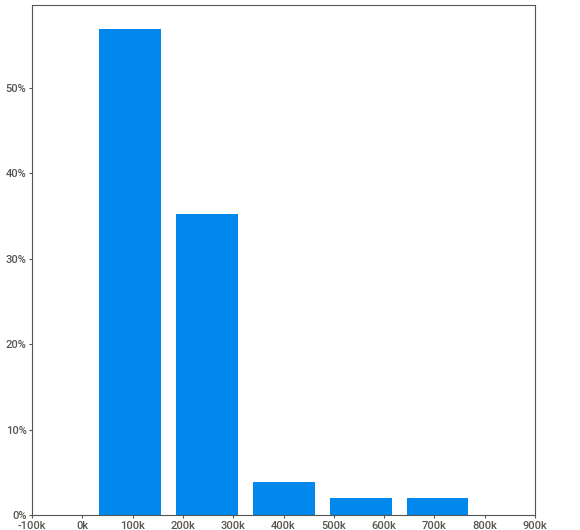
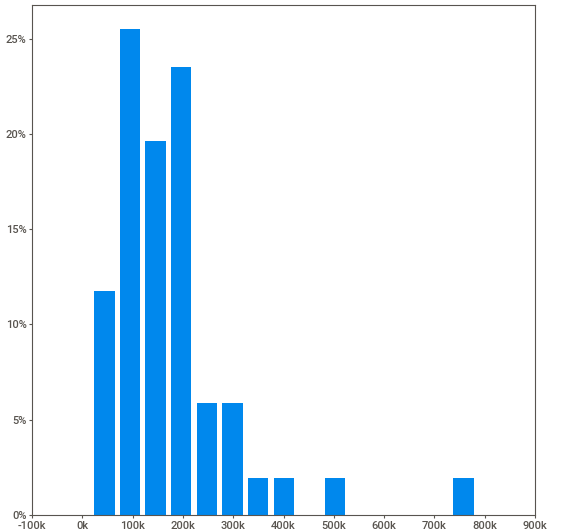
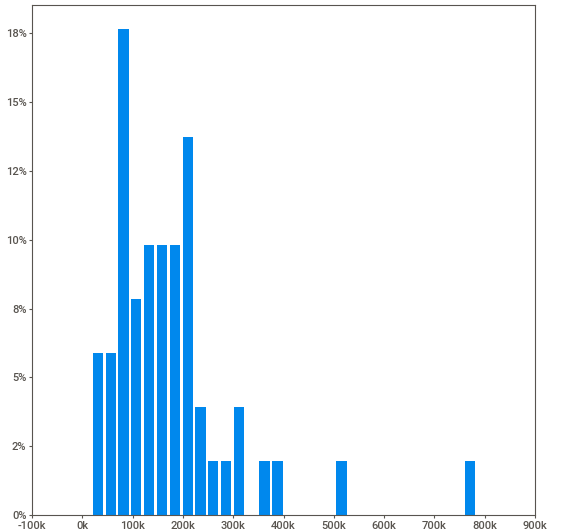
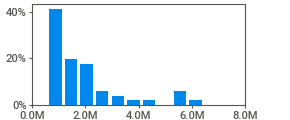
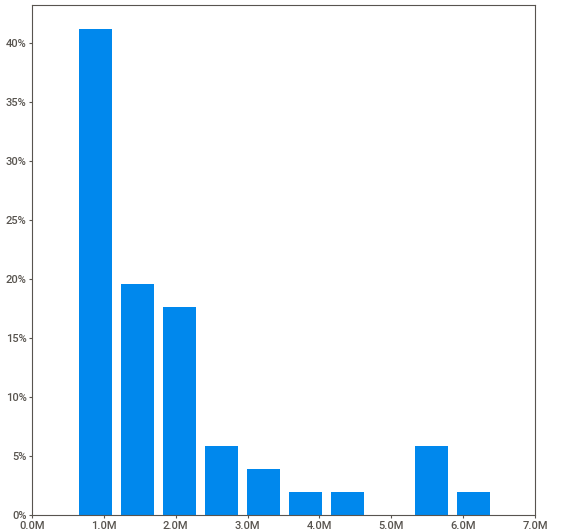
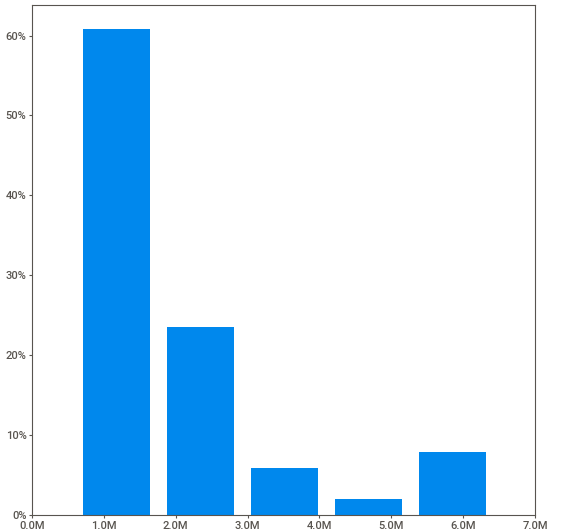
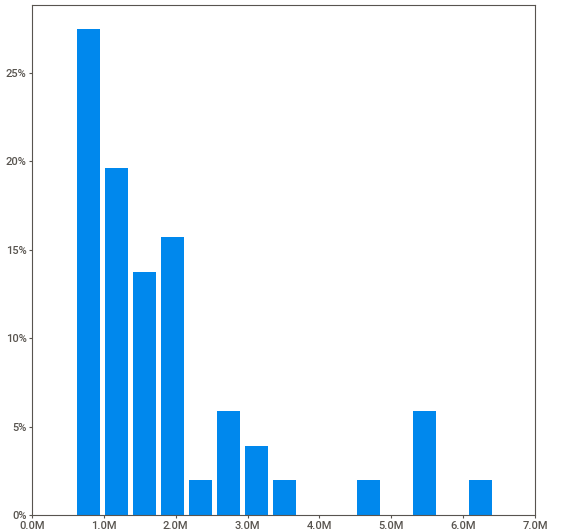
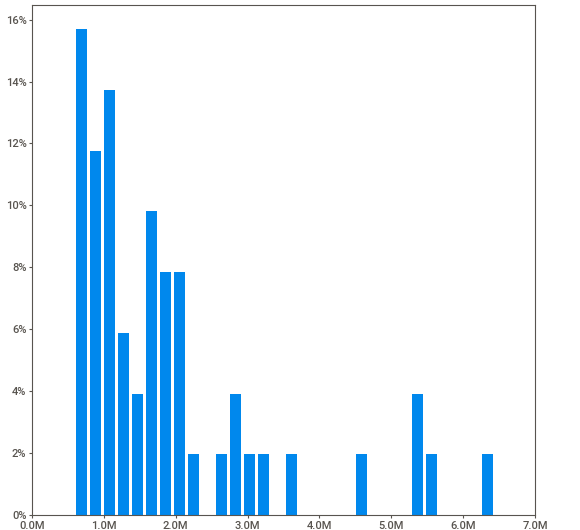
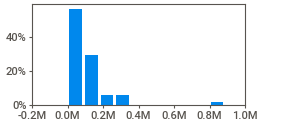
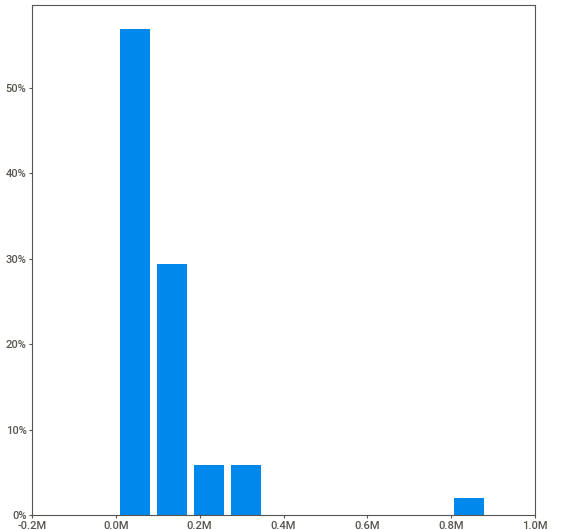
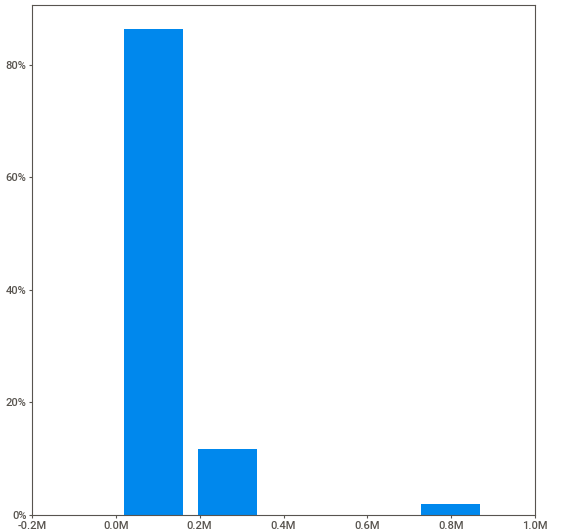
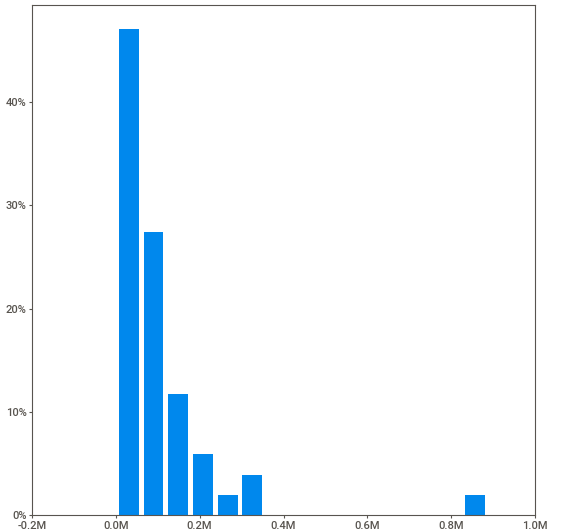
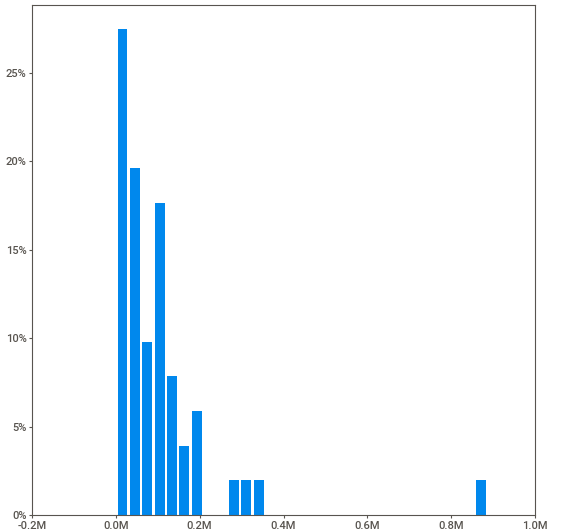
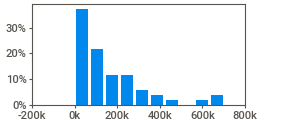
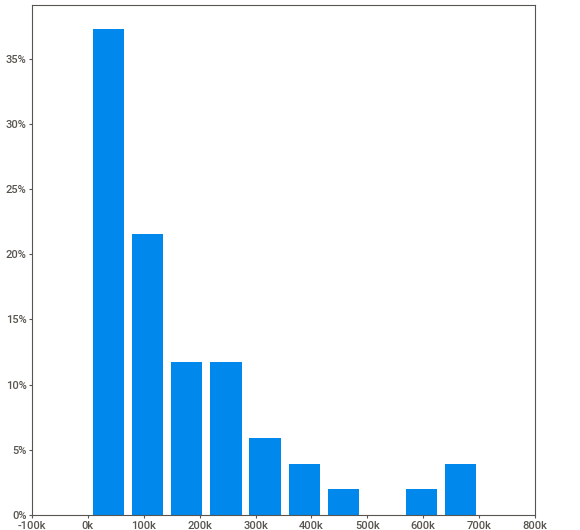
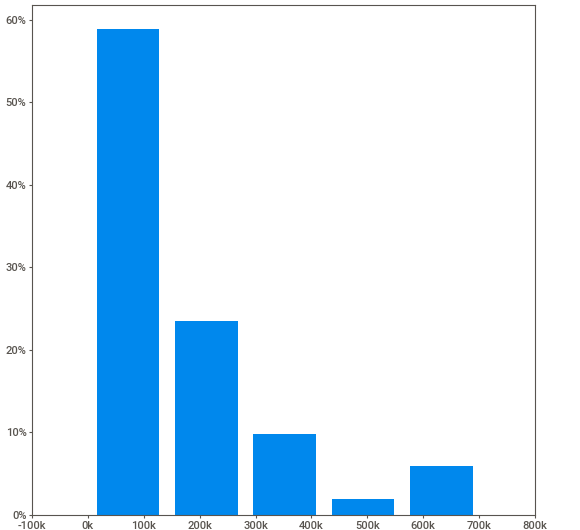
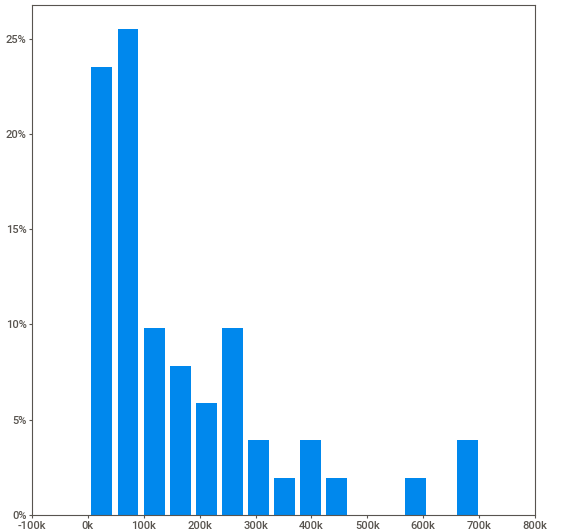
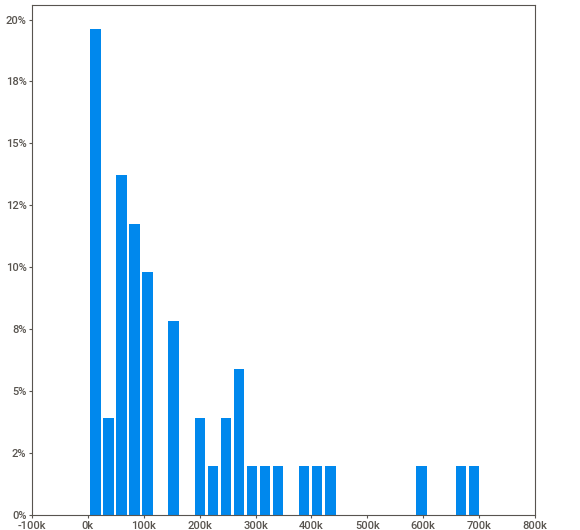
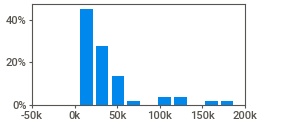
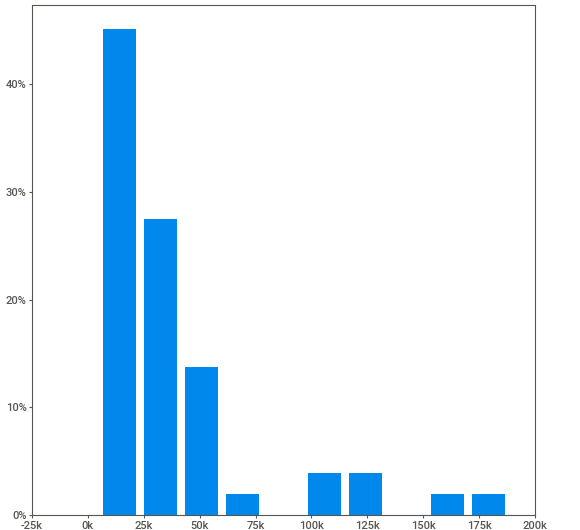
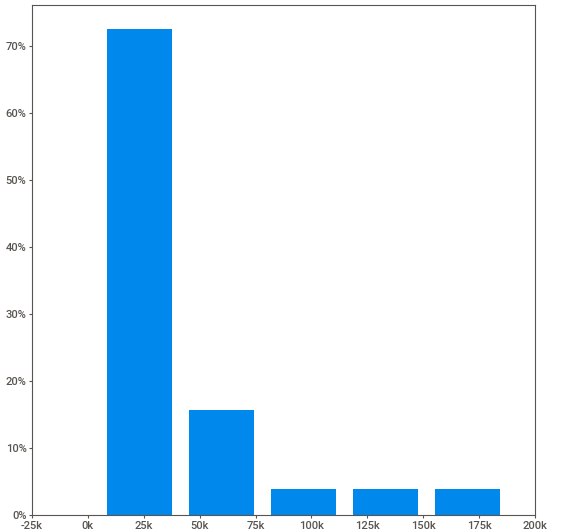
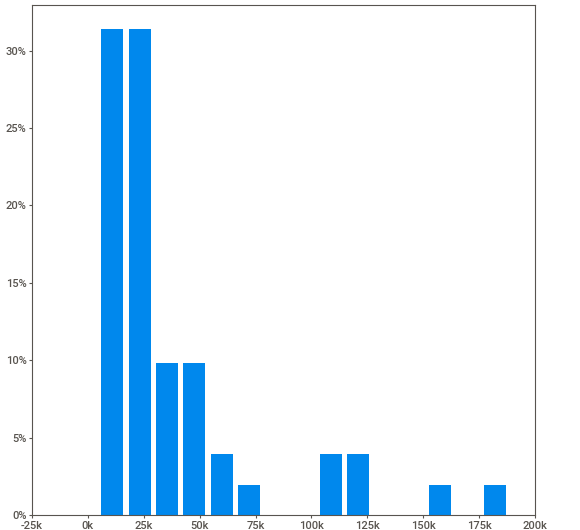
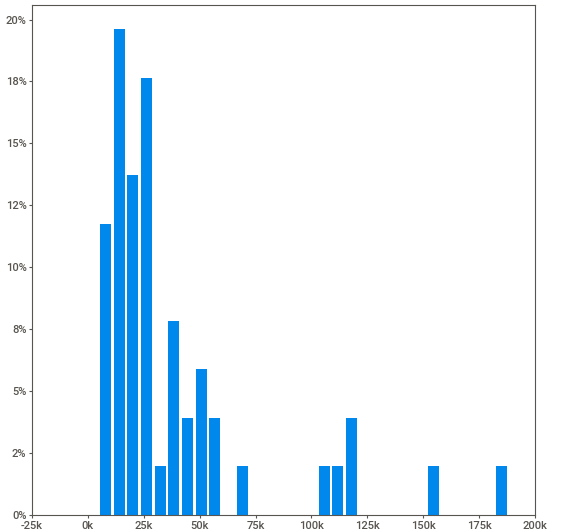
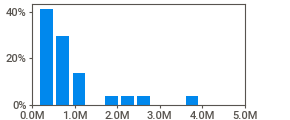
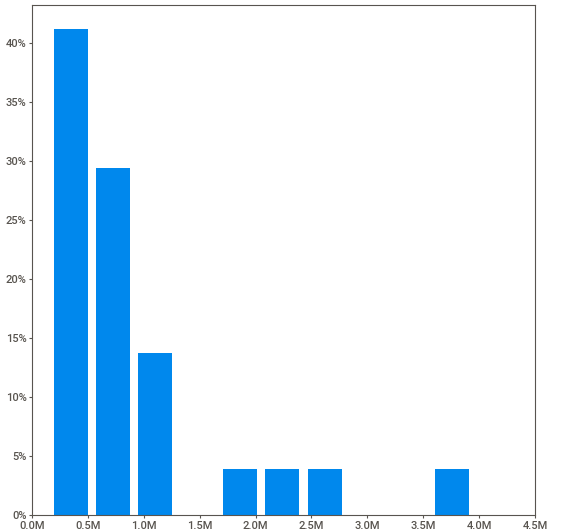
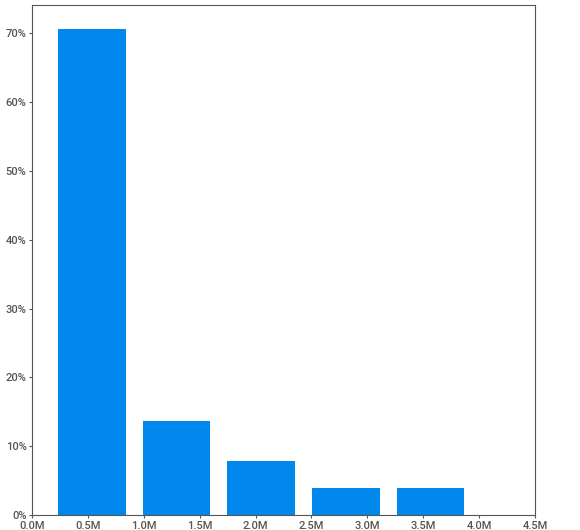
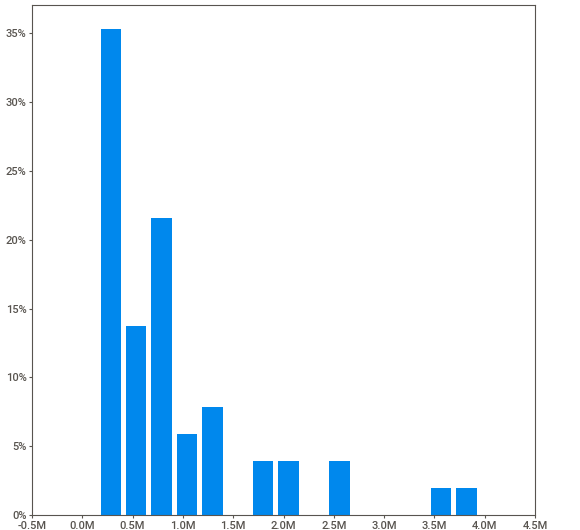
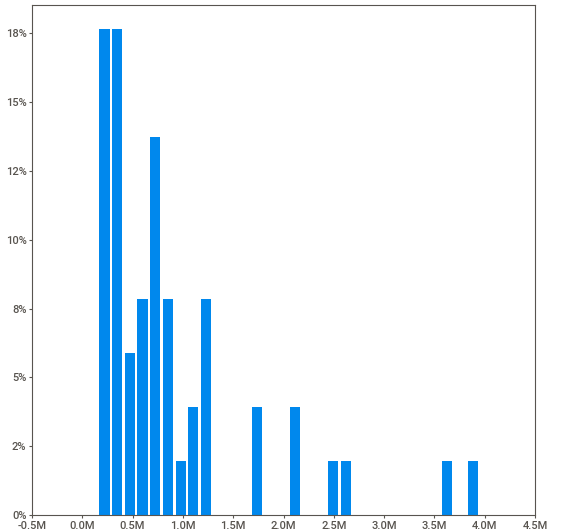
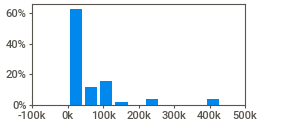
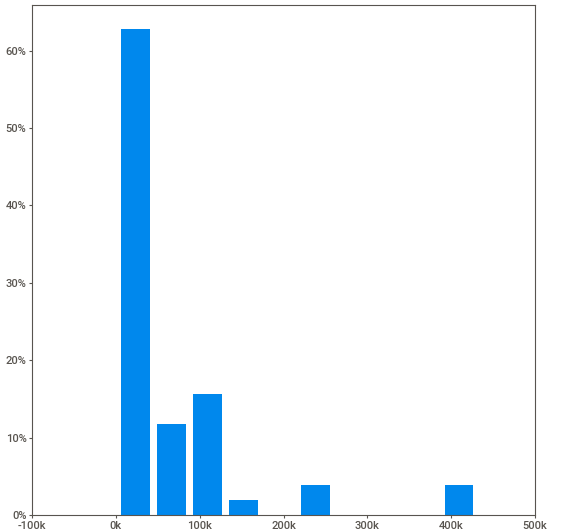
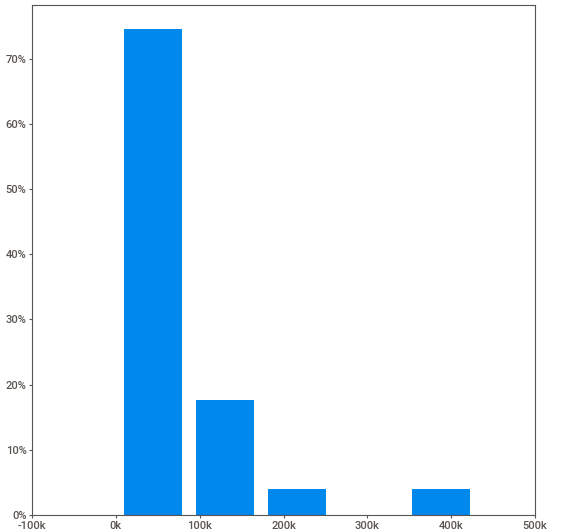
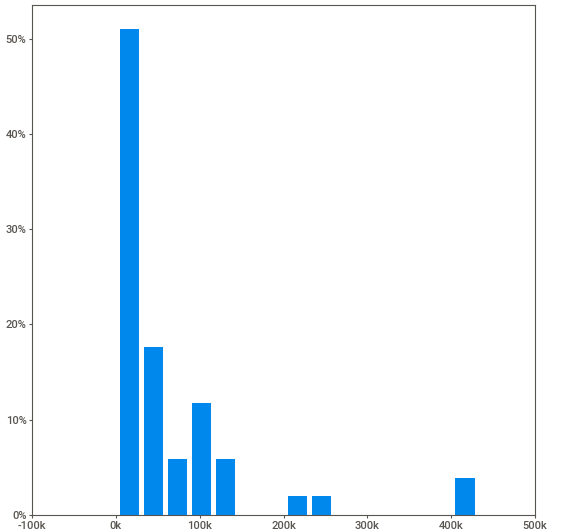
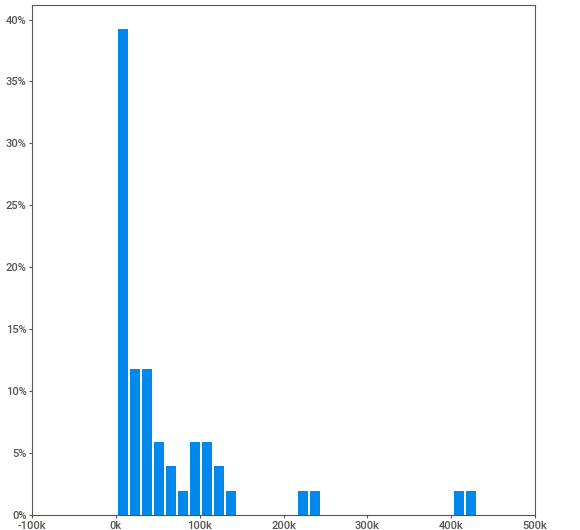
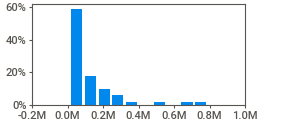
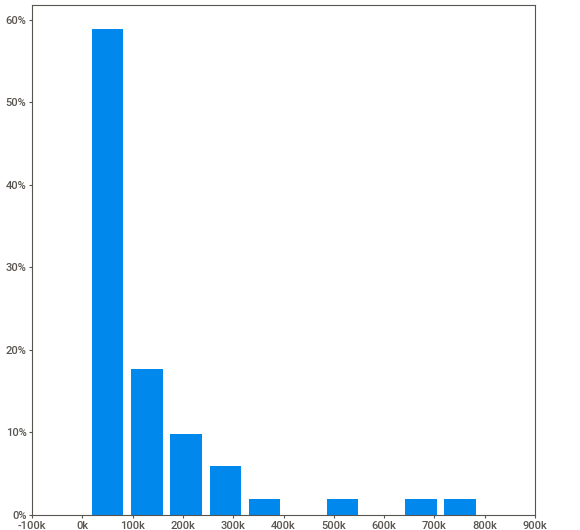
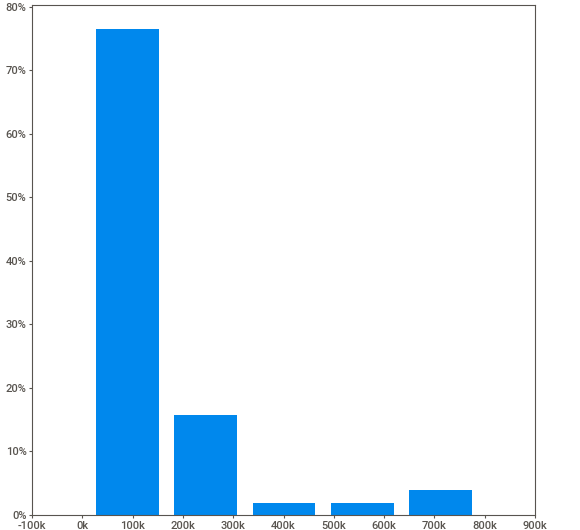
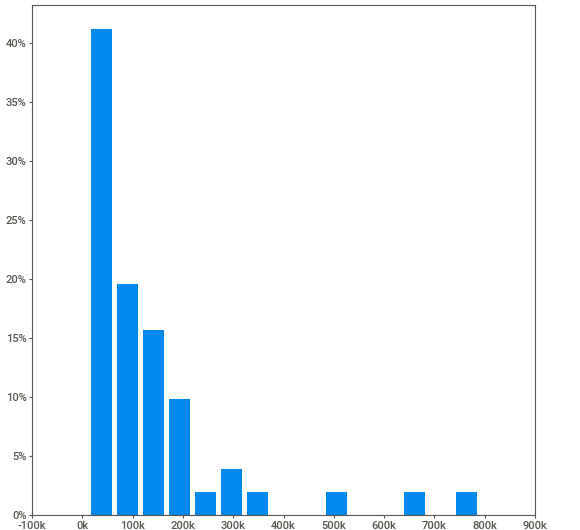
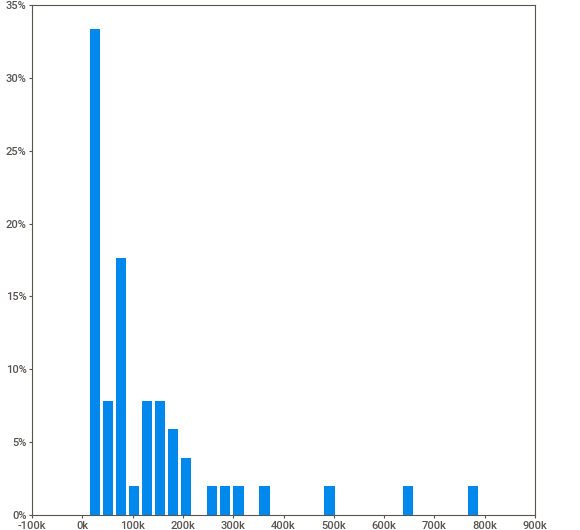
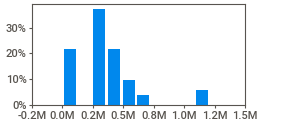
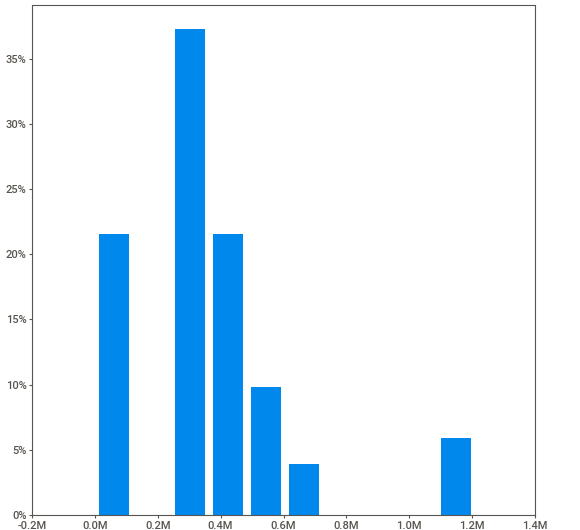
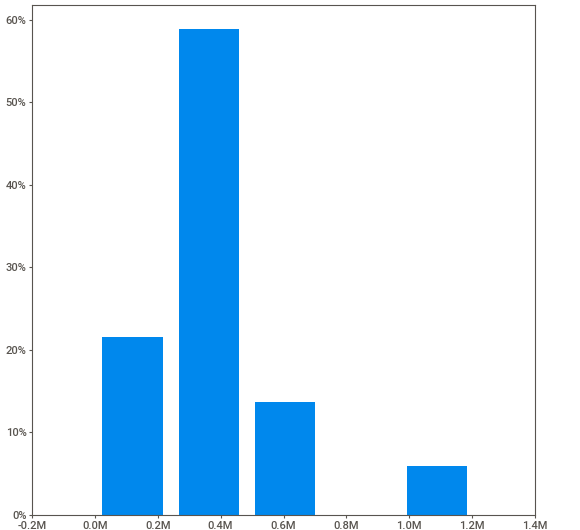
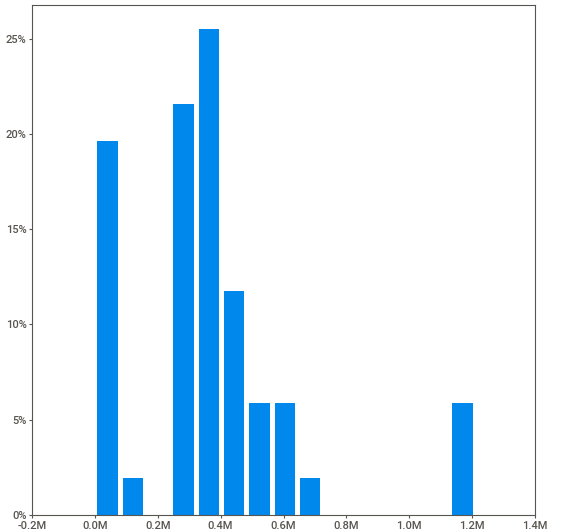
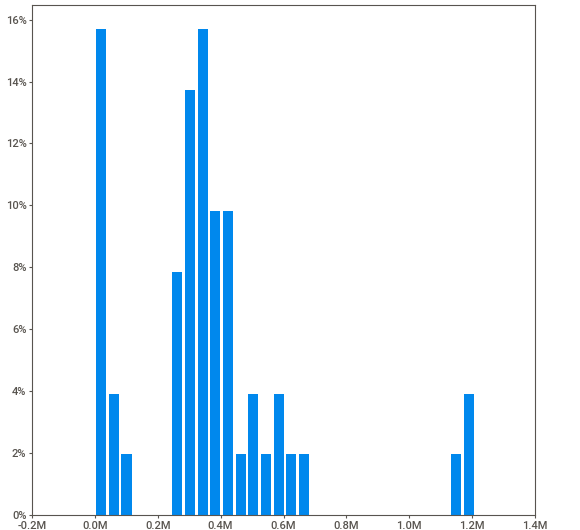
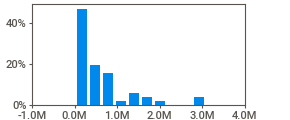
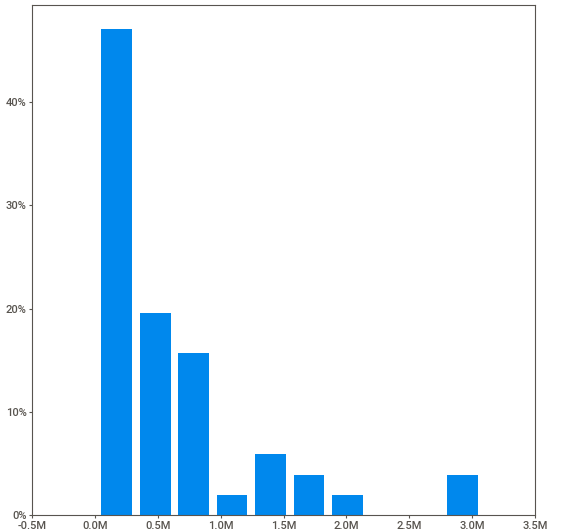
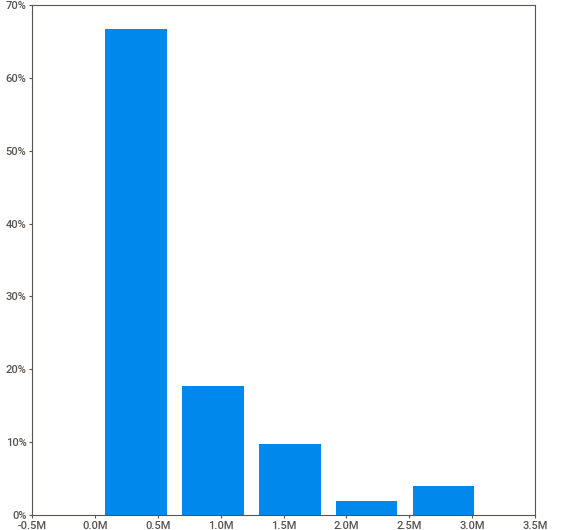
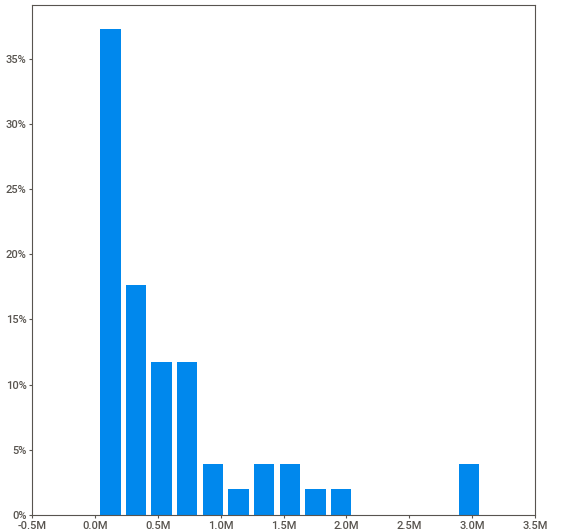
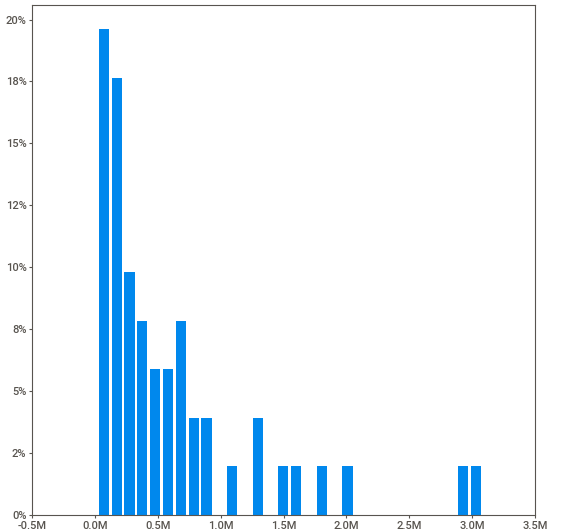
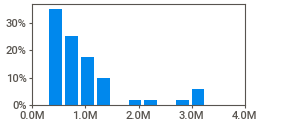
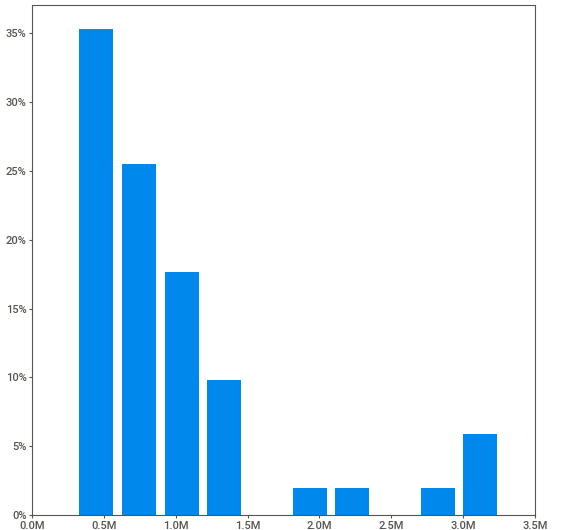
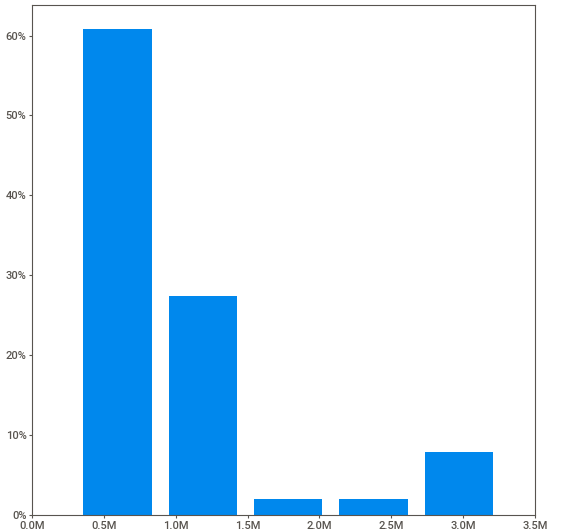
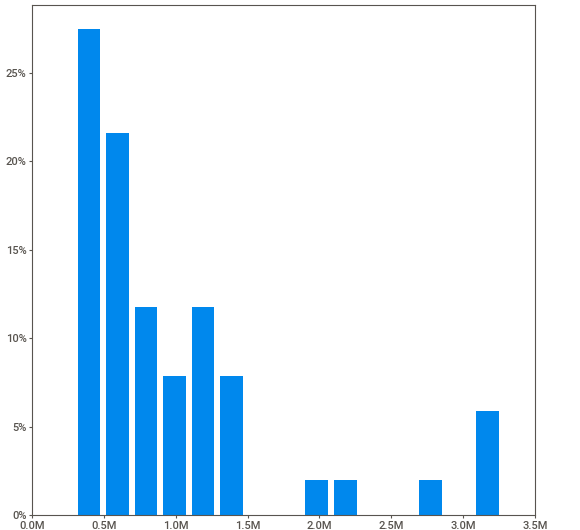
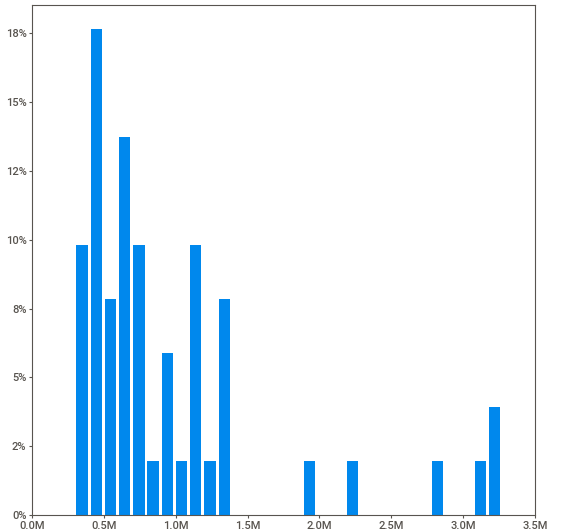
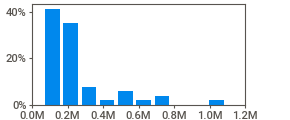
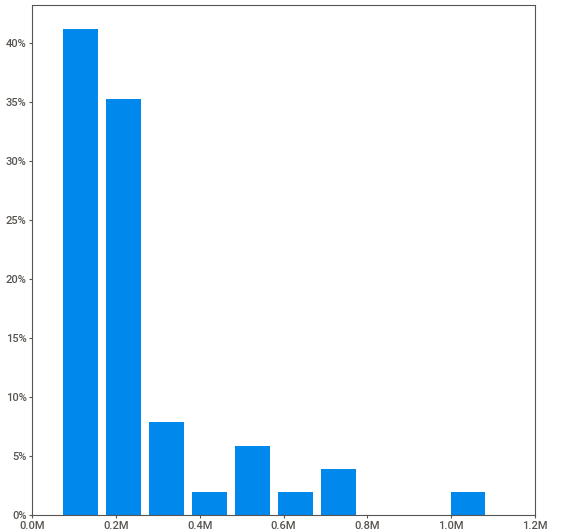
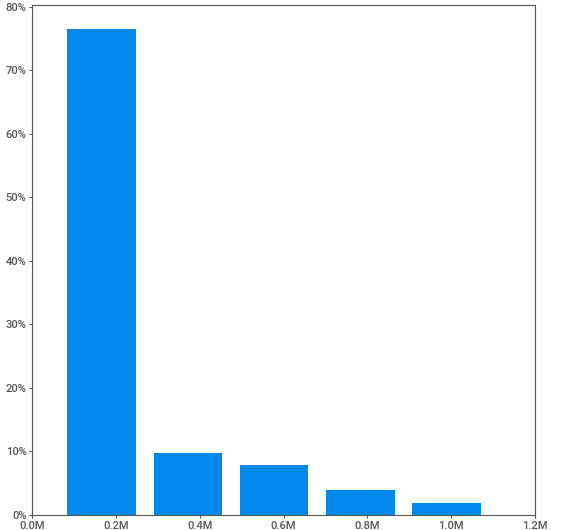
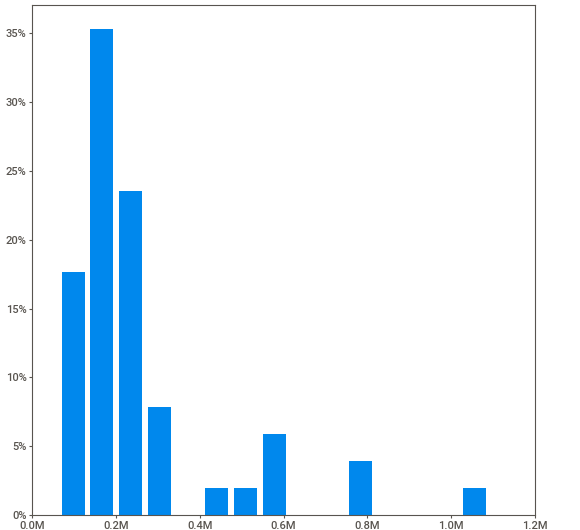
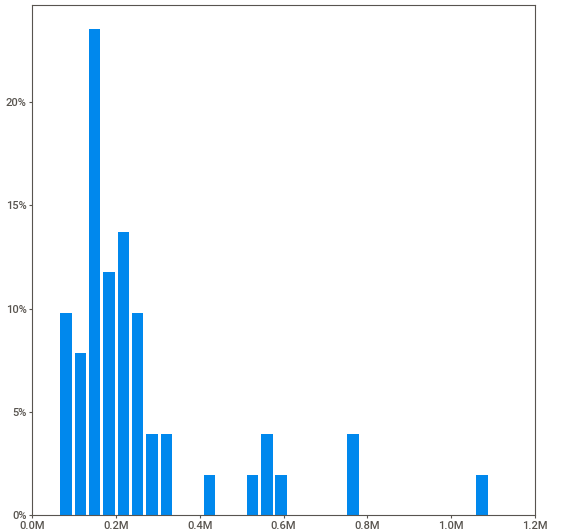
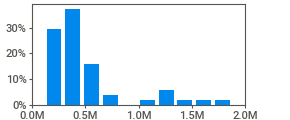
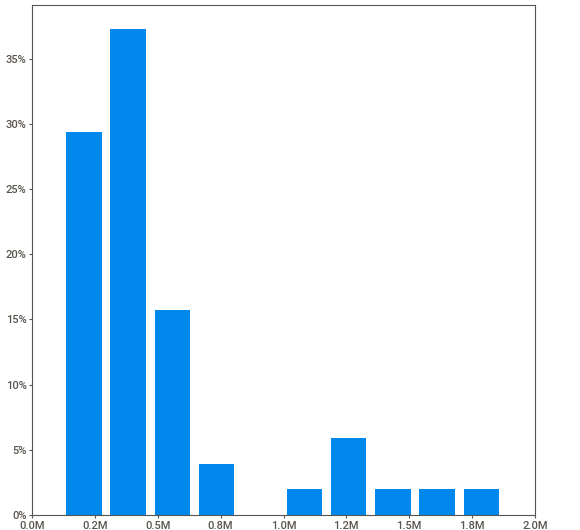
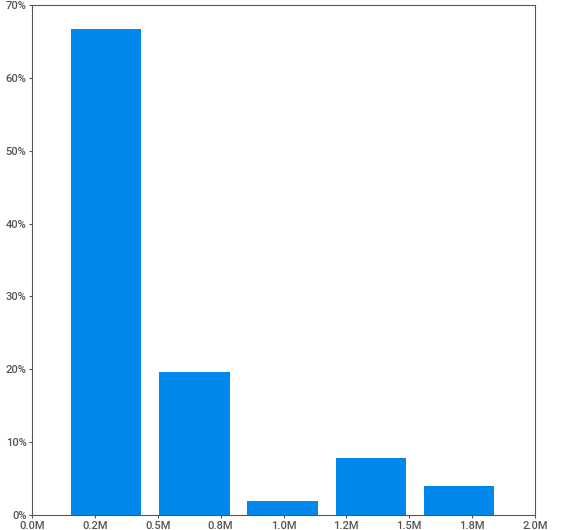
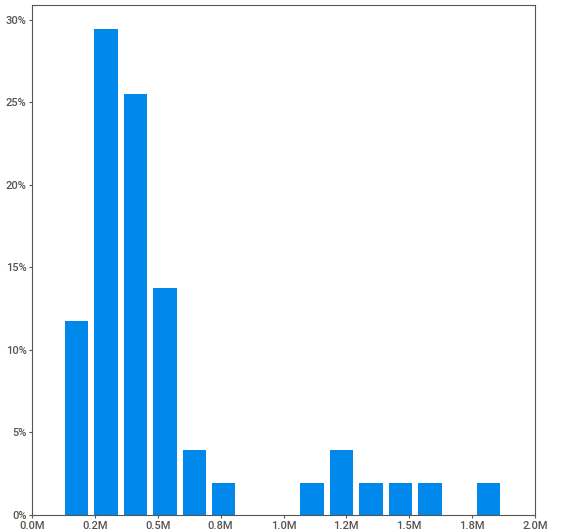
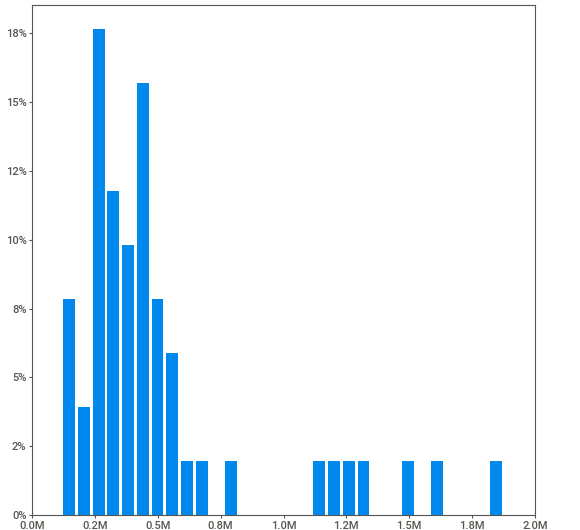
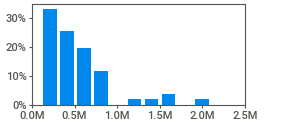
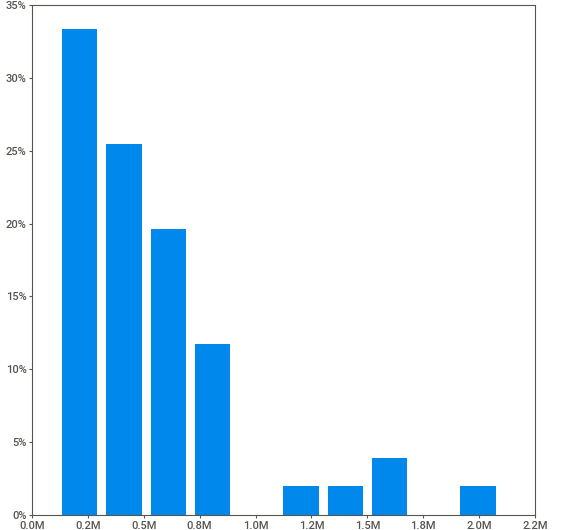
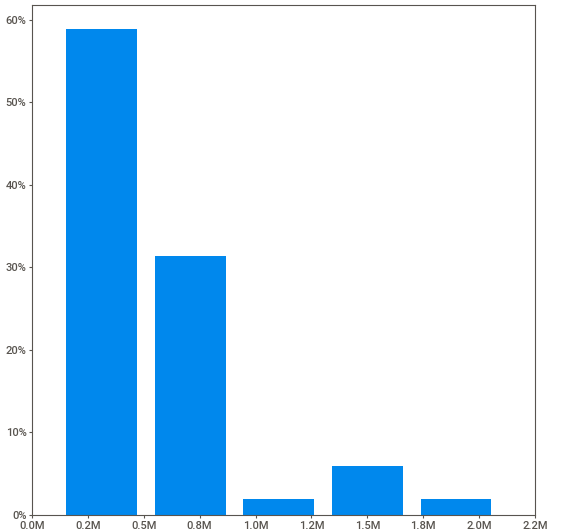
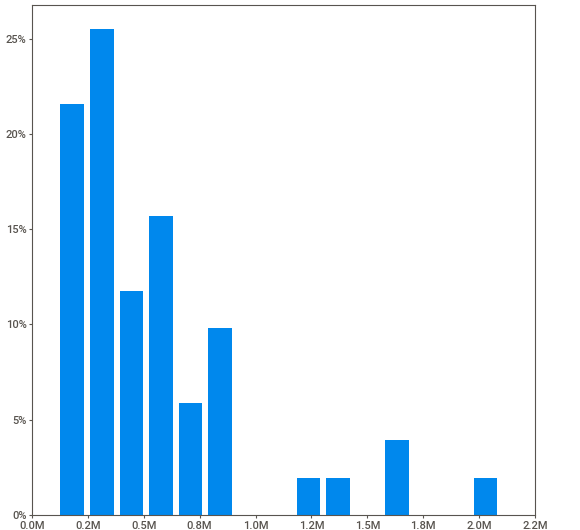
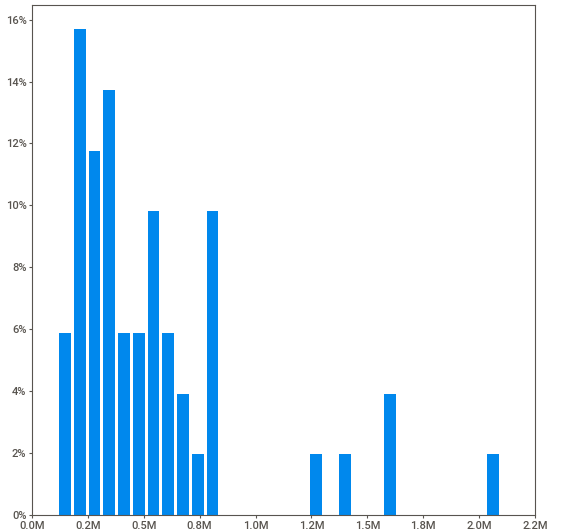
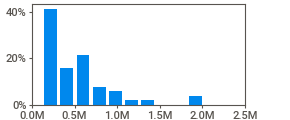
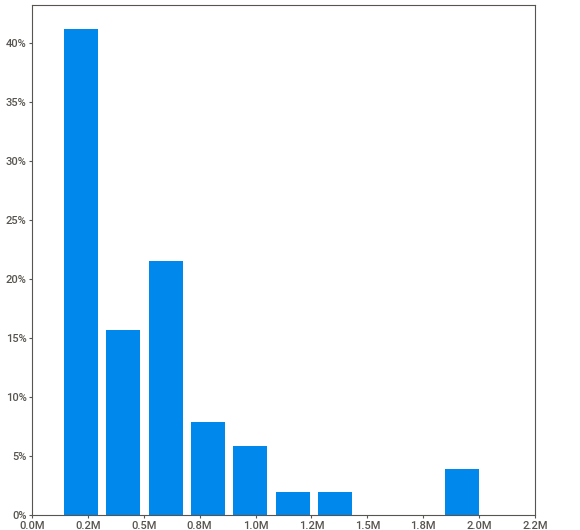
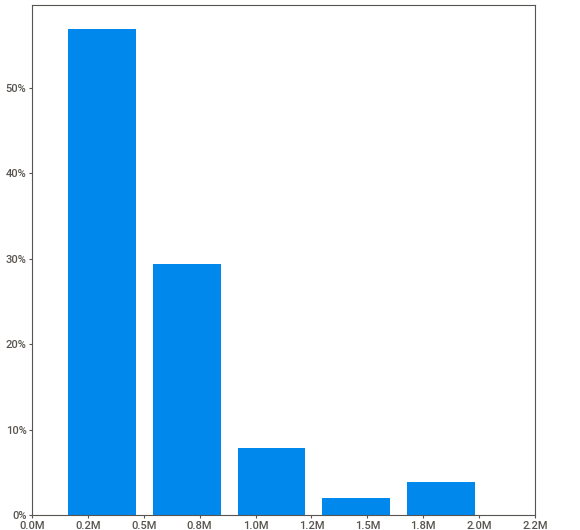
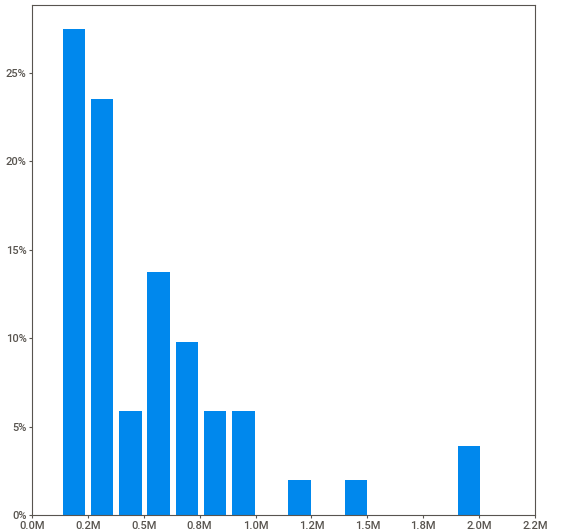
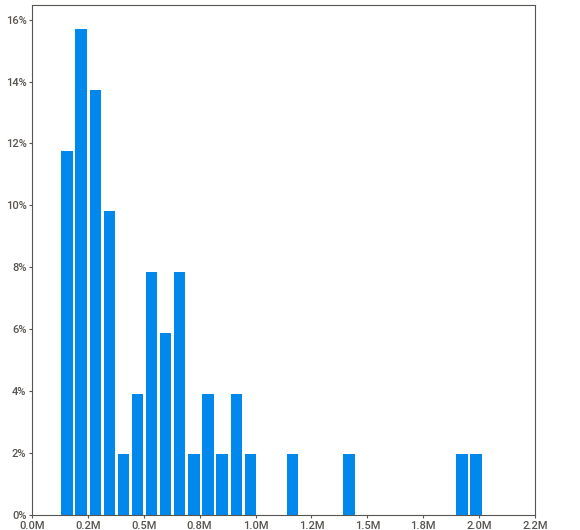
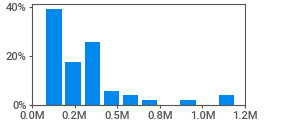
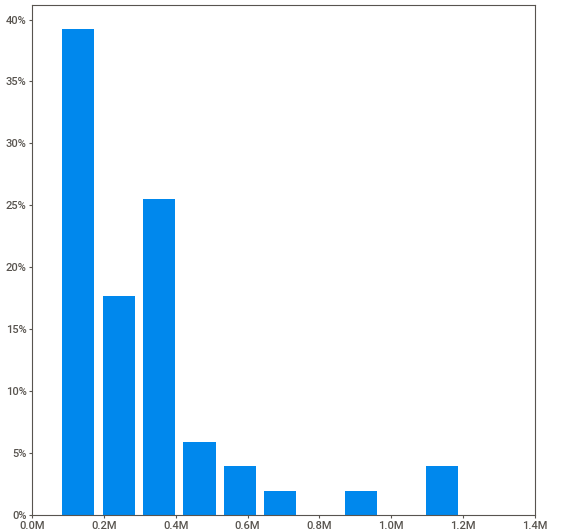
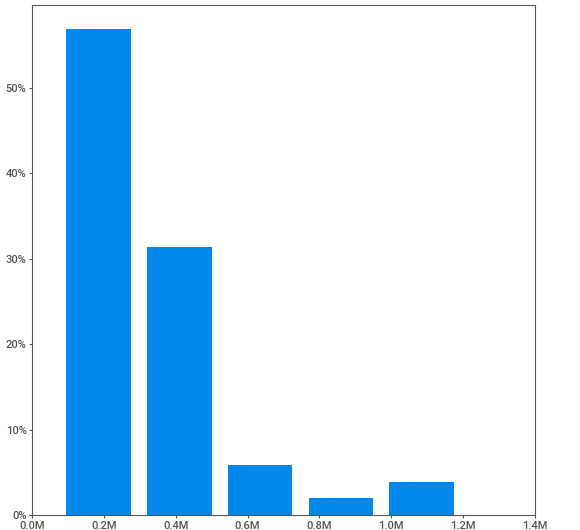
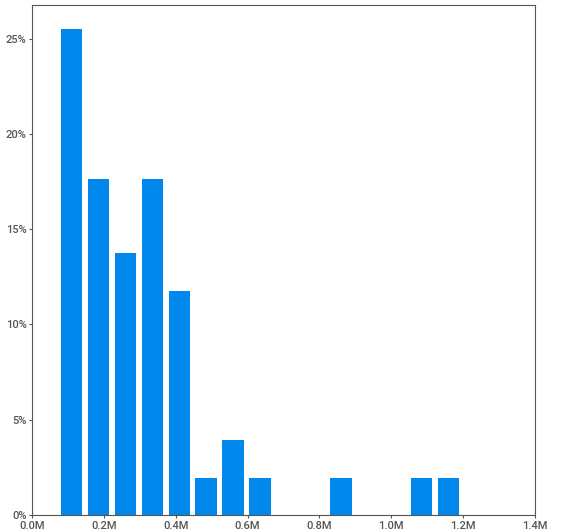
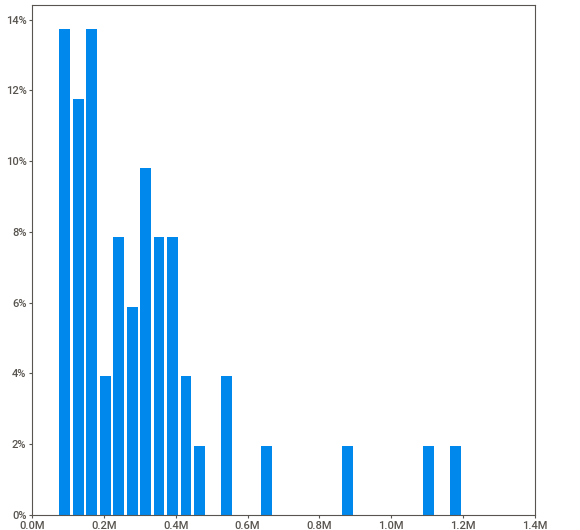
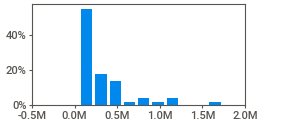
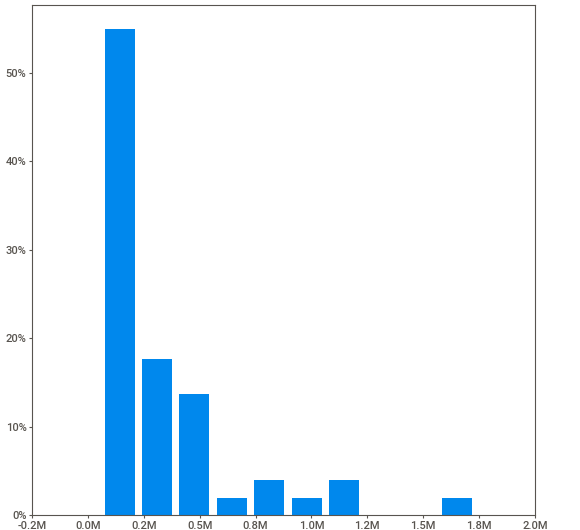
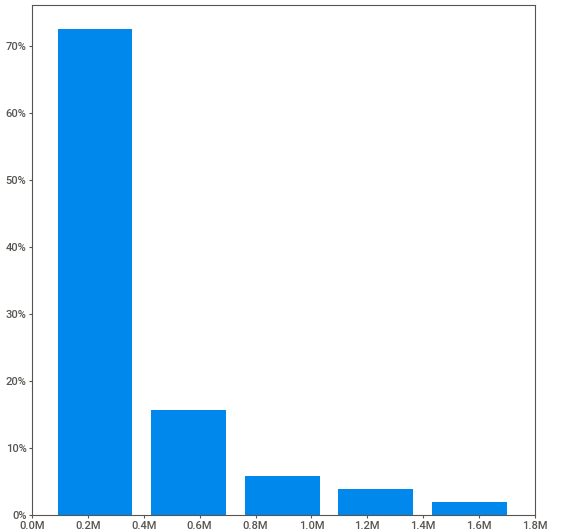
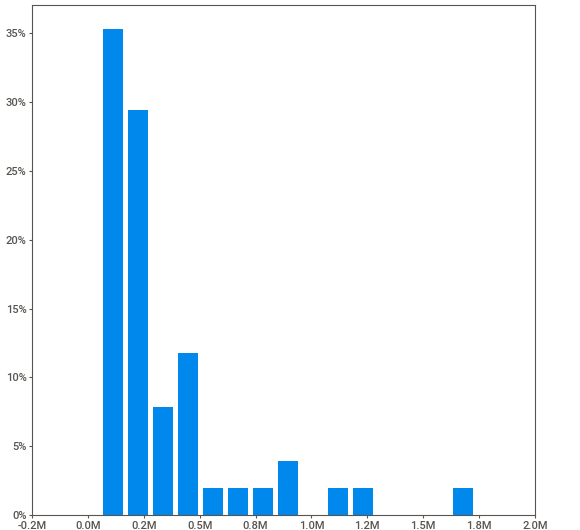
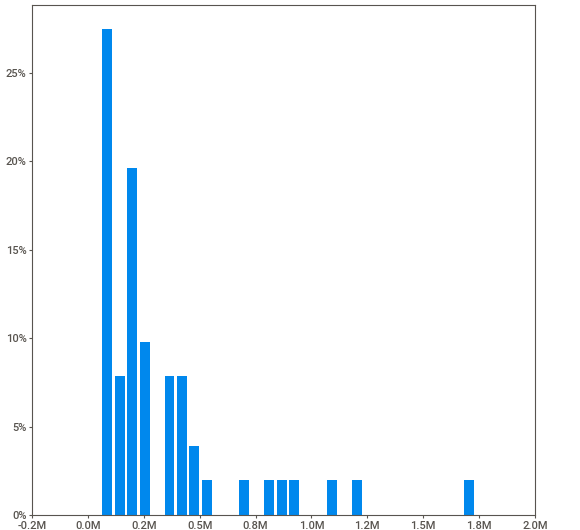
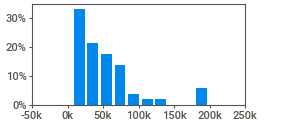
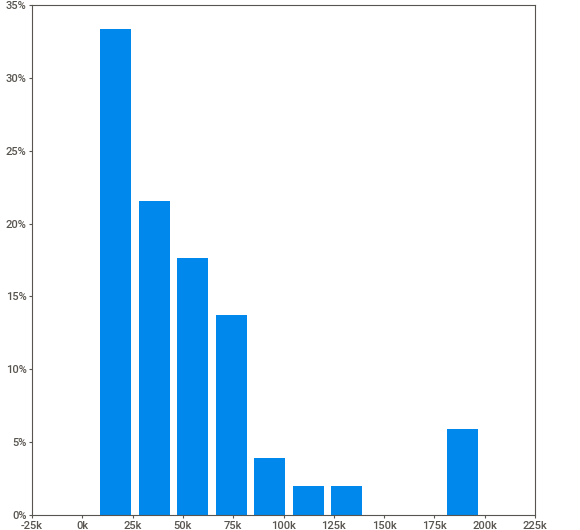
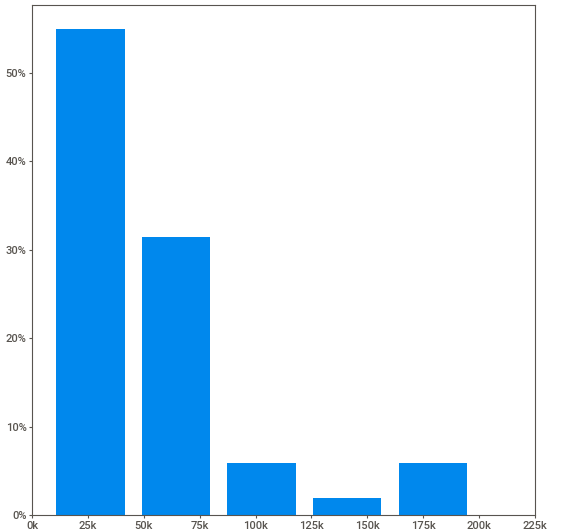
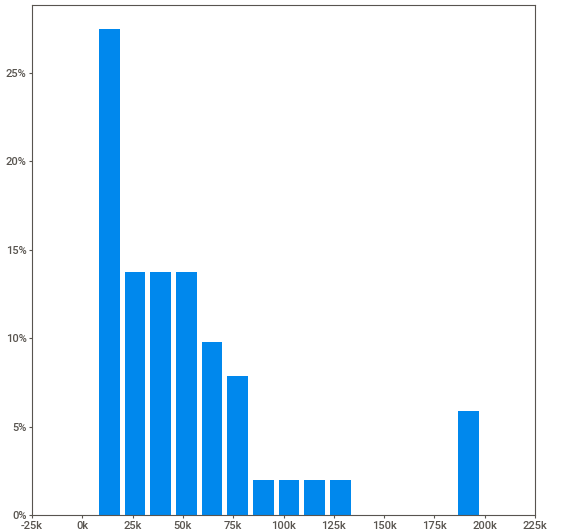
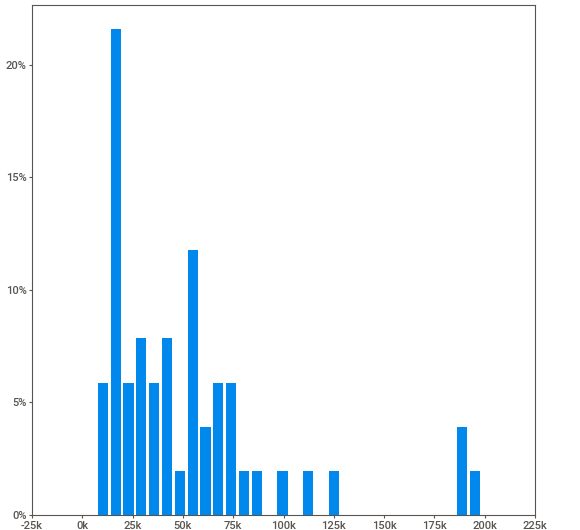
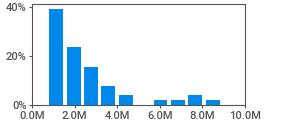
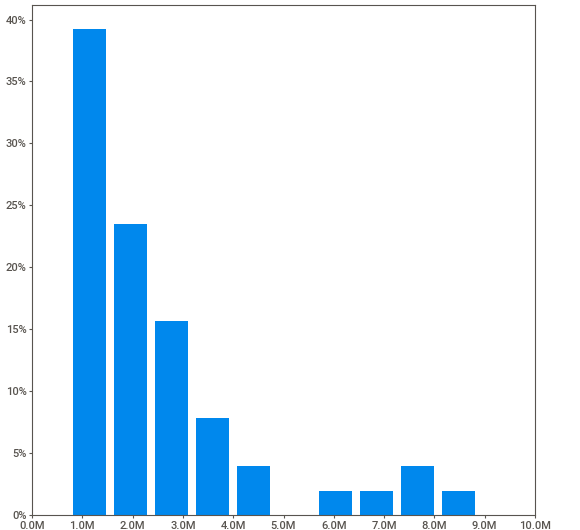
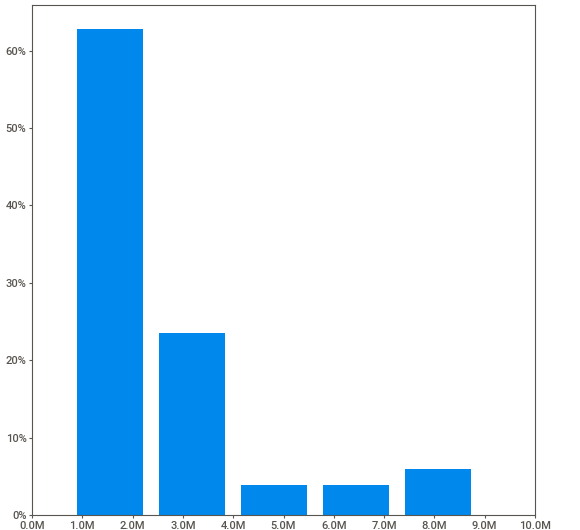
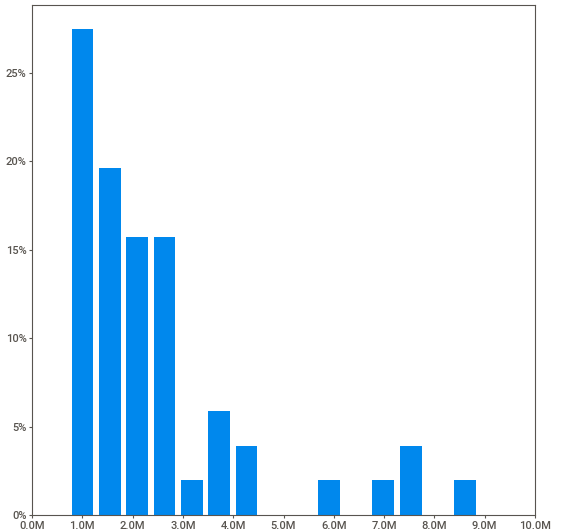
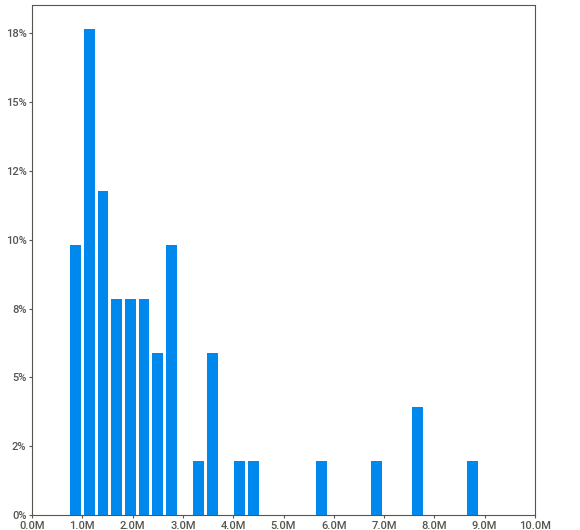
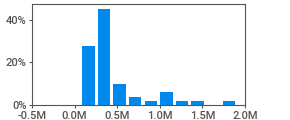
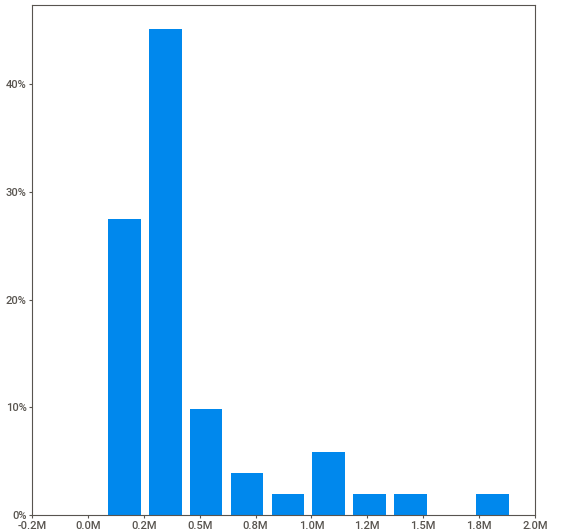
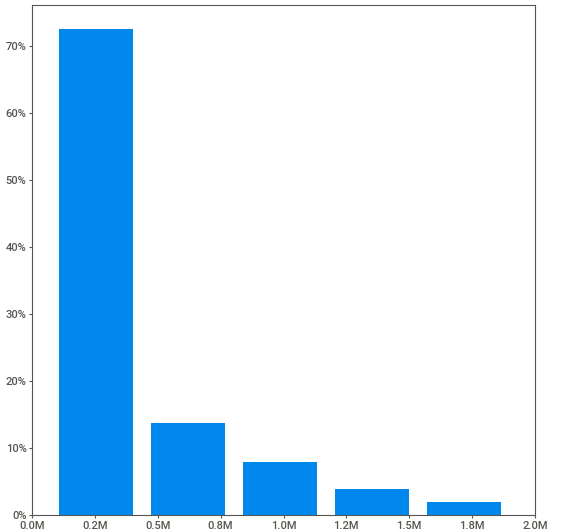
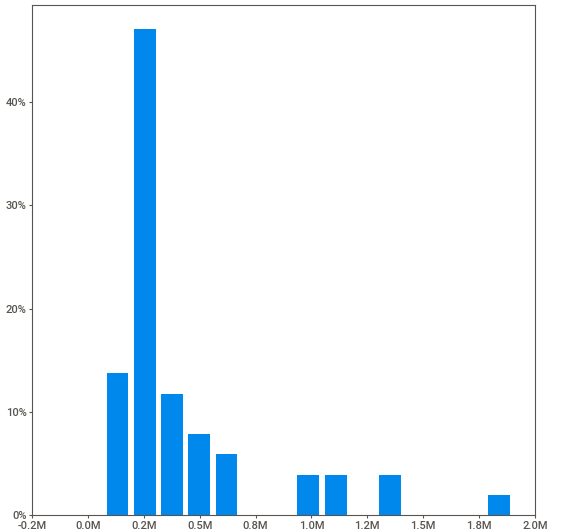
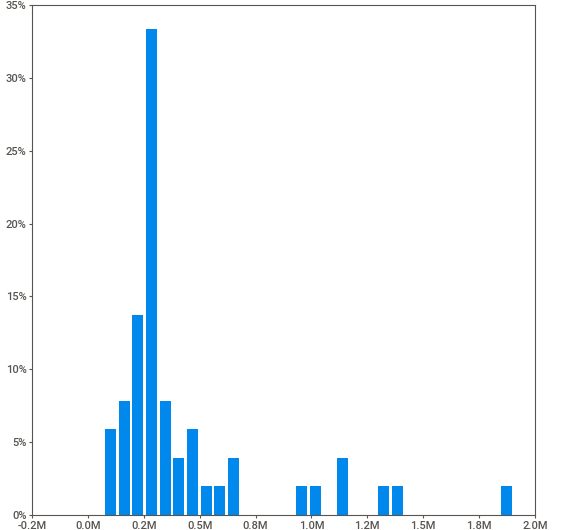
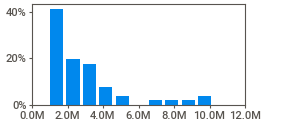
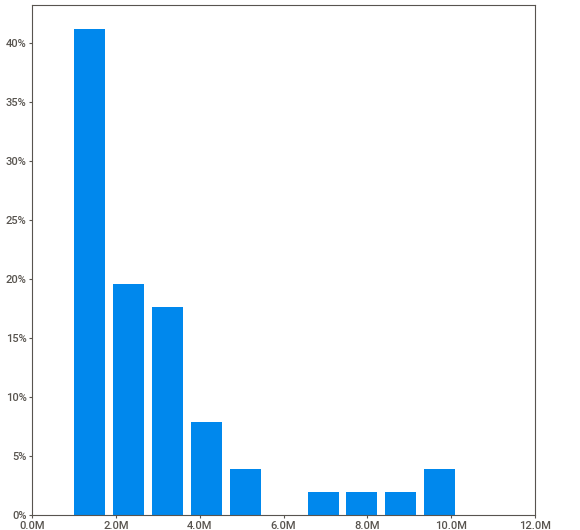
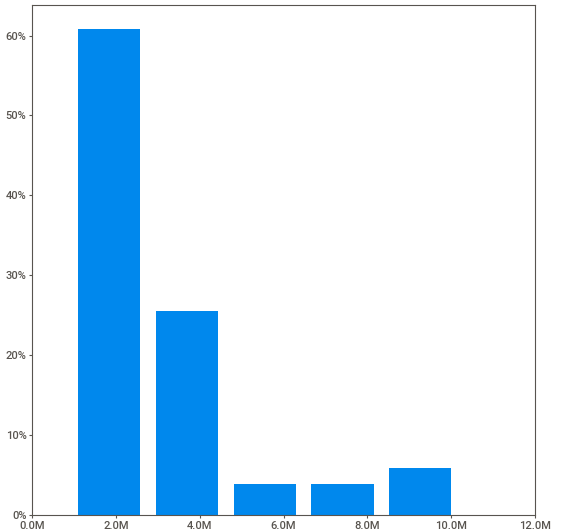
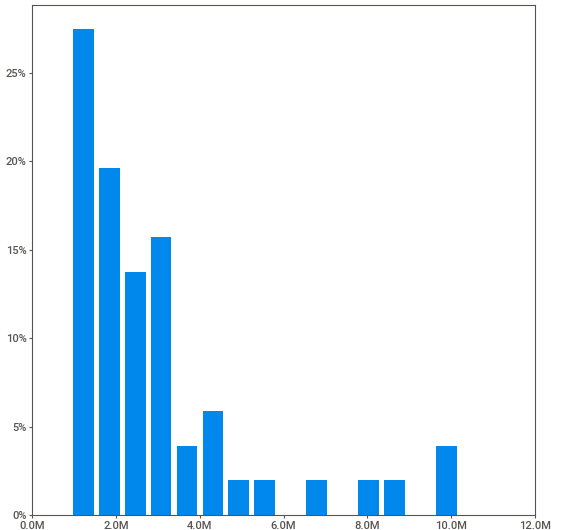
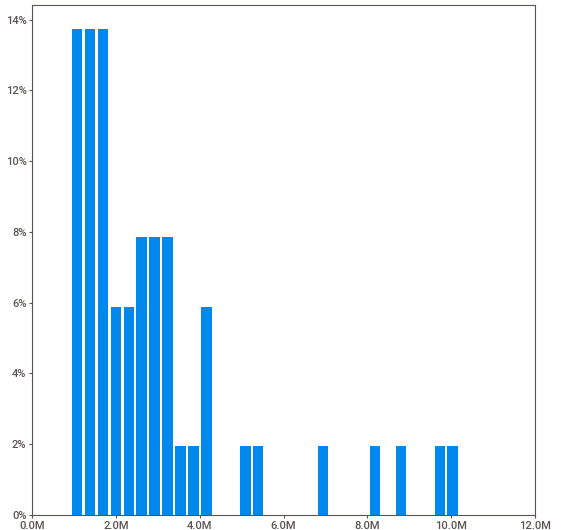
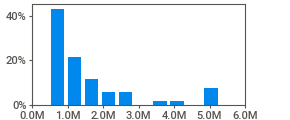
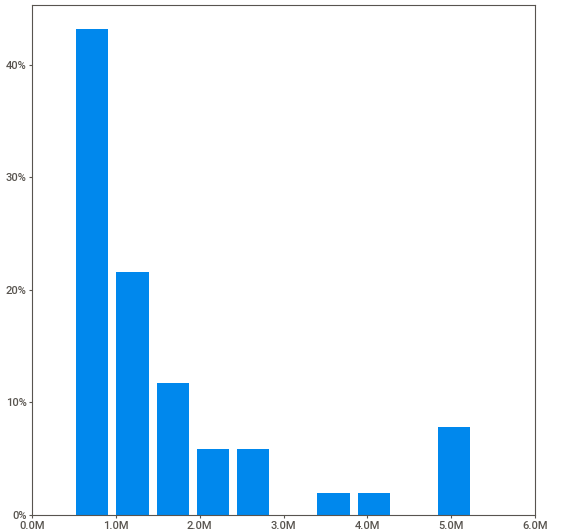
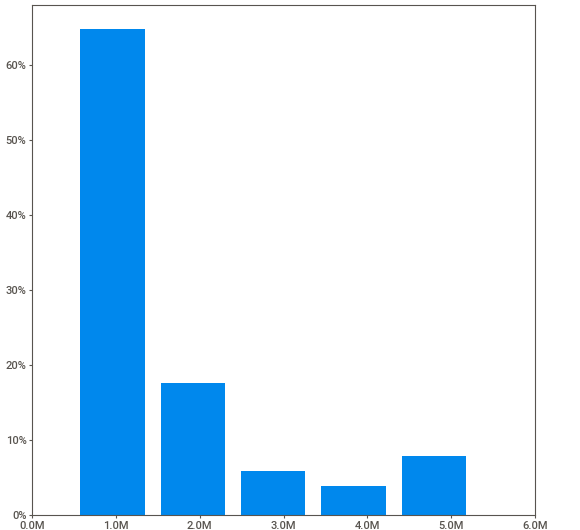
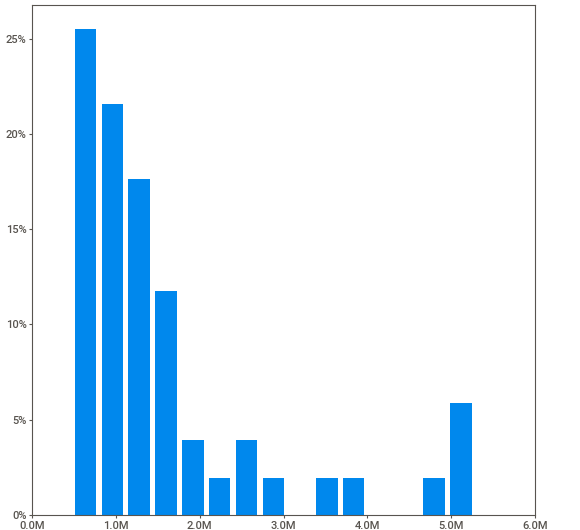
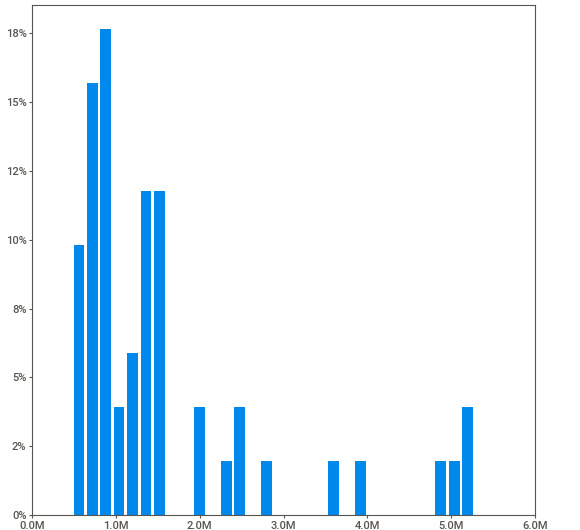
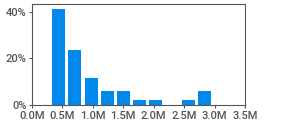
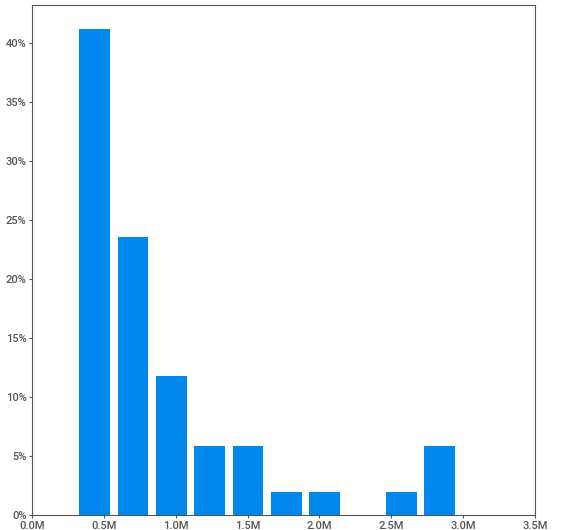
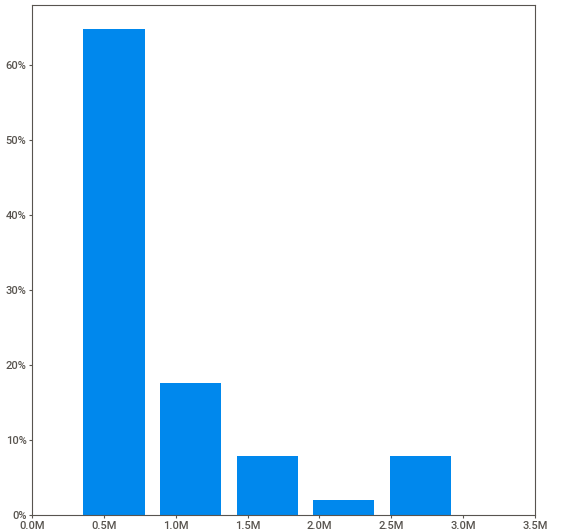
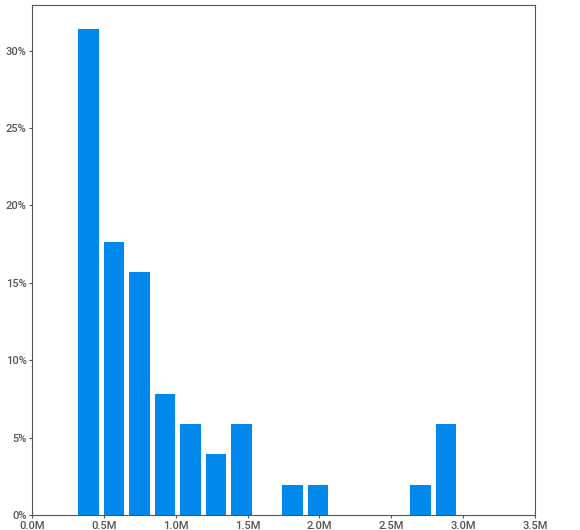
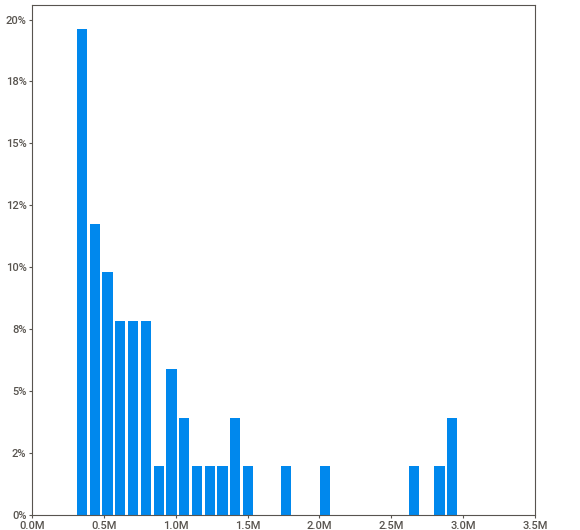
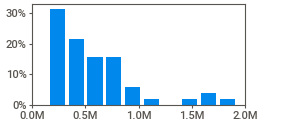
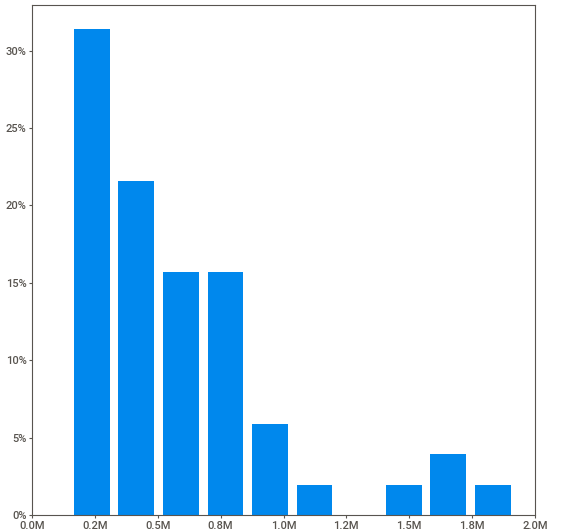
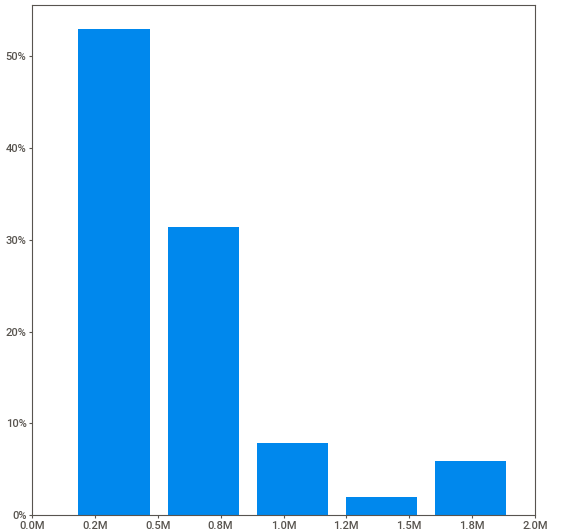
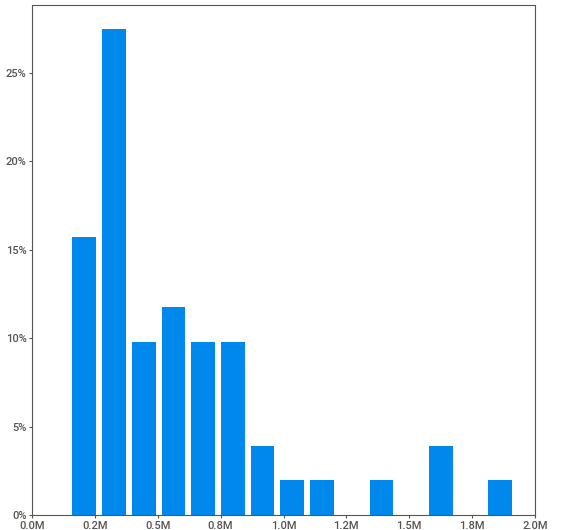
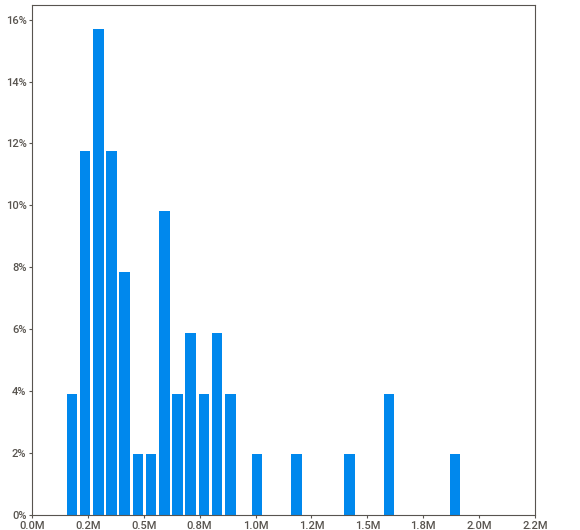
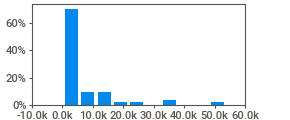
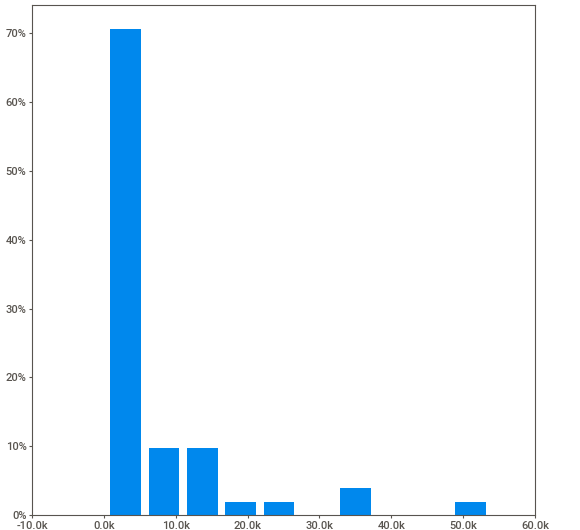
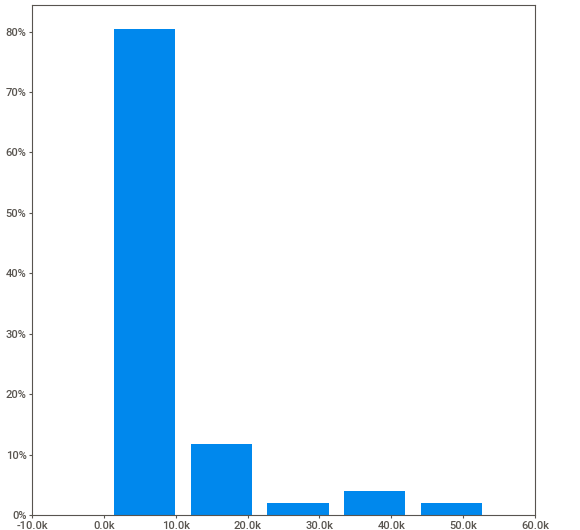
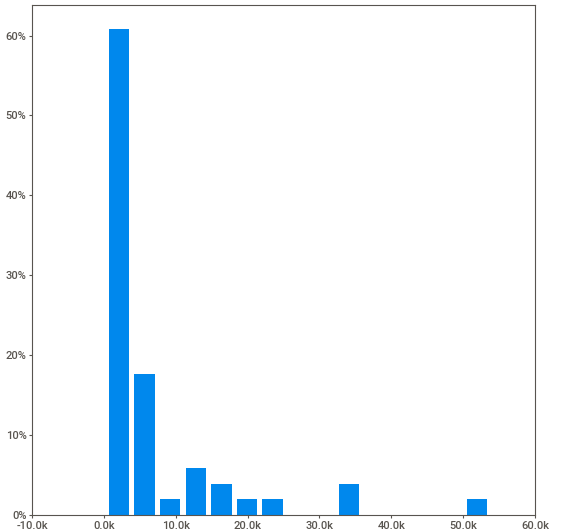
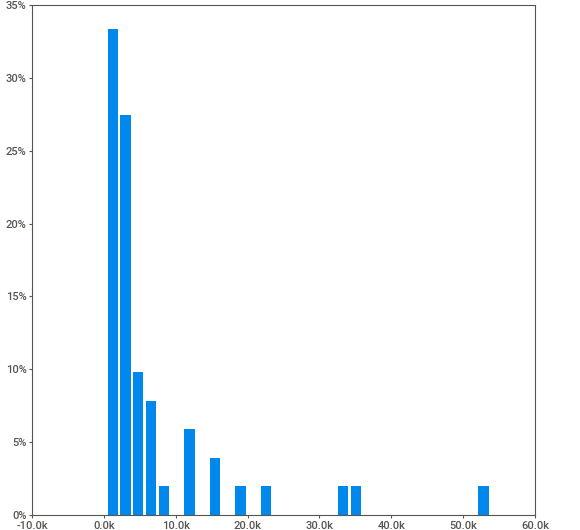
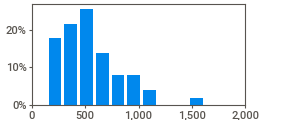
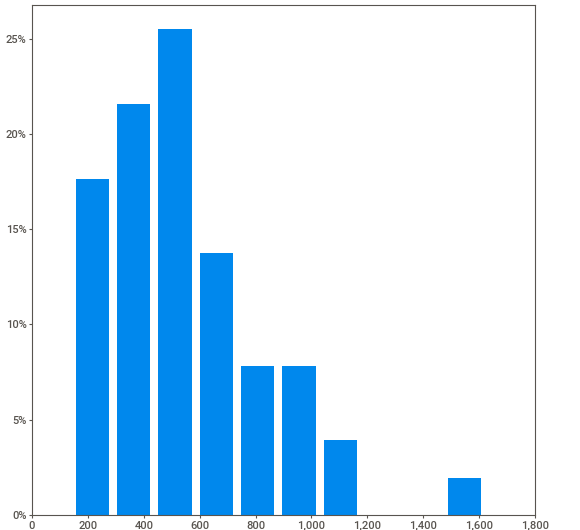
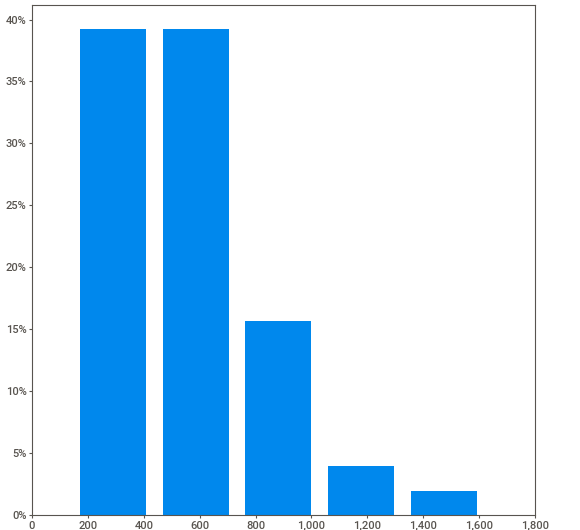
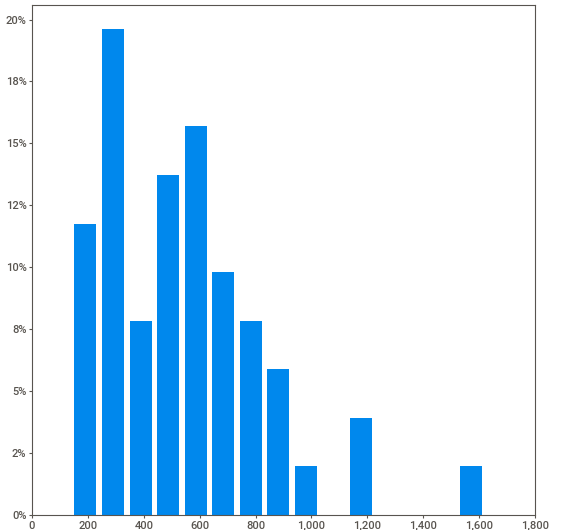
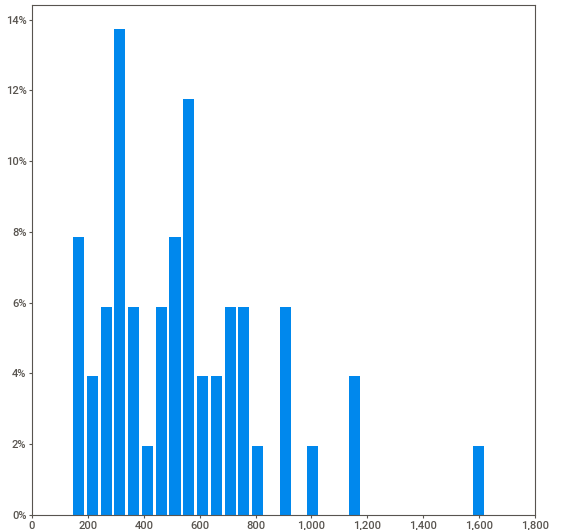
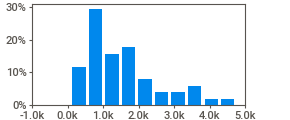
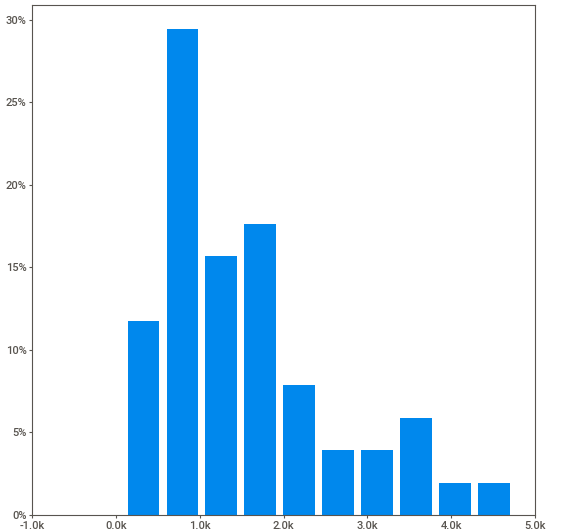
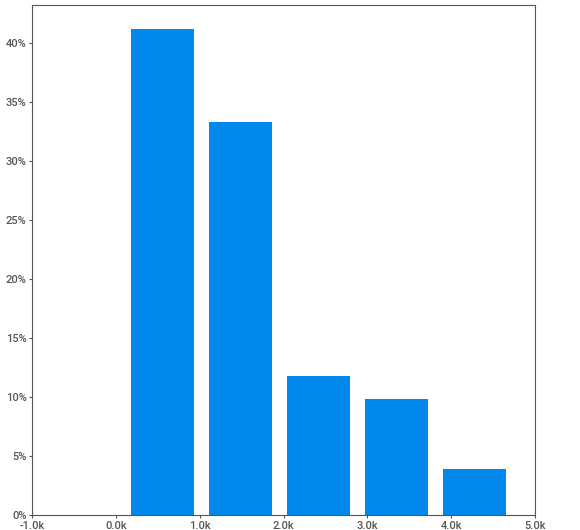
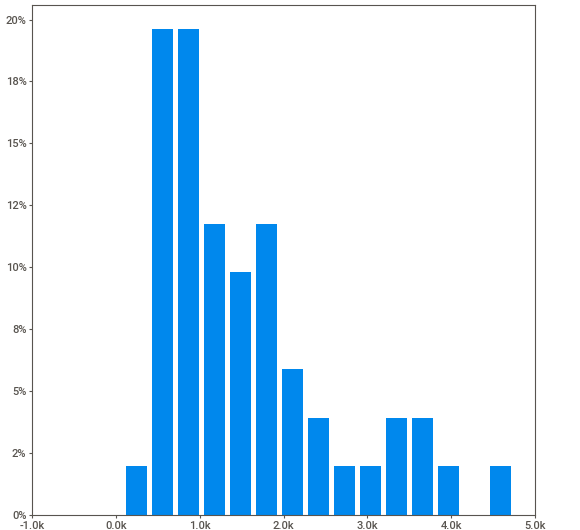
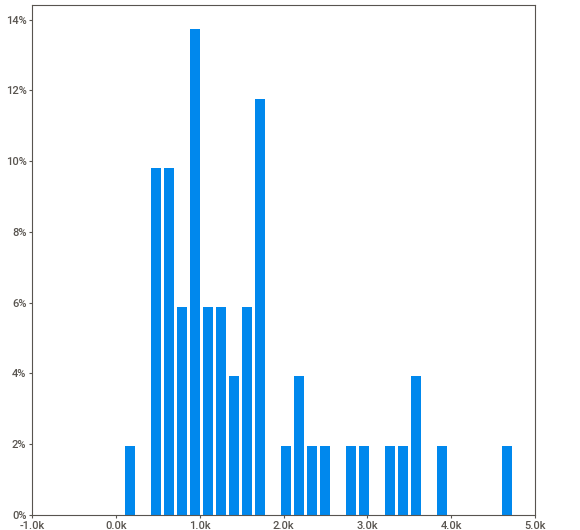
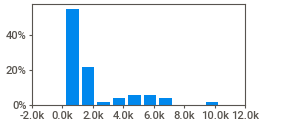
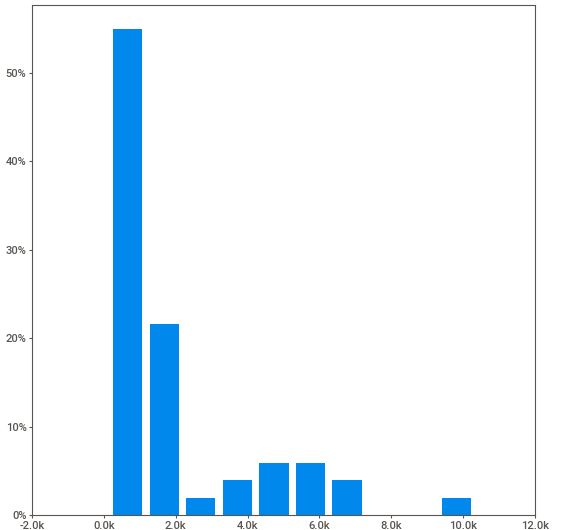
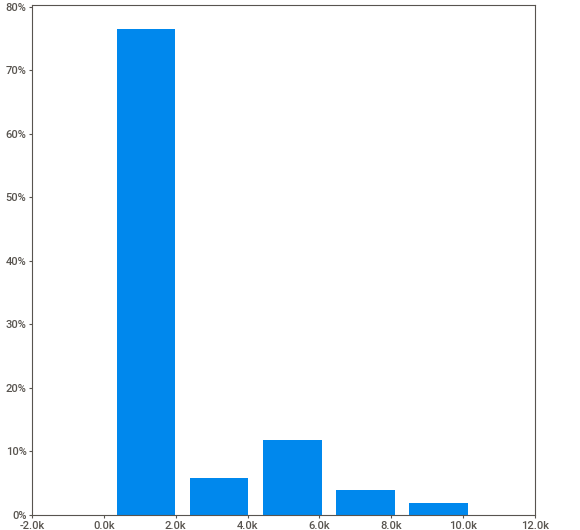
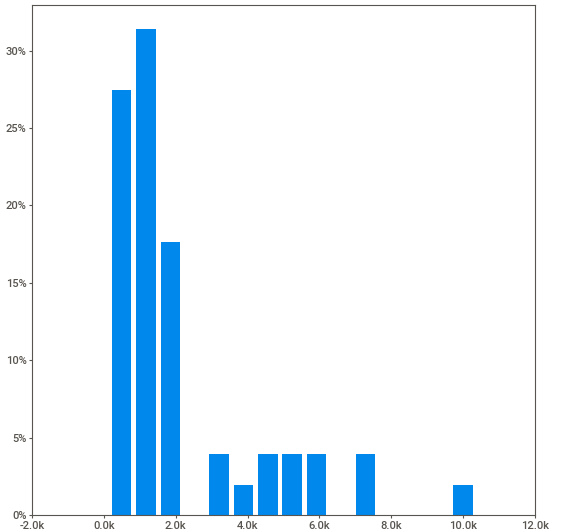
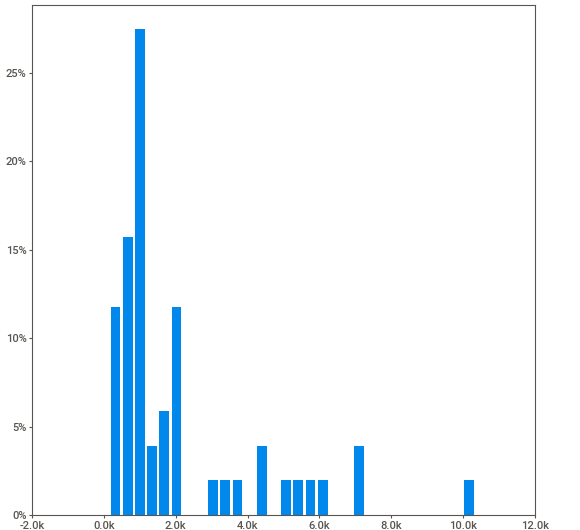
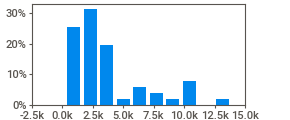
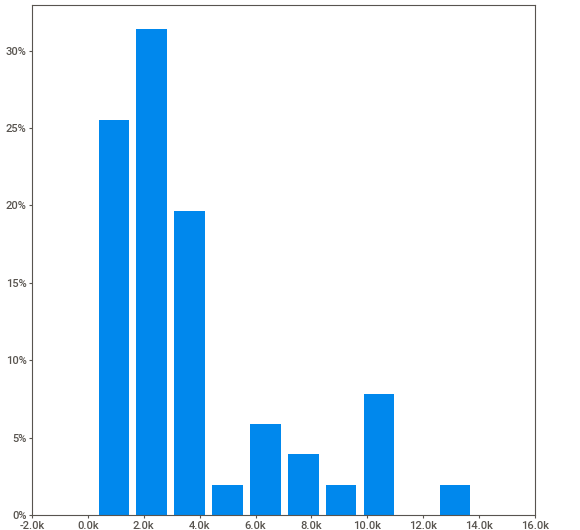
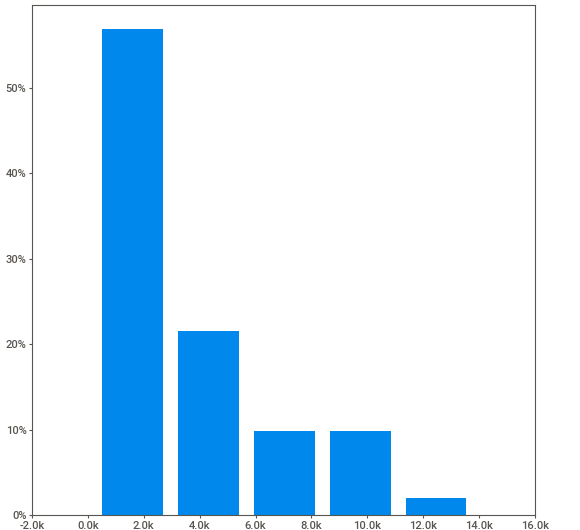
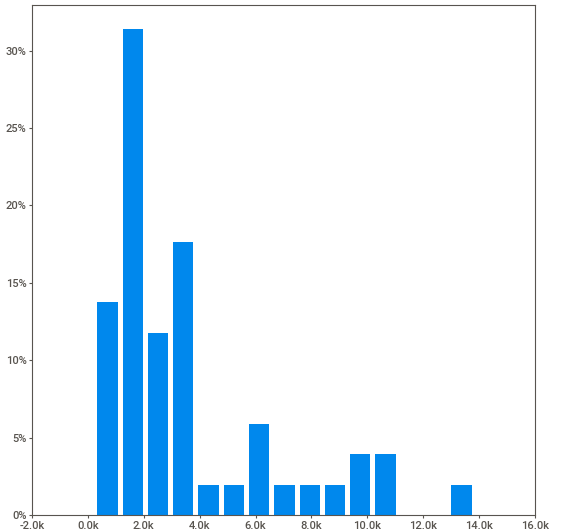
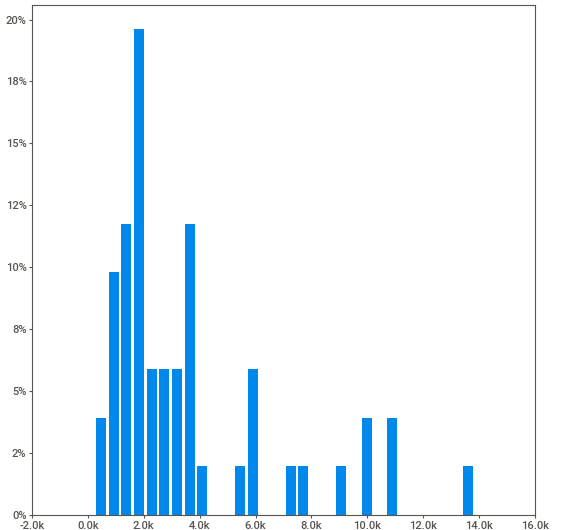
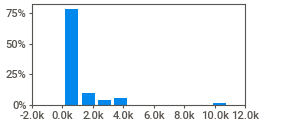
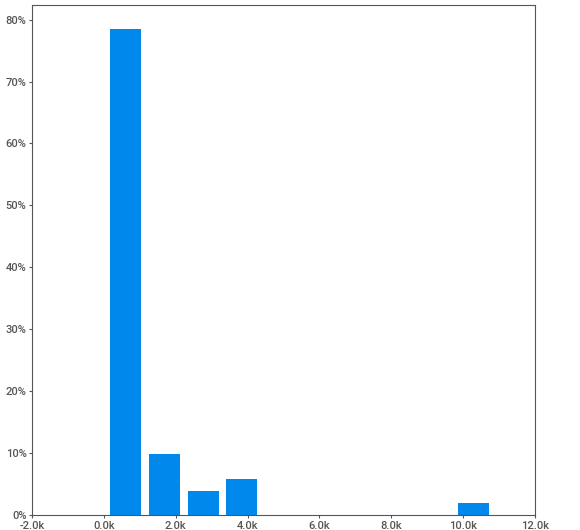
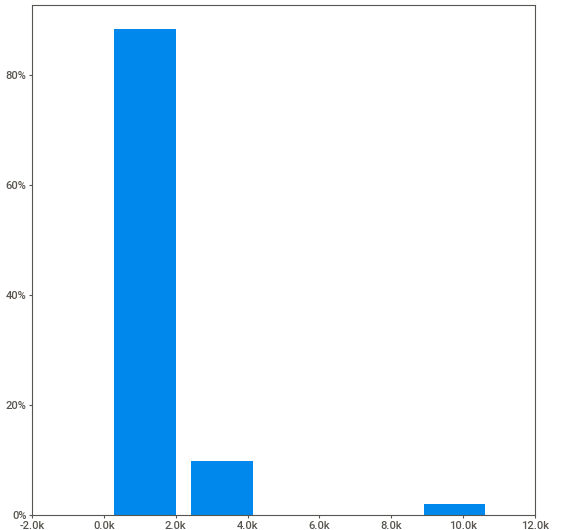
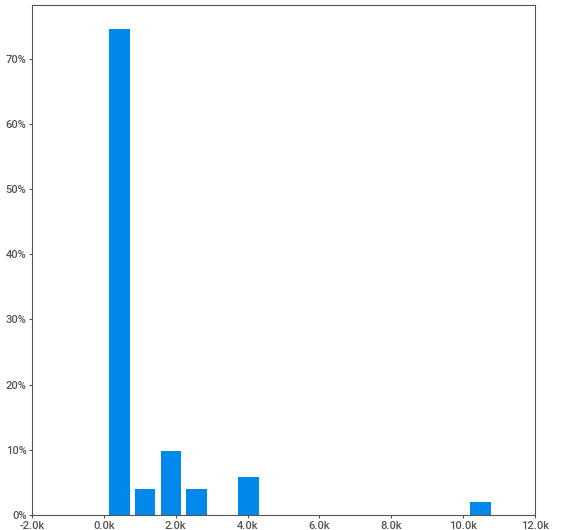
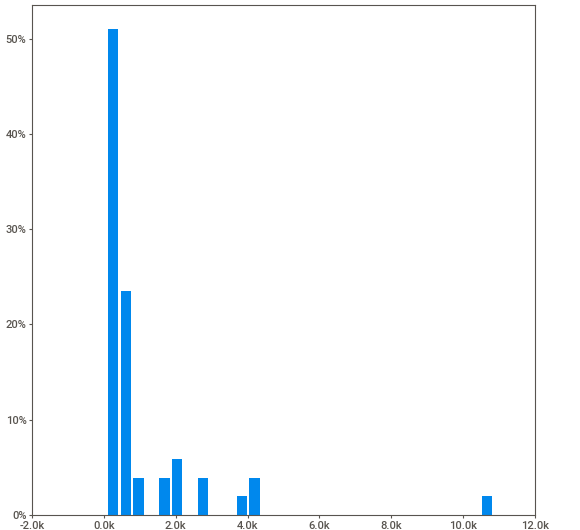
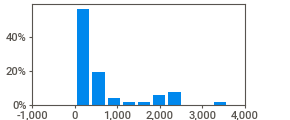
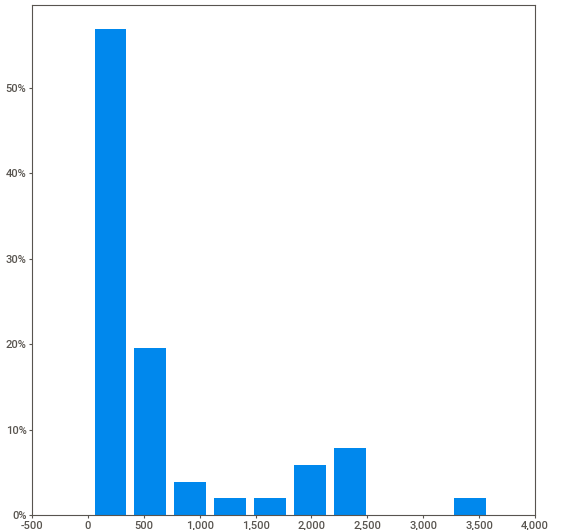
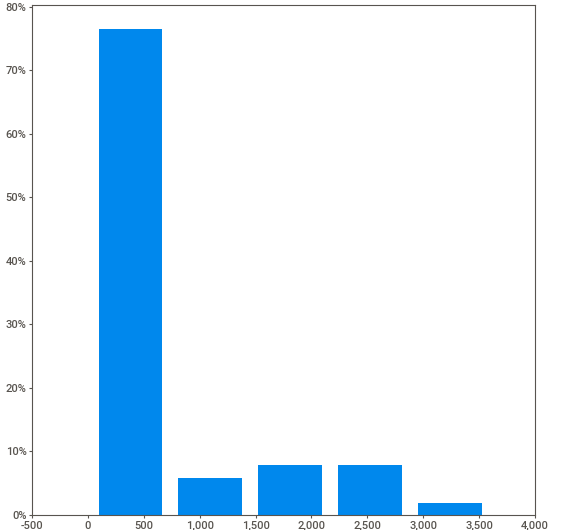
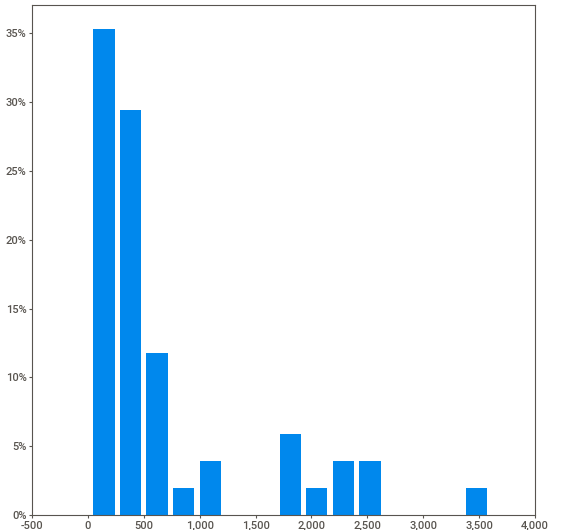
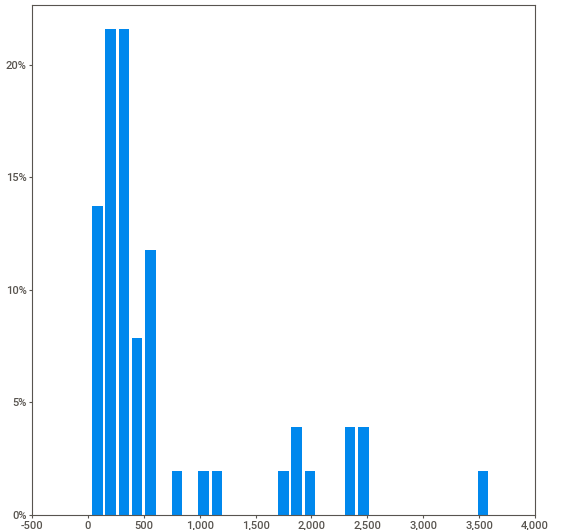
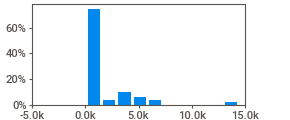
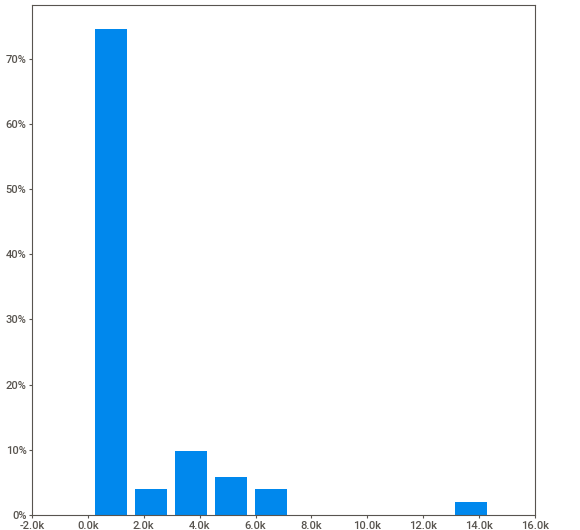
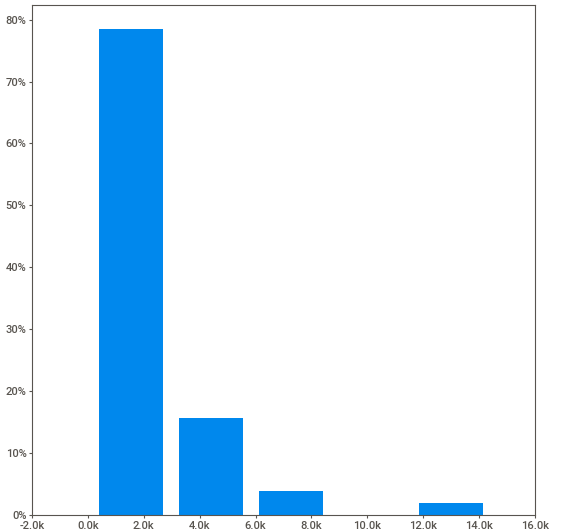
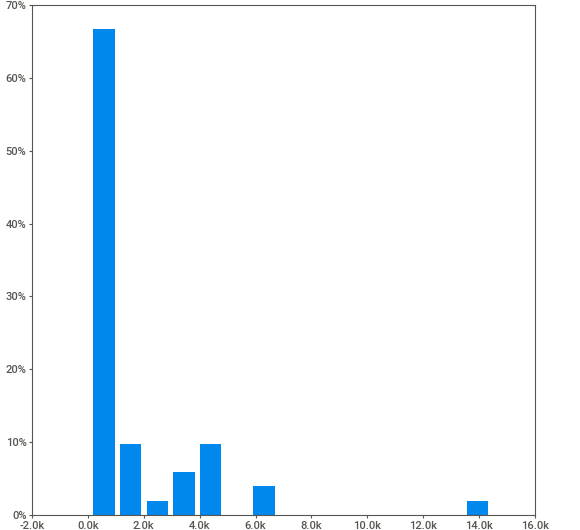
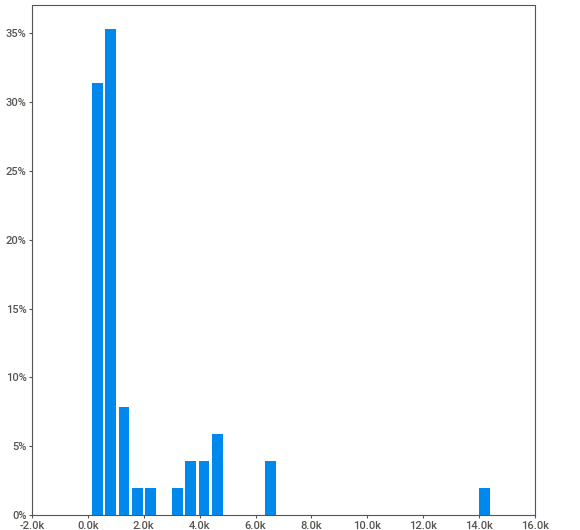
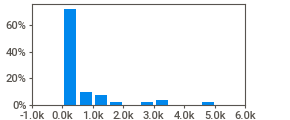
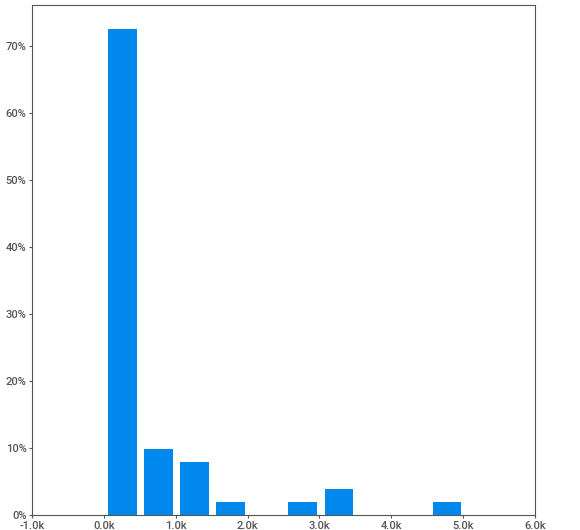
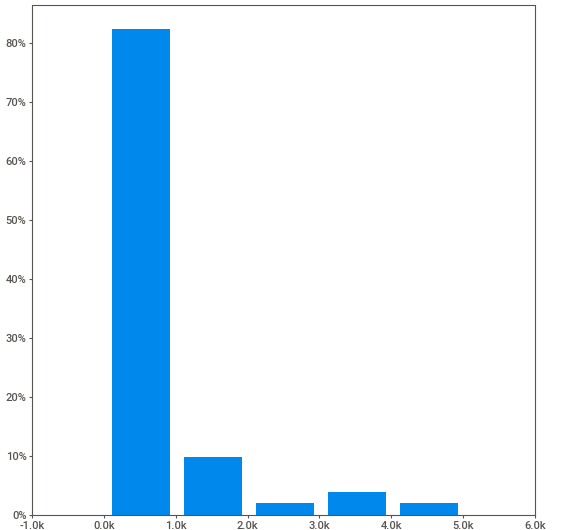
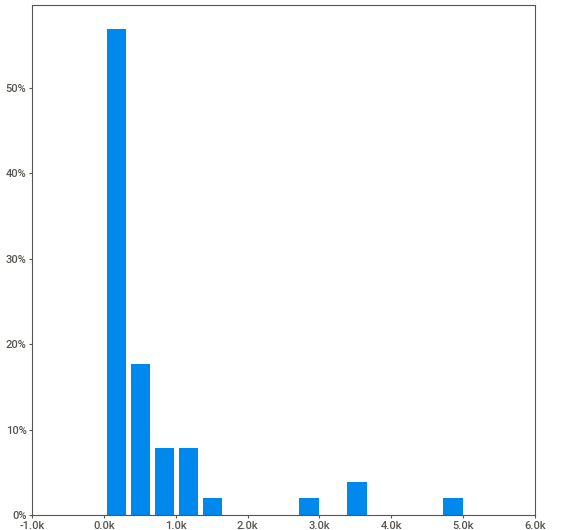
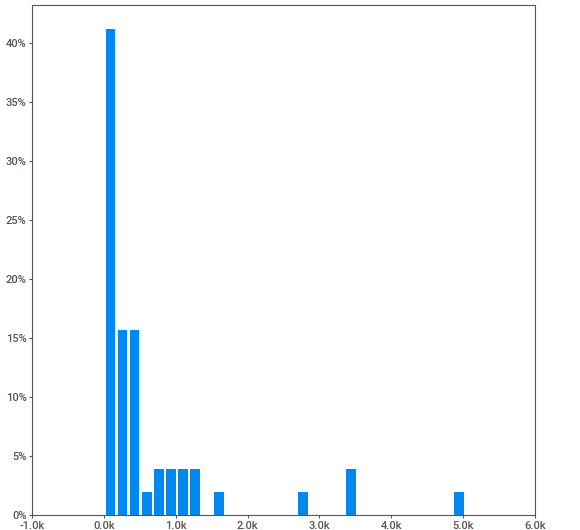
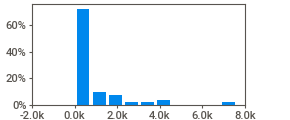
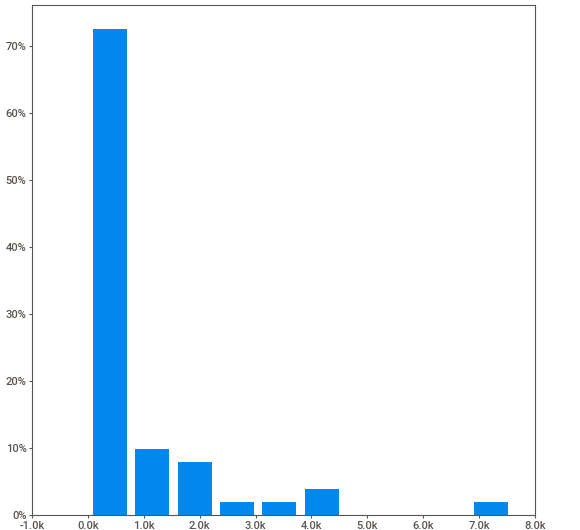
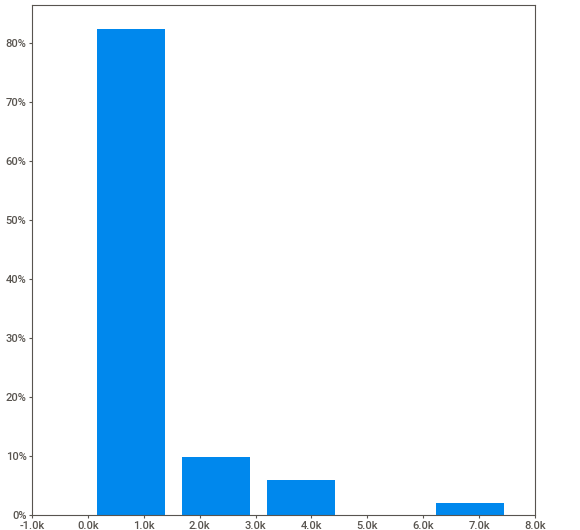
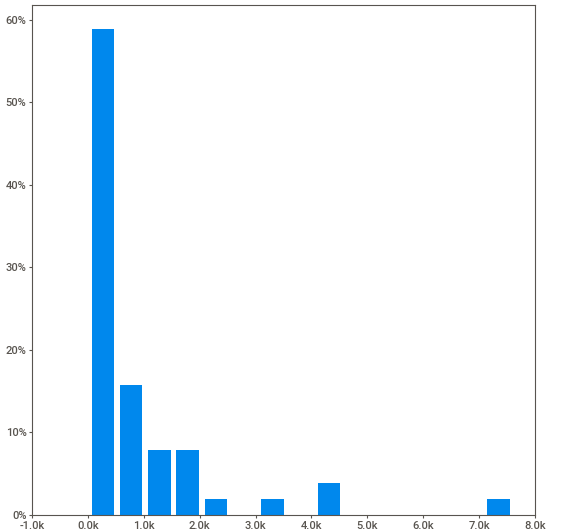
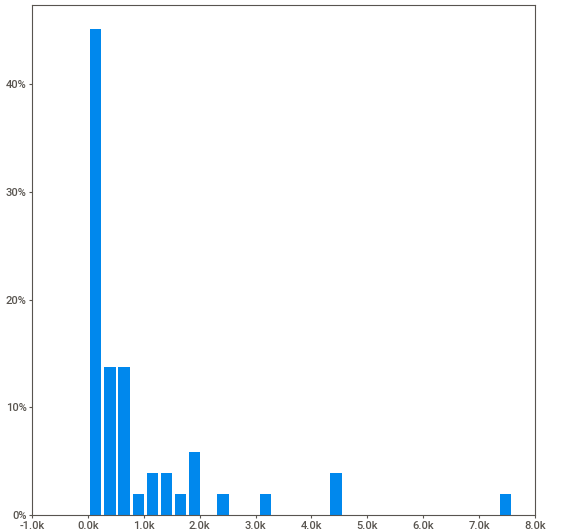
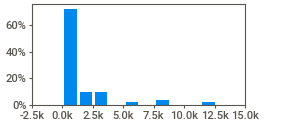
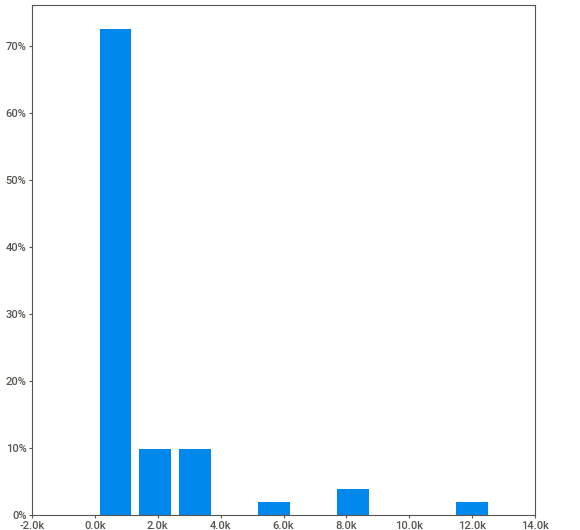
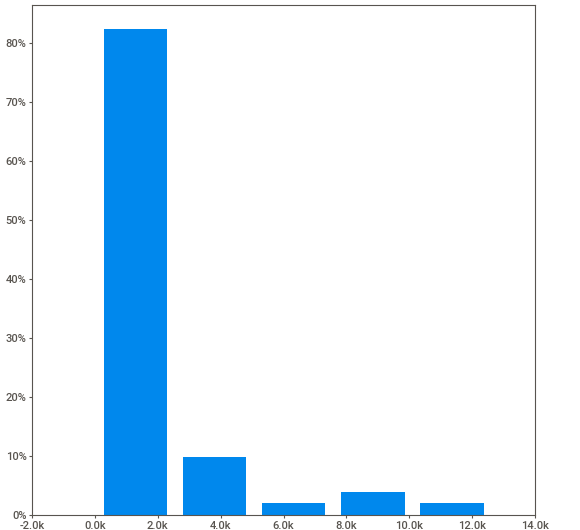
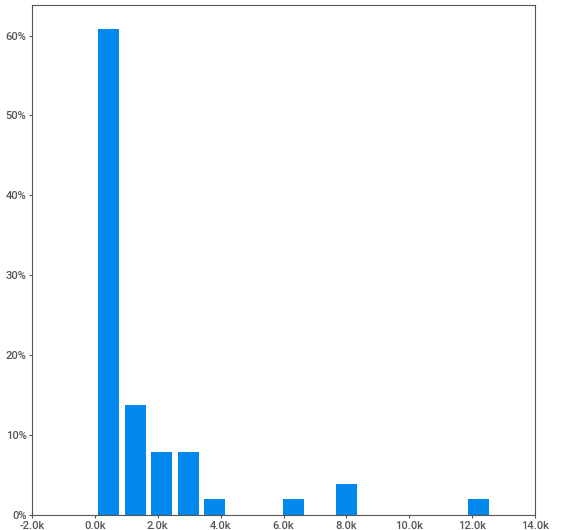
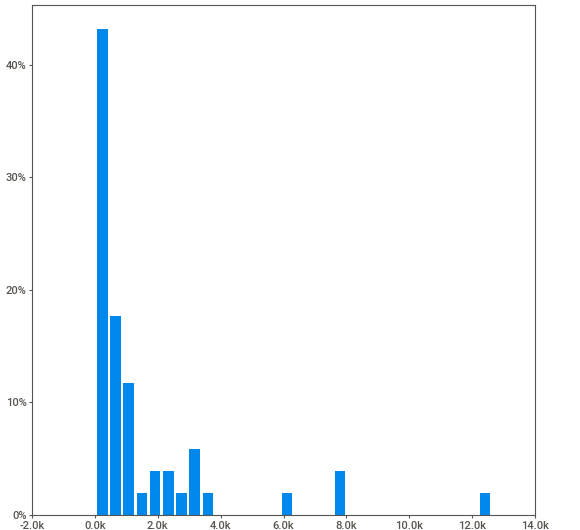
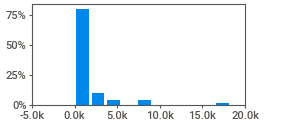
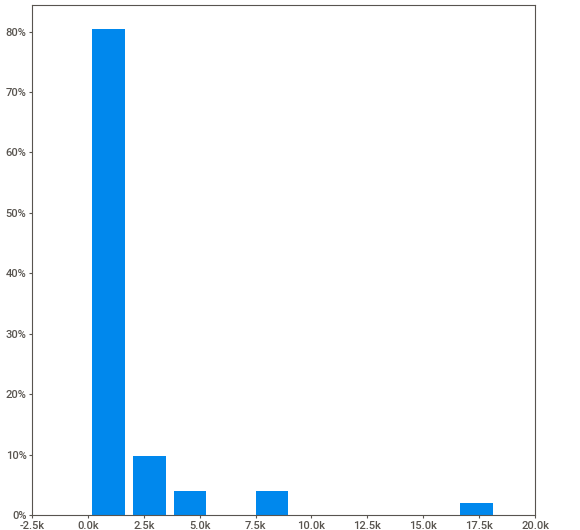
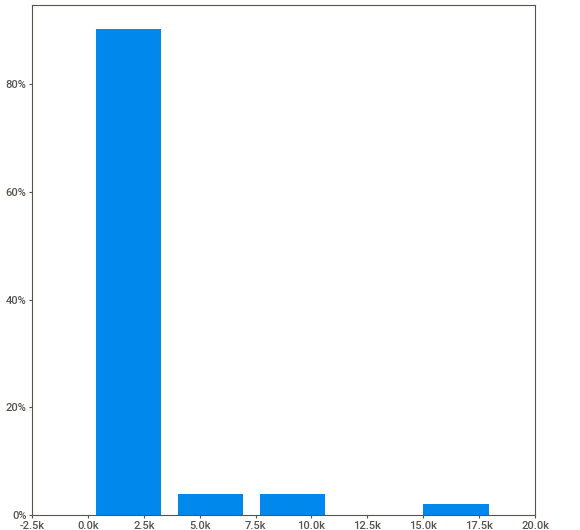
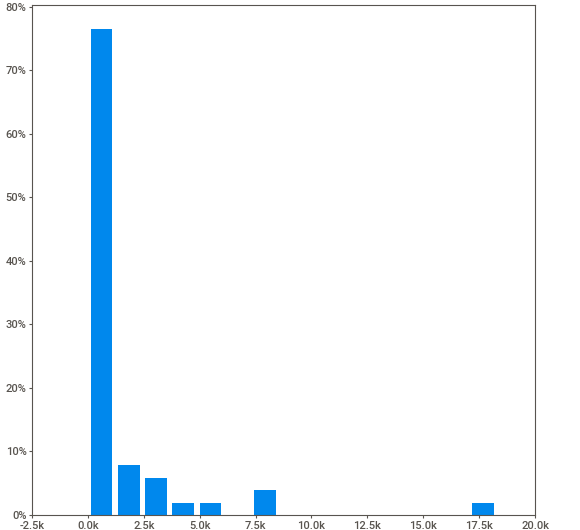
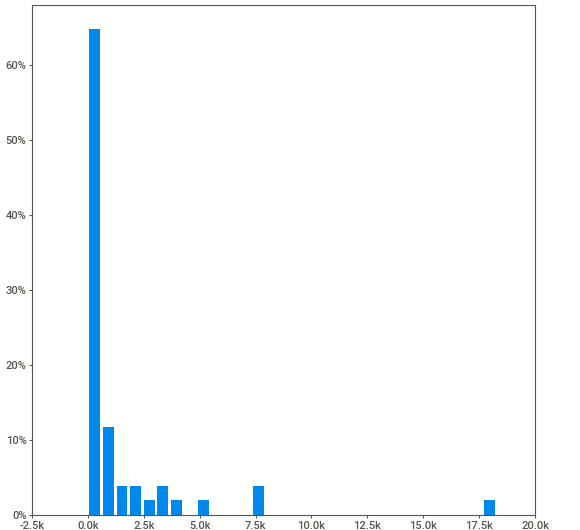
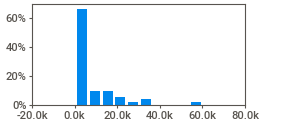
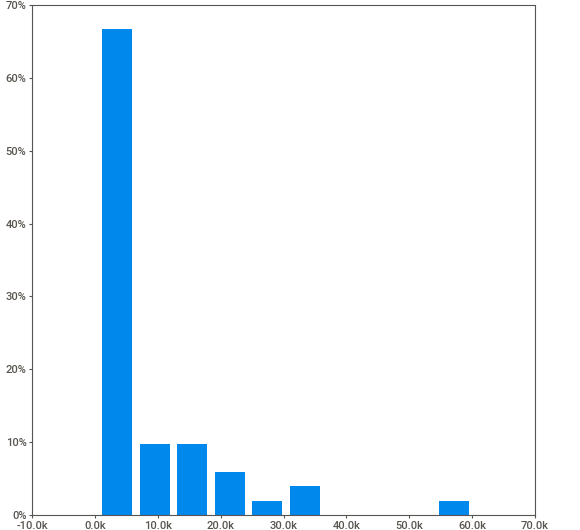
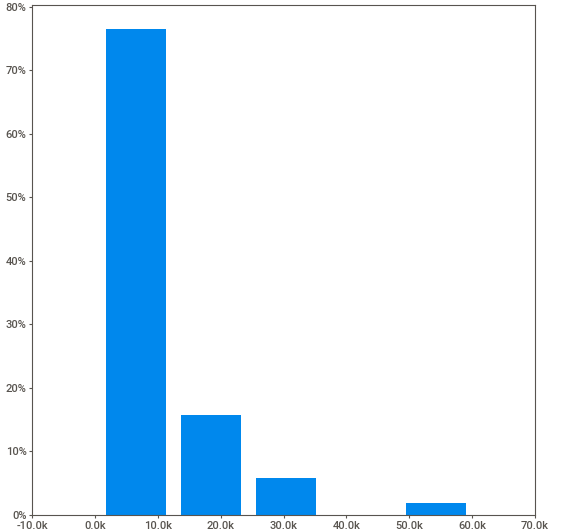
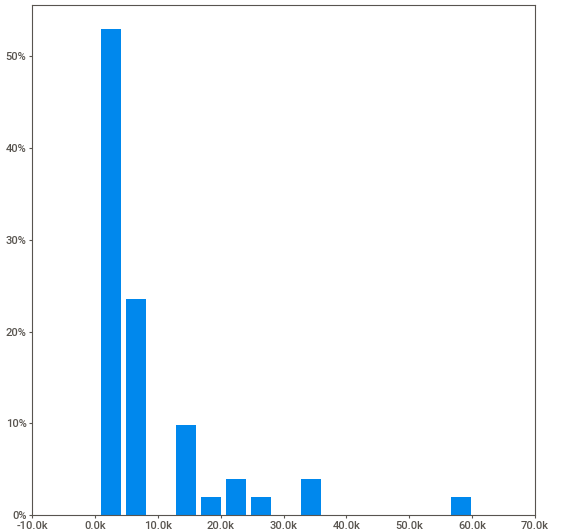
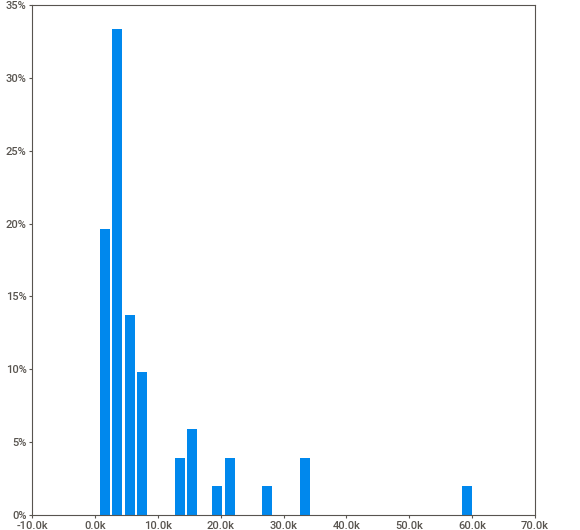
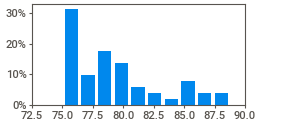
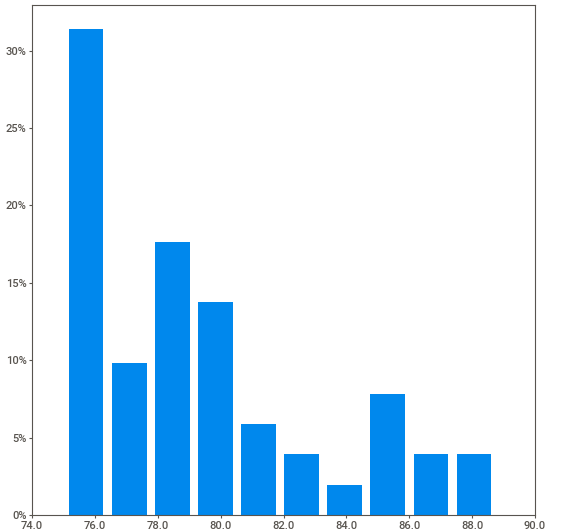
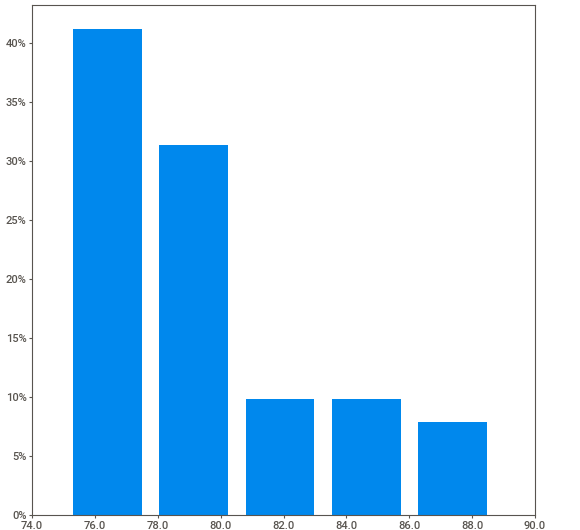
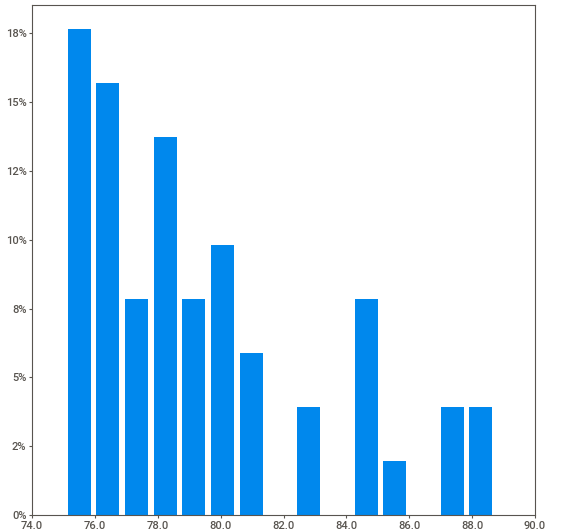
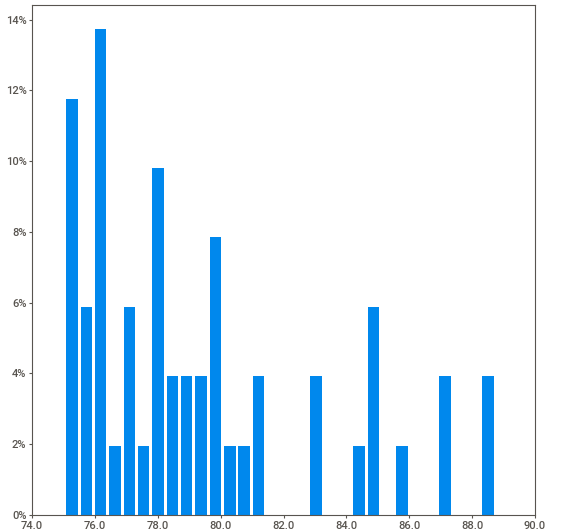
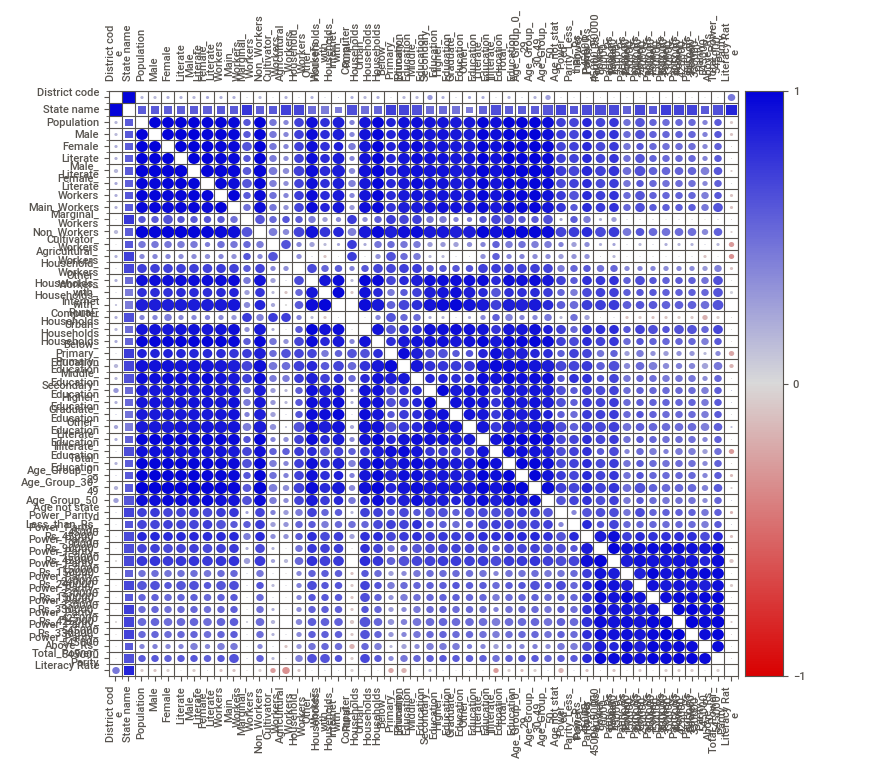
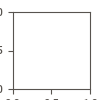

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(filtered_records)
analyze_report.show_notebook()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Select relevant features for clustering
X = filtered_records[['Age_Group_0_29', 'Age_Group_30_49', 'Total_Power_Parity']]

# Encode categorical variable 'State name'
X = pd.get_dummies(filtered_records['State name']).join(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # You can adjust the number of clusters
filtered_records['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze and interpret the clusters
cluster_summary = filtered_records.groupby('cluster').mean()

# Visualize the clusters or cluster centers if needed
print(cluster_summary)


         District code    Population          Male        Female  \
cluster                                                            
0           618.833333  2.890005e+06  1.444599e+06  1.445406e+06   
1           484.366667  2.039224e+06  1.004588e+06  1.034635e+06   
2           514.428571  7.063207e+06  3.748278e+06  3.314929e+06   
3           341.333333  6.534117e+06  3.368663e+06  3.165454e+06   
4            96.000000  2.319369e+06  1.244304e+06  1.075066e+06   
5            55.000000  1.055450e+06  5.806630e+05  4.747870e+05   

             Literate  Male_Literate  Female_Literate       Workers  \
cluster                                                               
0        2.256168e+06   1.183149e+06     1.073019e+06  1.193128e+06   
1        1.653339e+06   8.406871e+05     8.126523e+05  7.617771e+05   
2        5.492783e+06   3.046302e+06     2.446482e+06  2.904627e+06   
3        5.040008e+06   2.710678e+06     2.329330e+06  2.425895e+06   
4        1.795067e+06   1.013

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-120-40c4a8926df9>:21: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.




Based on the provided cluster characteristics, you can define different clusters in your project report as follows:

Cluster 0 - Medium Population, Balanced Gender Distribution, Moderate Literacy Rate:

Districts in this cluster have a moderate population size, with relatively balanced male and female populations.
The literacy rate is moderate, indicating an average level of education within these districts.
Workers are present, with a mix of main and marginal workers contributing to the workforce.
Power parity levels vary but are generally moderate compared to other clusters.
Cluster 1 - Moderate Population, Balanced Gender Distribution, High Literacy Rate:

Districts in this cluster have a moderate population size with a balanced gender distribution.
They exhibit a relatively high literacy rate compared to other clusters, indicating better educational attainment.
Workers are present, with a mix of main and marginal workers contributing to the workforce.
Power parity levels are moderate, indicating a decent level of economic development.
Cluster 2 - High Population, Slightly Male-Dominated, Moderate Literacy Rate:

Districts in this cluster have a high population size, with a slightly higher proportion of males compared to females.
The literacy rate is moderate, indicating a reasonable level of educational attainment.
There is a significant workforce, with both main and marginal workers contributing.
Power parity levels are relatively high compared to other clusters, indicating better economic conditions.
Cluster 3 - High Population, Slightly Male-Dominated, Moderate Literacy Rate:

Districts in this cluster have a high population size, with a slightly higher proportion of males compared to females.
The literacy rate is moderate, indicating a reasonable level of educational attainment.
There is a significant workforce, with both main and marginal workers contributing.
Power parity levels are moderate, indicating moderate economic conditions.
Cluster 4 - Moderate Population, Balanced Gender Distribution, Moderate Literacy Rate:

Districts in this cluster have a moderate population size with a balanced gender distribution.
The literacy rate is moderate, indicating an average level of education within these districts.
Workers are present, with a mix of main and marginal workers contributing to the workforce.
Power parity levels are moderate, indicating moderate economic conditions.
Cluster 5 - Low Population, Slightly Male-Dominated, Low Literacy Rate:

Districts in this cluster have a low population size, with a slightly higher proportion of males compared to females.
The literacy rate is relatively low, indicating lower levels of educational attainment.
There is a smaller workforce compared to other clusters, with both main and marginal workers contributing.
Power parity levels are relatively low, indicating lower economic conditions compared to other clusters.
These descriptions provide insights into the characteristics of each cluster, including population size, gender distribution, literacy rate, workforce composition, and power parity levels. They help in understanding the socioeconomic and demographic profiles of different districts within each cluster.

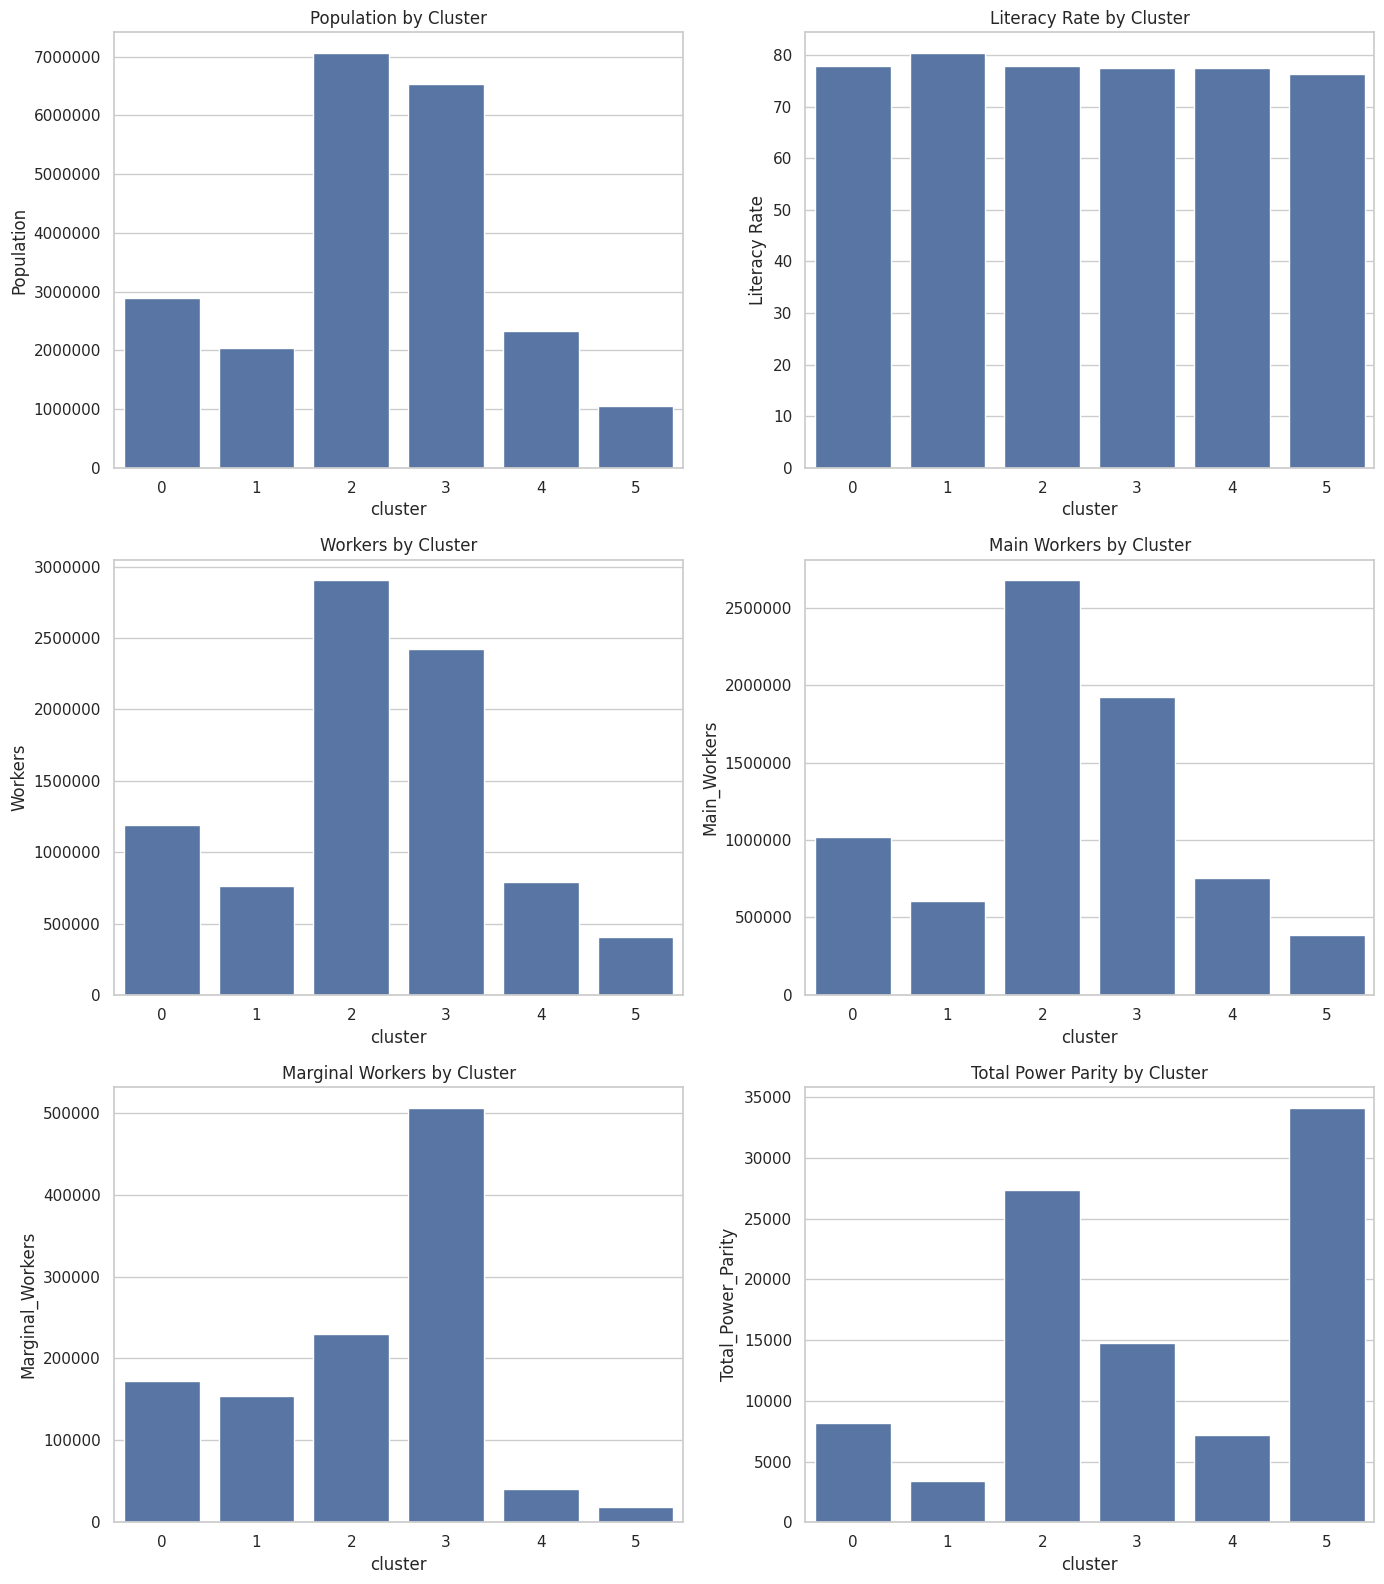

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cluster_summary' is your DataFrame containing the cluster summary statistics

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

# Population
sns.barplot(x=cluster_summary.index, y='Population', data=cluster_summary, ax=axes[0, 0])
axes[0, 0].set_title('Population by Cluster')

# Literacy Rate
sns.barplot(x=cluster_summary.index, y='Literacy Rate', data=cluster_summary, ax=axes[0, 1])
axes[0, 1].set_title('Literacy Rate by Cluster')

# Workers
sns.barplot(x=cluster_summary.index, y='Workers', data=cluster_summary, ax=axes[1, 0])
axes[1, 0].set_title('Workers by Cluster')

# Main Workers
sns.barplot(x=cluster_summary.index, y='Main_Workers', data=cluster_summary, ax=axes[1, 1])
axes[1, 1].set_title('Main Workers by Cluster')

# Marginal Workers
sns.barplot(x=cluster_summary.index, y='Marginal_Workers', data=cluster_summary, ax=axes[2, 0])
axes[2, 0].set_title('Marginal Workers by Cluster')

# Total Power Parity
sns.barplot(x=cluster_summary.index, y='Total_Power_Parity', data=cluster_summary, ax=axes[2, 1])
axes[2, 1].set_title('Total Power Parity by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()


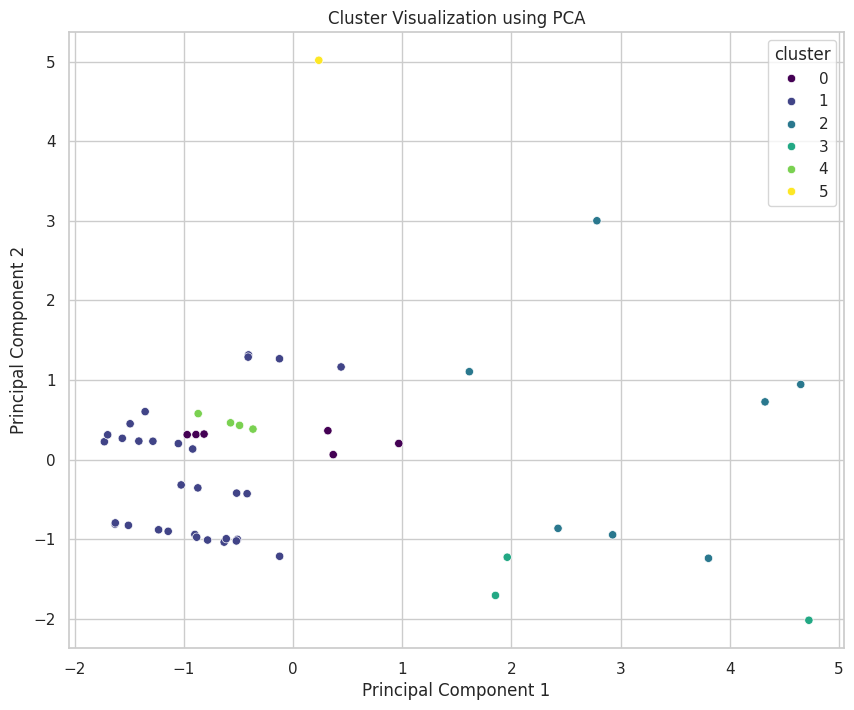

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_scaled' is your scaled feature matrix
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Add cluster labels to the DataFrame
filtered_records['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=filtered_records['cluster'], palette='viridis', legend='full')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


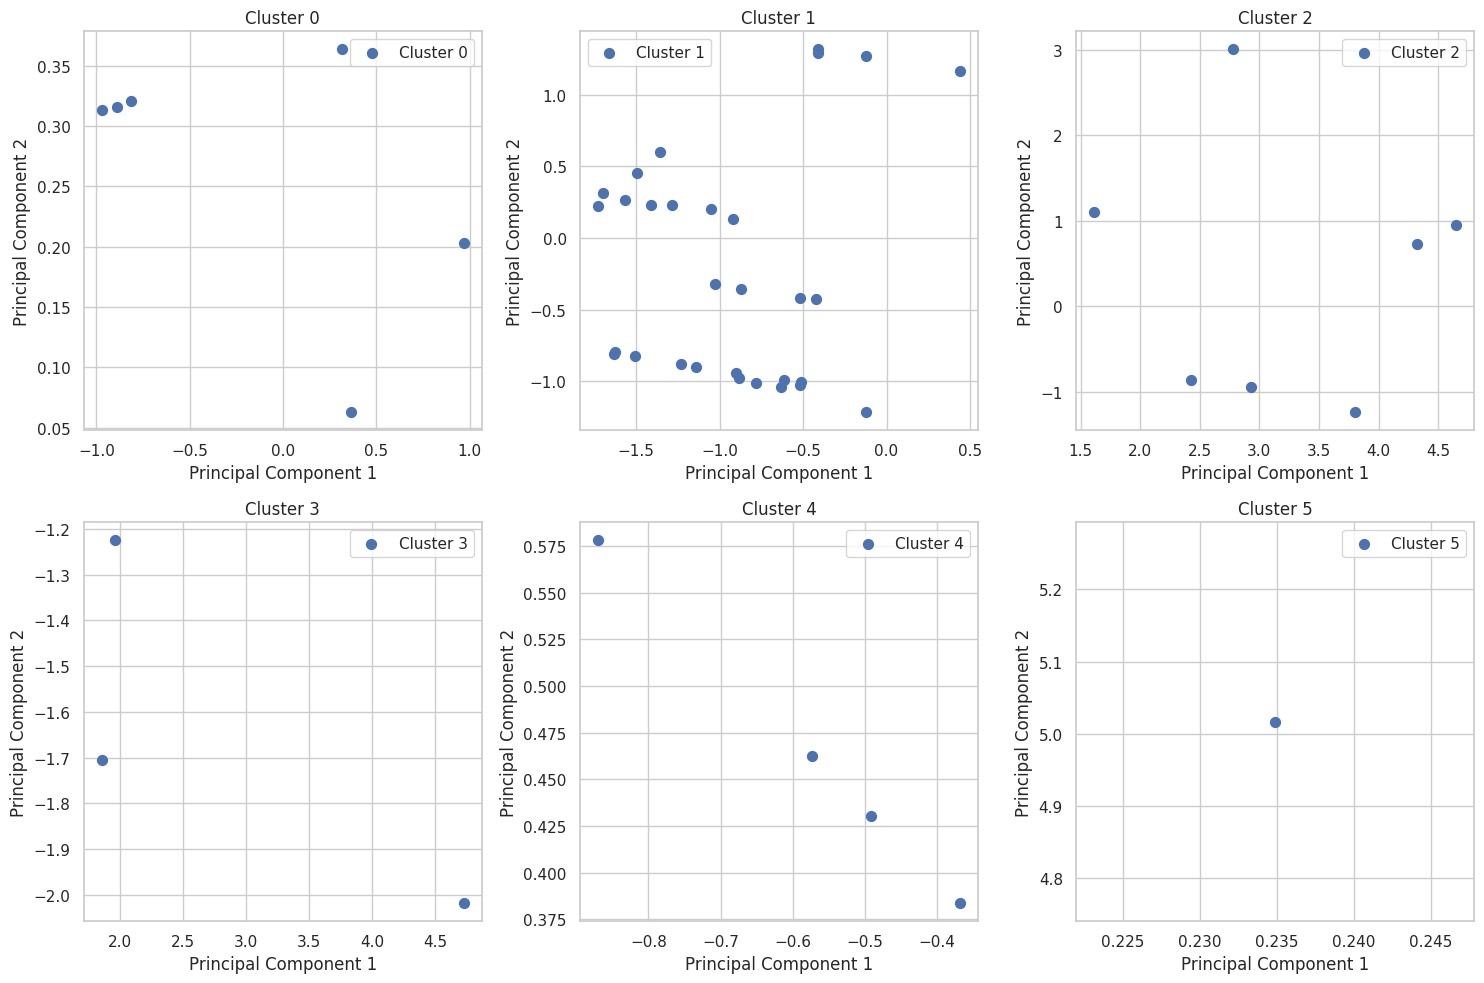

In [ ]:
# Define the number of clusters
num_clusters = len(set(filtered_records['cluster']))

# Create subplots for each cluster
plt.figure(figsize=(15, 10))
for cluster in range(num_clusters):
    plt.subplot(2, 3, cluster + 1)  # Adjust subplot arrangement based on the number of clusters
    cluster_data = X_pca[filtered_records['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', s=50)
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()


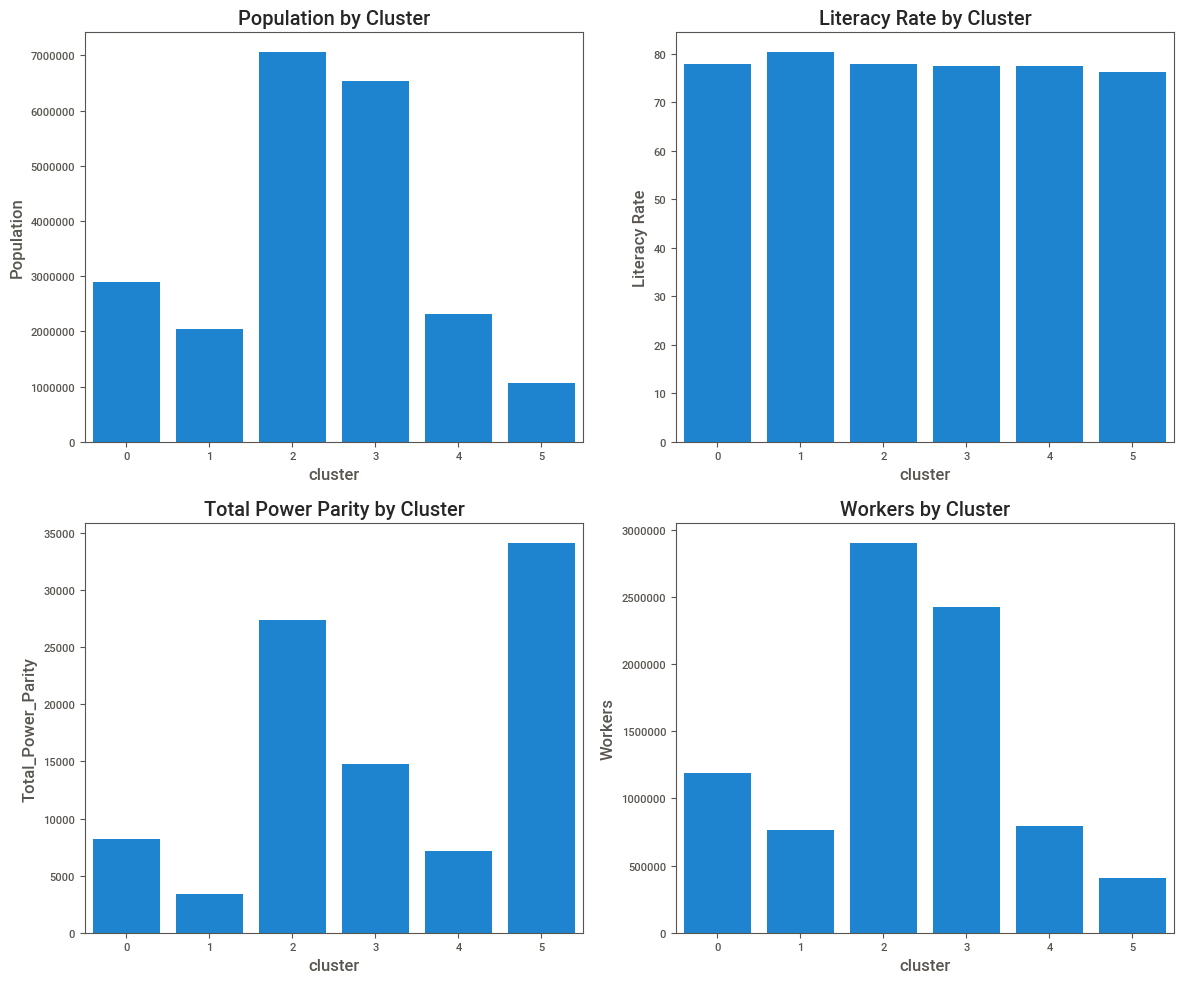

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cluster_summary' is your DataFrame containing the summary statistics for each cluster

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Population
sns.barplot(x=cluster_summary.index, y='Population', data=cluster_summary, ax=axes[0, 0])
axes[0, 0].set_title('Population by Cluster')

# Literacy Rate
sns.barplot(x=cluster_summary.index, y='Literacy Rate', data=cluster_summary, ax=axes[0, 1])
axes[0, 1].set_title('Literacy Rate by Cluster')

# Total Power Parity
sns.barplot(x=cluster_summary.index, y='Total_Power_Parity', data=cluster_summary, ax=axes[1, 0])
axes[1, 0].set_title('Total Power Parity by Cluster')

# Workers
sns.barplot(x=cluster_summary.index, y='Workers', data=cluster_summary, ax=axes[1, 1])
axes[1, 1].set_title('Workers by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-6-d5fb03d7b5d8>:21: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



         District code   Population        Male       Female     Literate  \
cluster                                                                     
0                462.5  6904479.900  3634393.60  3270086.300  5356950.800   
1                465.7  2194855.275  1094561.45  1100293.825  1757936.475   
2                 55.0  1055450.000   580663.00   474787.000   805438.000   

         Male_Literate  Female_Literate    Workers  Main_Workers  \
cluster                                                            
0          2945614.500        2411336.3  2761007.5   2448665.500   
1           909302.975         848633.5   829646.0    683979.475   
2           465346.000         340092.0   404136.0    385929.000   

         Marginal_Workers  ...  Power_Parity_Rs_45000_150000  \
cluster                    ...                                 
0              312342.000  ...                       8434.40   
1              145666.525  ...                       2261.45   
2               1

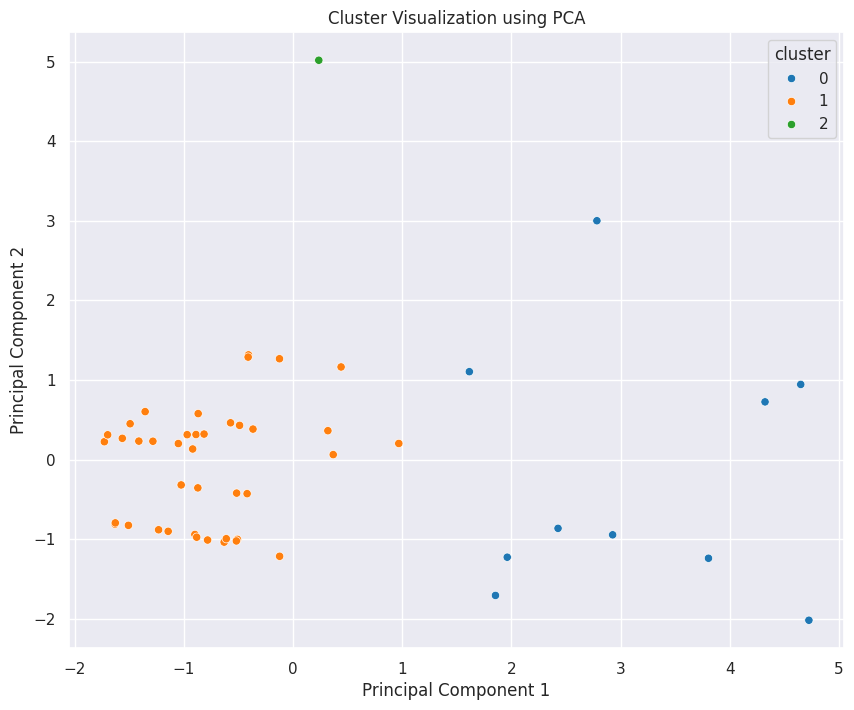

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
# Select relevant features for clustering
X = filtered_records[['Age_Group_0_29', 'Age_Group_30_49', 'Total_Power_Parity']]

# Encode categorical variable 'State name'
X = pd.get_dummies(filtered_records['State name']).join(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
filtered_records['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze and interpret the clusters
cluster_summary = filtered_records.groupby('cluster').mean()

# Visualize the clusters or cluster centers if needed
print(cluster_summary)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_scaled' is your scaled feature matrix
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Add cluster labels to the DataFrame
filtered_records['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=filtered_records['cluster'], palette='tab10', legend='full')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



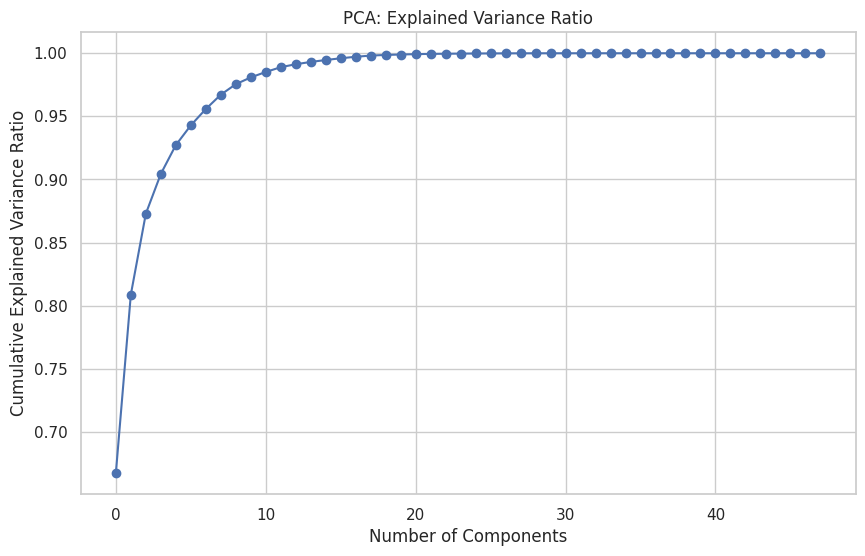

Optimal number of components: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

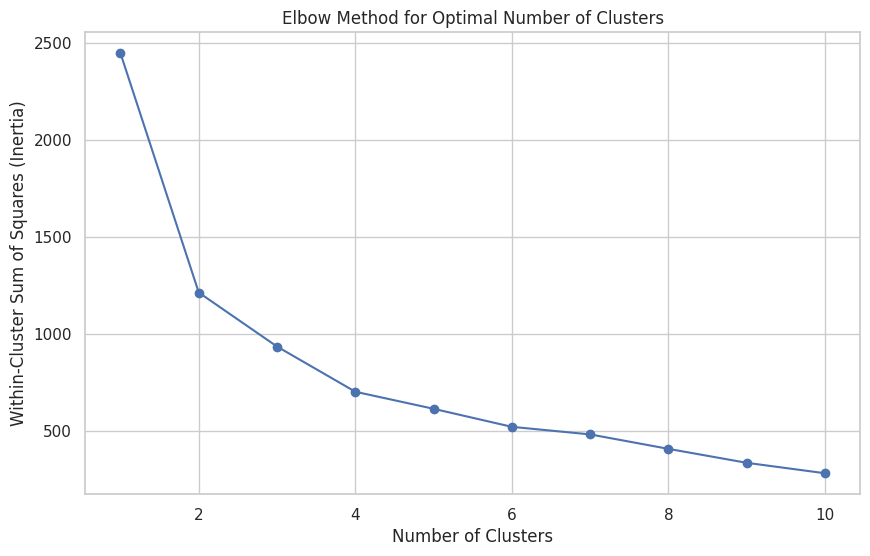

Optimal number of clusters: 3


In [ ]:
# Drop non-numeric columns before standardizing the features
numeric_df = filtered_records.drop(columns=['State name', 'District name'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Perform PCA to find the optimal number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

# Find the optimal number of components based on explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f'Optimal number of components: {optimal_components}')

# Perform clustering using K-means and find the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Based on the elbow method, determine the optimal number of clusters
optimal_clusters = 3  # Choose based on the elbow in the inertia plot

print(f'Optimal number of clusters: {optimal_clusters}')


Based on the provided clusters, here's a brief breakdown for each cluster:

Cluster 0:
This cluster represents districts with relatively large populations, with an average population of approximately 6.9 million.
It has a balanced distribution between male and female populations, both of which are substantial.
The literacy rate is relatively high, with over 77% of the population being literate.
There is a significant workforce, with over 2.7 million workers, predominantly main workers.
The power parity varies across different income brackets, indicating diverse economic activities within the districts.
The average literacy rate in this cluster is around 77.87%.
Cluster 1:
Districts in this cluster have a lower population compared to Cluster 0, with an average population of around 2.2 million.
The male and female populations are relatively balanced.
The literacy rate is higher compared to Cluster 0, with over 79.77% of the population being literate on average.
The workforce is substantial, with over 829,000 workers, mostly main workers.
Power parity figures indicate varying economic conditions across income brackets.
The average literacy rate in this cluster is approximately 79.78%.
Cluster 2:
This cluster represents districts with the smallest population among the clusters, averaging around 1.1 million.
There is a relatively balanced distribution between male and female populations.
The literacy rate is comparatively lower, with around 76.31% of the population being literate.
The workforce is present but relatively smaller compared to the other clusters.
Power parity figures suggest a diverse economic landscape.
The average literacy rate in this cluster is about 76.31%.
These clusters help identify different segments of districts based on population size, literacy rates, workforce characteristics, and economic indicators. Further analysis and domain-specific knowledge can provide deeper insights into the factors driving these cluster formations.

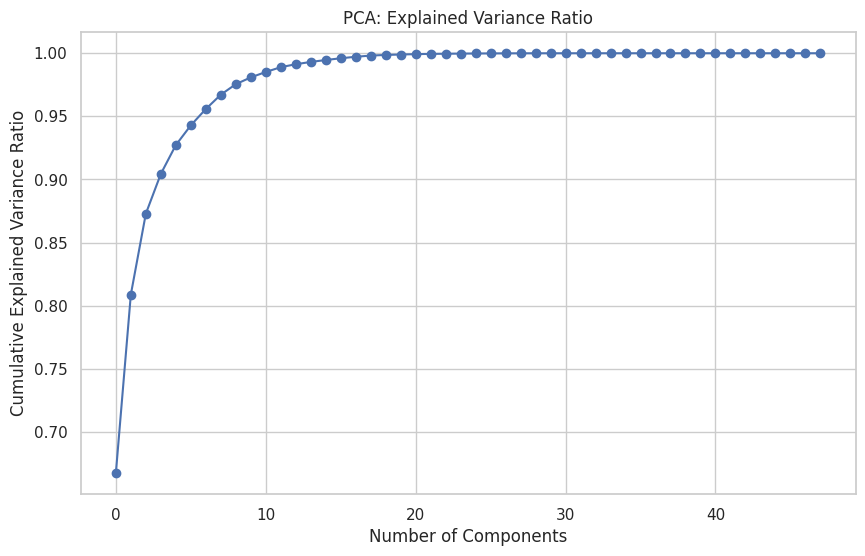

[0.66713439 0.80879135 0.87281842 0.9043862  0.92719017 0.94286113
 0.95578466 0.96714909 0.97546499 0.9808603  0.98514063 0.98895138
 0.99129093 0.99310992 0.99463207 0.99602035 0.99721272 0.99813887
 0.99867066 0.99899281 0.99929621 0.99949421 0.99961675 0.99973088
 0.99980223 0.99986995 0.99992165 0.99995761 0.9999753  0.99998405
 0.99999012 0.99999554 0.99999817 0.99999987 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))